<a href="https://colab.research.google.com/github/SimplyDifficult/ML-for-Wireless/blob/main/7.%20UCB_20_dim_user_case_BOGP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
P_max = 30 #in dBm

In [2]:
var = 20
number_of_cells = 4

In [ ]:
!sudo add-apt-repository ppa:octave/stable
!sudo apt update
!sudo apt install octave

In [ ]:
!wget https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
!wget https://www.dropbox.com/s/d1ytzzfpxsrpbcv/main_bitchanged.m -O /content/main.m
!wget https://www.dropbox.com/s/v3y2xe56qodthnm/function_SE.m
!wget https://www.dropbox.com/s/5p0j4qdqist7ibm/main_individual_transmit_case_for_Test_phase_bitchanged.m -O /content/main_individual_transmit_case_for_Test_phase.m

In [ ]:
!wget https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
!wget https://www.dropbox.com/s/52gyqiq137mo2bb/SE.mat

In [6]:
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot
from scipy.optimize import minimize
import numpy as np
from scipy.io import loadmat, savemat
import numpy as np
from google.colab import files
import cv2
from scipy.optimize import dual_annealing

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#### Objective function
import random
def objective(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W main.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [9]:
#surrogate or approximation for the objective function
def surrogate(model, X):
	#catch any warning generated when making a prediction
	with catch_warnings():
		#ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [10]:
def UCBobjective(Xsamples, X, model, beta):
  Xsamples = Xsamples[np.newaxis,:]
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  sigma = beta
  probs = mu + sigma * std
  return -probs[0]

In [11]:
#optimize the acquisition function
def opt_acquisition(X, y, model, iteration):
  #Do it 5 times
  r_min, r_max = -31.0, P_max  
  bounds = []
  for ti in range(var):
    bounds = bounds + [[r_min, r_max]]
  min_result = 9999999999999.0
  min_answer = 0
  if iteration<180:
   beta = 5*np.exp(((-6-np.log(5))*iteration)/180)
  else:
   beta = 5*np.exp(((-6-np.log(5))*180)/180)
  
  for i in range(2):
    result = dual_annealing(UCBobjective, bounds, args=(X,model,beta))
    if(result.fun<min_result):
      min_result = result.fun
      min_answer = result['x']    
  return min_answer

In [12]:
import random
def objective_FPA(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W /content/main_individual_transmit_case_for_Test_phase.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = np.load("/content/drive/MyDrive/trainingx_BOGP_3.npy")
y = np.load("/content/drive/MyDrive/trainingy_BOGP_3.npy")
y_FPA = np.load("/content/drive/MyDrive/grad_trainingyFPA_BOGP_3.npy")

x_next is [-31. -31. -31. -31. -31. -31. -31. -31. -31. -31. -31. -31. -31. -31.
 -31. -31. -31. -31. -31. -31.]
f()=26.324014, actual=0.094
0


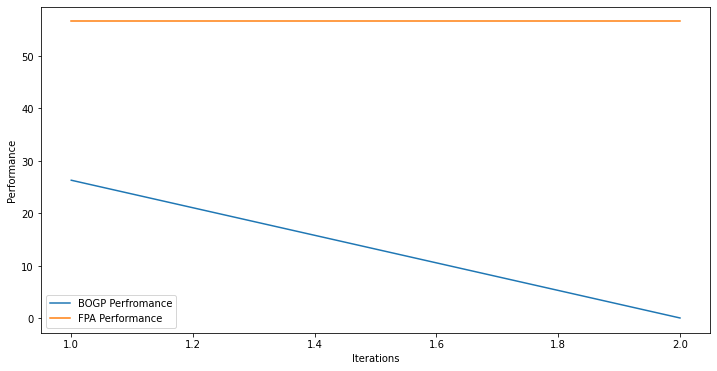

x_next is [ 4.00327981  6.33698778  4.12450777 24.05239438 16.34319175  2.52506068
  4.17788527  7.69296492  0.4624803  14.61934575  1.93257572  8.5117187
 10.66498938  2.57890951 12.79099032 18.38212179 12.52700669 11.18543005
  8.28868412  2.20240244]
f()=8.049928, actual=38.692
1


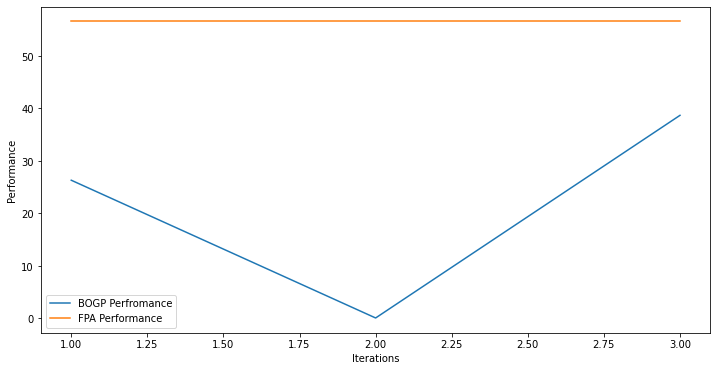

x_next is [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30.  30. -31. -31.  30.
  30.  30. -31. -31.  30.  30.]
f()=28.922430, actual=47.923
2


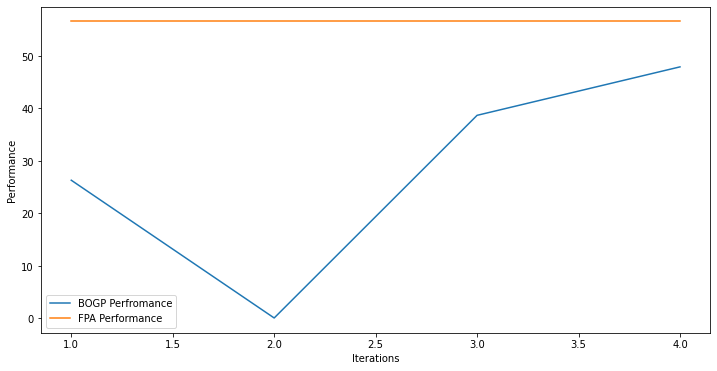

x_next is [-31.  30.  30.  30.  30. -31.  30.  30.  30.  30.  30.  30.  30.  30.
  30. -31. -31.  30.  30. -31.]
f()=38.129873, actual=41.000
3


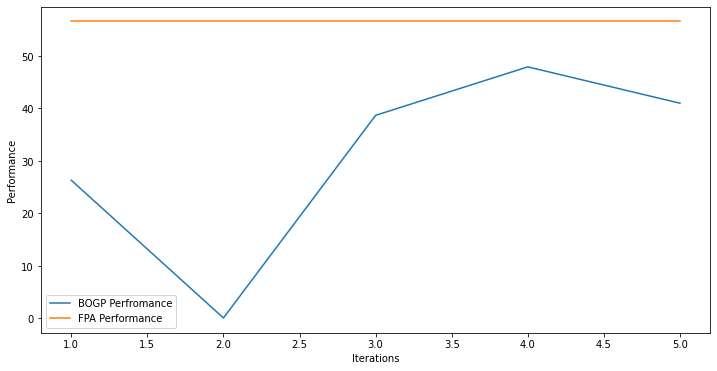

x_next is [-31. -31.  30.  30.  30.  30.  30.  30.  30. -31.  30.  30.  30. -31.
  30.  30.  30. -31.  30.  30.]
f()=39.242424, actual=45.512
4


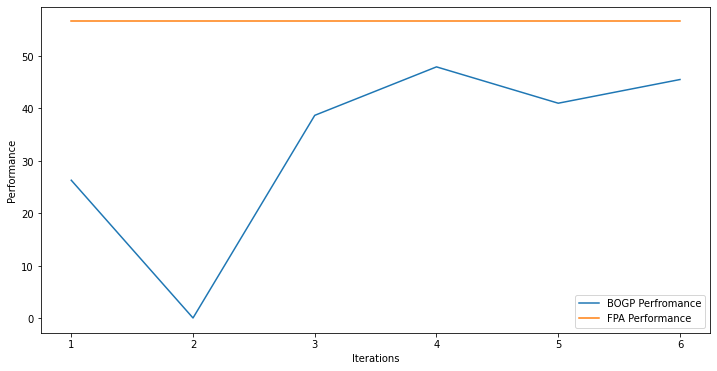

x_next is [ 30.  30.  30.  30.  30.  30.  30.  30.  30.  30. -31.  30. -31. -31.
  30. -31.  30.  30.  30.  30.]
f()=42.942965, actual=49.546
5


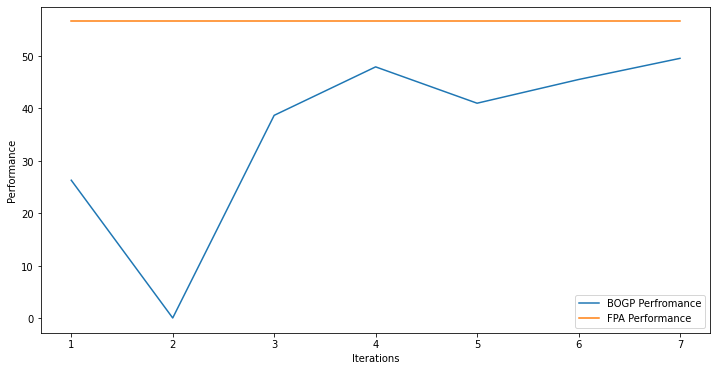

x_next is [ 30.  30.  30.  30.  30.  30.  30.  30. -31. -31. -31.  30.  30.  30.
  30.  30. -31.  30.  30.  30.]
f()=44.987748, actual=54.420
6


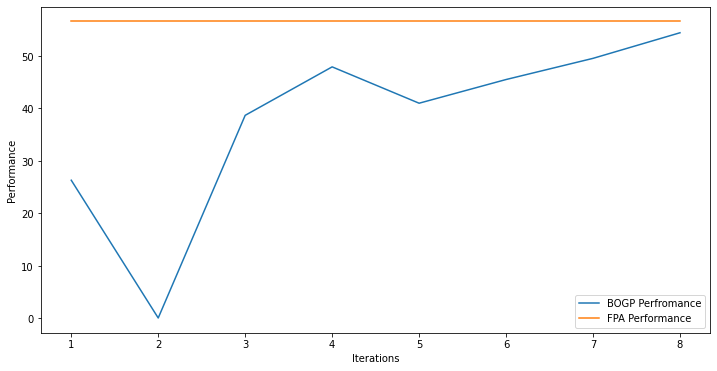

x_next is [ 30.  30.  30.  30.  30.  30. -31. -31.  30.  30.  30.  30.  30. -31.
  30.  30. -31.  30.  30.  30.]
f()=46.547840, actual=50.245
7


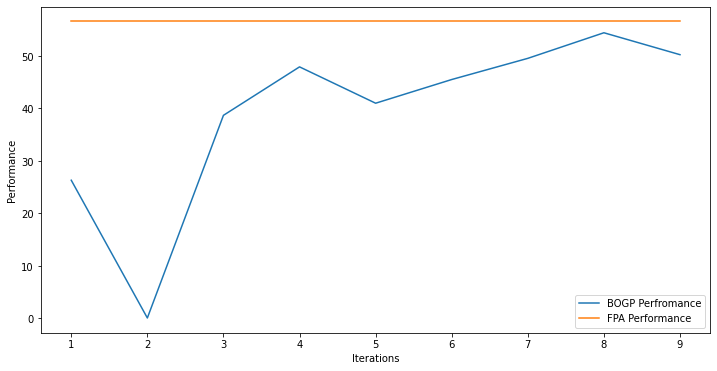

x_next is [29.99985704 29.99972623 29.9998704  29.9997854  29.99997082 29.99988924
 29.99987143 29.99950829 29.99998788 29.99994719 29.99979799 29.99994062
 29.99992801 29.99998366 29.9999036  29.99997667 29.99979461 29.99996084
 29.99994807 29.99998814]
f()=38.503201, actual=56.571
8


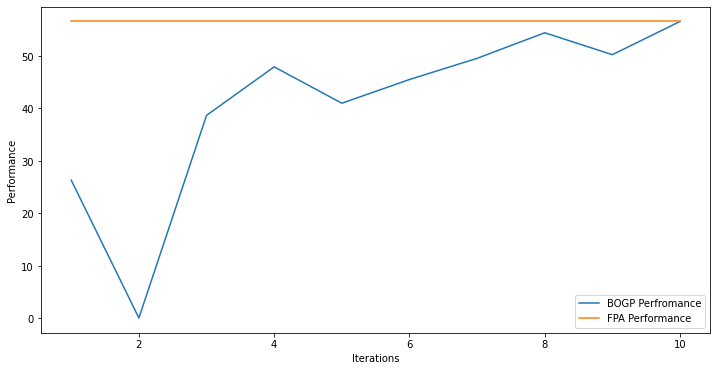

x_next is [ 30. -31.  30.  30.  30.  30.  30.  30.  30.  30. -31.  30.  30.  30.
  30.  30. -31.  30. -31.  30.]
f()=49.025035, actual=50.314
9


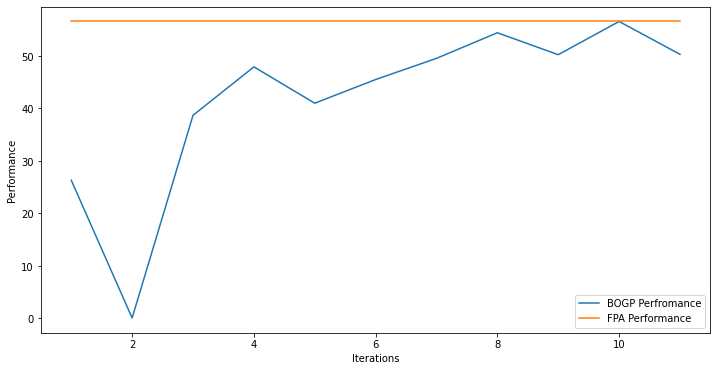

x_next is [ 20.24591664  -8.46339109   9.04240591 -26.29280771  16.88899879
  28.51344233  26.03816335  21.24419141 -27.38329387   3.80983367
 -21.79667769   0.50058982 -21.99925469  16.1648405   -2.81817262
  16.31803452 -27.48367588   9.14974143  14.57991938  11.66750095]
f()=41.308074, actual=40.725
10


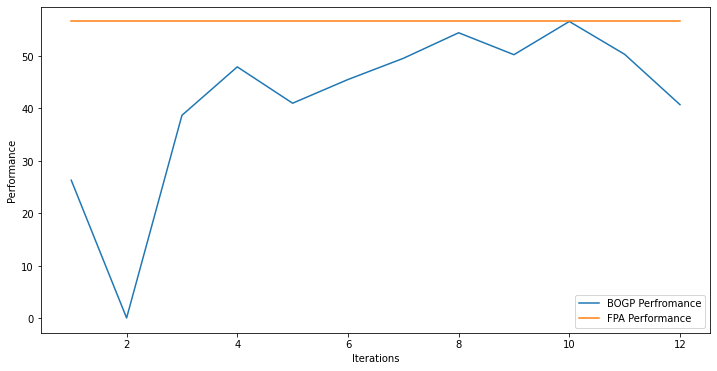

x_next is [ 30. -31.  30.  30.  30.  30.  30.  30. -31.  30.  30.  30. -31. -31.
  30.  30. -31.  30.  30.  30.]
f()=55.771054, actual=49.071
11


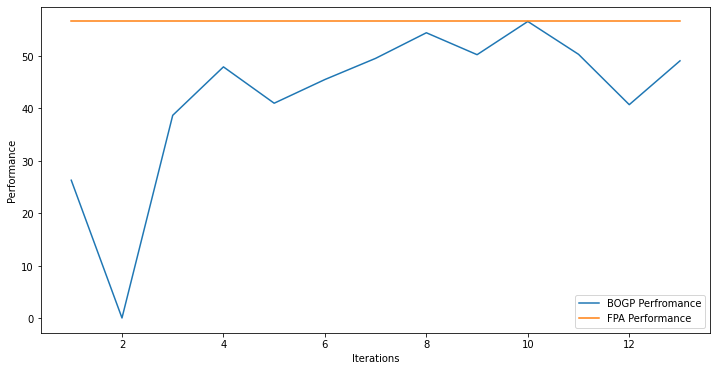

x_next is [ 30.  30. -31. -31.  30.  30.  30.  30.  30.  30. -31.  30.  30. -31.
  30.  30. -31.  30.  30.  30.]
f()=50.393930, actual=51.727
12


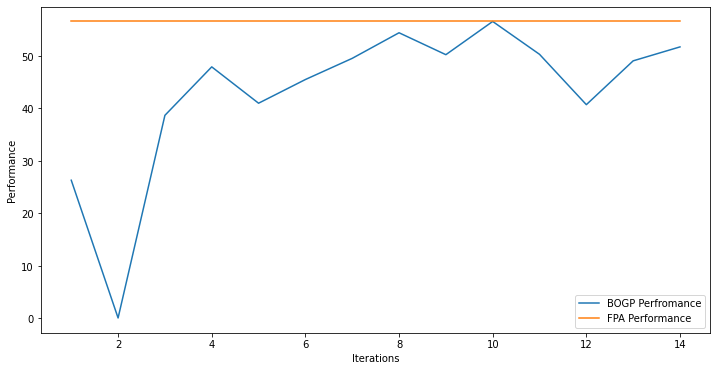

x_next is [-31.  30.  30.  30.  30.  30.  30.  30.  30.  30. -31.  30.  30.  30.
 -31.  30. -31.  30.  30.  30.]
f()=52.337427, actual=50.180
13


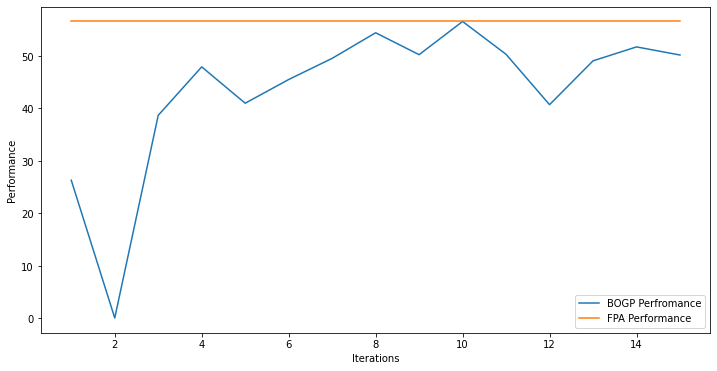

x_next is [ 30.  30.  30. -31.  30.  30.  30.  30. -31.  30. -31.  30.  30.  30.
  30.  30.  30. -31.  30.  30.]
f()=51.586212, actual=52.102
14


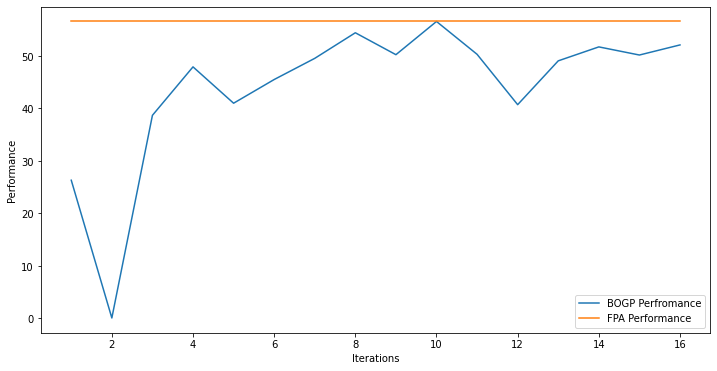

x_next is [30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30. 30.
 30. 30.]
f()=51.840218, actual=56.571
15


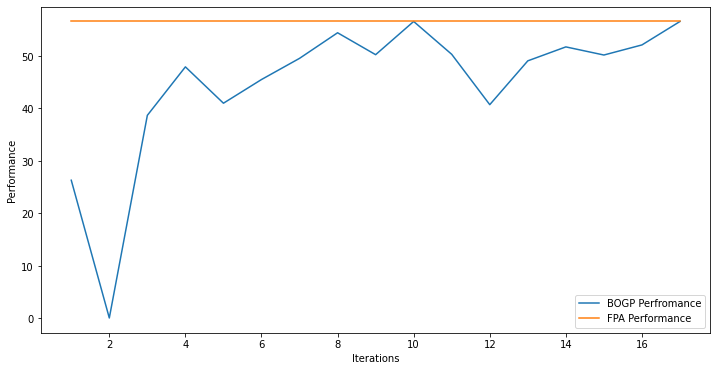

x_next is [ 29.74512653  29.04430133  29.97722618  29.82335809  29.85164824
  29.98331976  29.9173339  -30.99459712  29.82357088  29.79284511
 -30.96796497  29.9894556   29.51166145  29.85319896  29.99410987
  29.86006518  29.70008402  29.92380728  29.94464473 -30.89653984]
f()=53.269135, actual=52.276
16


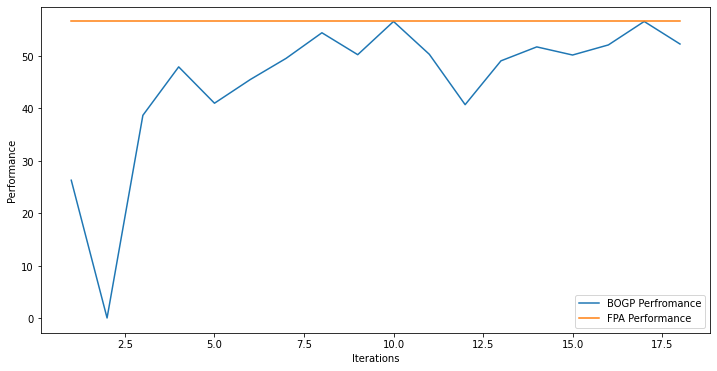

x_next is [ 29.98634417 -30.93445935  29.77116263  28.75326695  29.95216668
  29.83903671  29.96179707  29.86652523  29.31857431  29.86307071
 -30.95466533 -30.74445951  29.83718962  29.81983338  29.99989277
  29.97458779  29.95795321  29.92562806  29.97235386  29.90211935]
f()=52.831991, actual=55.608
17


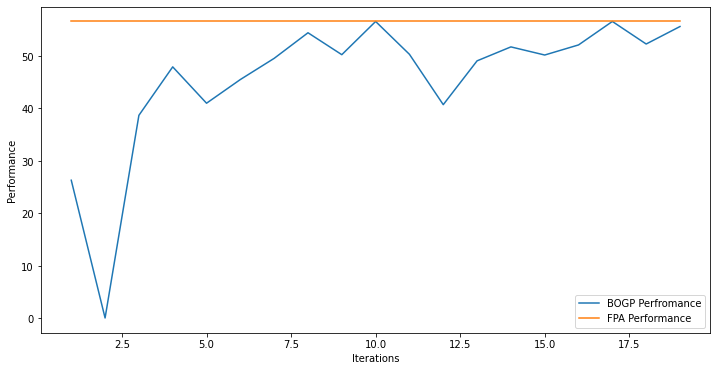

x_next is [ 29.93054634  27.03601672  29.97510838  28.85362211  29.95169364
  29.9503383  -30.91142217  29.96741297  29.82040335  29.95697615
 -30.81797302  29.31729026 -22.1109156   29.22641446  29.79954845
  29.96034383  29.65112713  29.95131891  29.84511156  29.89633409]
f()=53.058546, actual=52.524
18


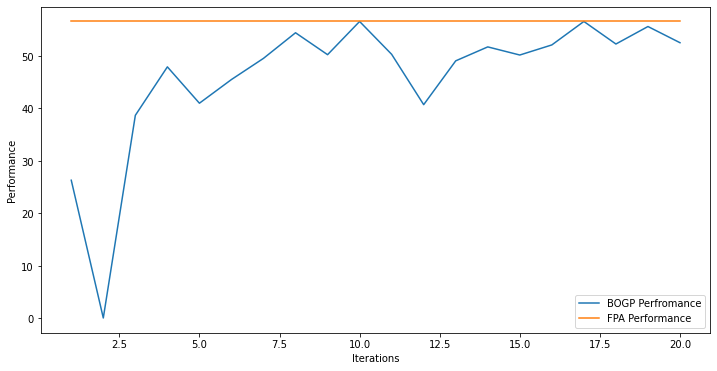

x_next is [ 29.95522809 -29.05405308 -30.92009365  29.96762425  29.9576064
  29.92357064  29.89317662  29.9030965  -30.65201826  29.95689125
 -30.64633146  29.86980298  29.60663278  29.7317928   29.808895
  29.99687798  29.36760163  29.95876384  29.97058963  29.81975702]
f()=53.382829, actual=55.105
19


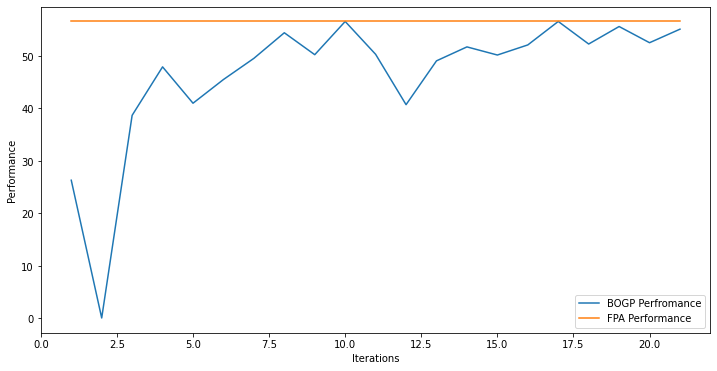

x_next is [ 29.82403099  29.30672631  29.89622548  29.65236865  29.98059354
  29.74111469  29.97308452  29.68541497 -29.80941324  29.89816972
 -30.90710344  29.69292729  29.65104587 -30.59836014  29.87496459
  29.97922345  29.62658194  29.70775041  29.94289284  29.54349261]
f()=56.004358, actual=55.228
20


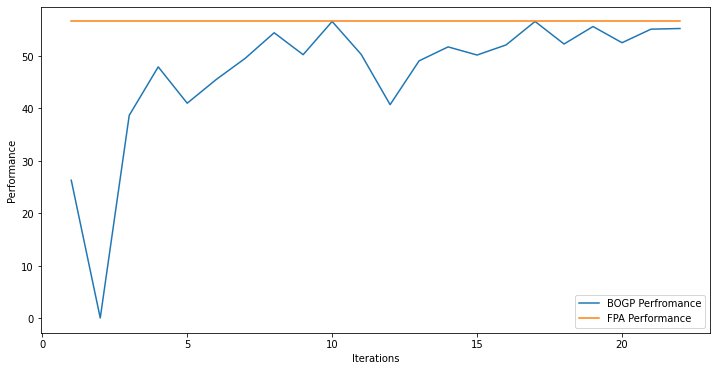

x_next is [ 29.94721187 -16.21487358  29.99217805  29.92486486  29.79794773
  29.37955216  29.65173988  29.53009167  29.57041317  29.82010331
 -30.92950642  29.66737564  29.59251398  29.98552236  29.93870798
  29.75110416 -30.47269946  29.79386301  29.72854178  29.51543348]
f()=57.412372, actual=53.481
21


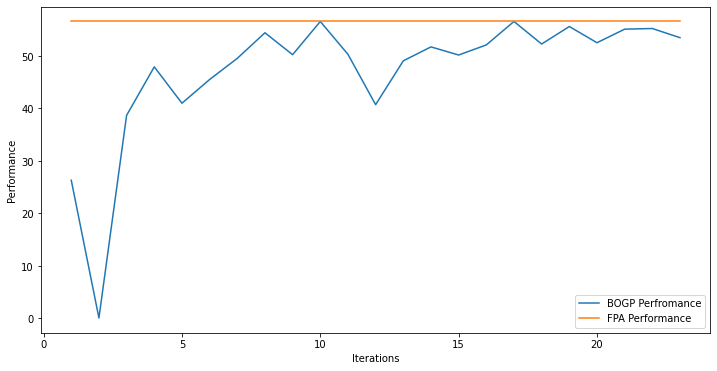

x_next is [-30.92770765  29.70087259  29.65734521  29.35348763  29.93382834
  29.84855781  29.98153132  29.90019791 -30.79251122  29.64939191
 -30.98197894 -30.90497204  29.98369376  29.98910808  29.9402971
  29.99270377  29.61760219  29.90022017  29.8697836   29.93997818]
f()=55.159036, actual=52.205
22


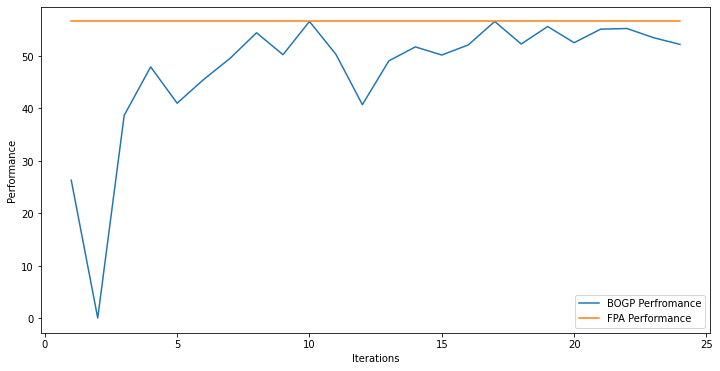

x_next is [ 29.78724032  29.83604131  29.91288347  29.71733826  29.9516617
  29.98520934  29.98214795 -30.72863763 -30.51773518  29.92122013
 -30.54410542  29.7012764   29.71113162  29.97631443  29.99376181
  29.97793071  29.96367822  29.98712693  29.92414715  29.99480499]
f()=55.329241, actual=54.994
23


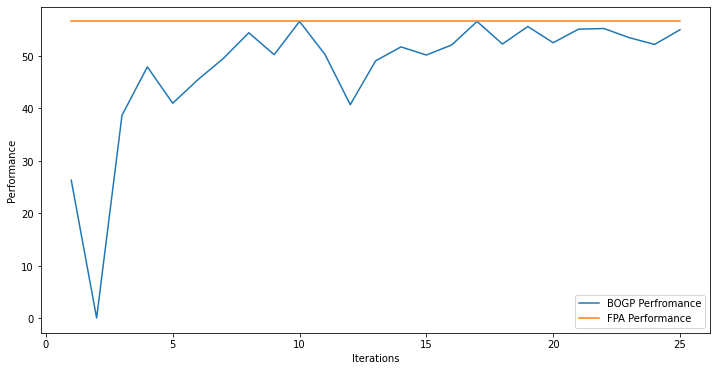

x_next is [ 29.77755182  29.55684036 -29.69895041  29.90276229  29.95107612
  29.77808757  29.97908602  29.94654925  28.45095566  29.00989845
 -30.74614793  29.28719477  29.08210691  29.4914233   29.86216462
  29.92806252  29.89562655  29.57175661  29.89632555  29.40905092]
f()=56.236736, actual=56.408
24


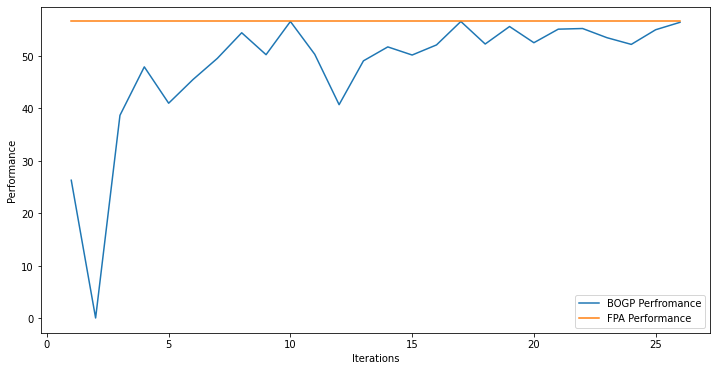

x_next is [ 29.0507433   29.62862809  29.97144216 -30.85752828  29.88528625
  29.96007777  29.99539436  29.68327124  29.46301784  29.68630568
 -30.72873474  28.86628947  29.7834597   29.8759514   29.13677397
  29.79627512  29.86035752  29.87038482  29.60029787  29.64954741]
f()=55.698005, actual=55.130
25


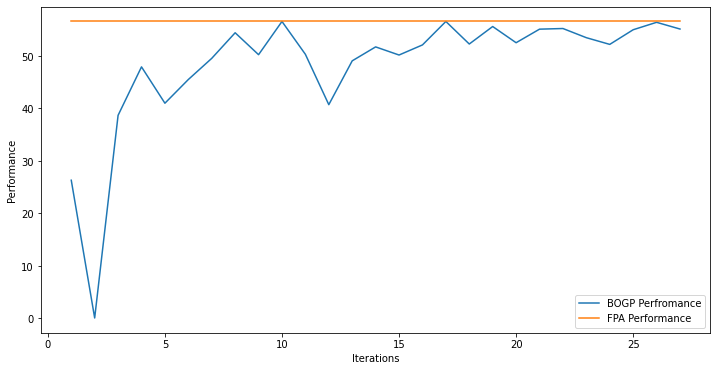

x_next is [ 28.61890188  29.66981163  24.18040631  29.1803985   29.66700682
  29.48238789  29.99104262  29.88687717 -27.26670359  29.24677868
 -30.08338811  28.13657193  29.37354417  29.88975331  29.05560609
  29.7274646   29.07237494  29.14066091  29.80830927  29.88365663]
f()=56.748006, actual=56.227
26


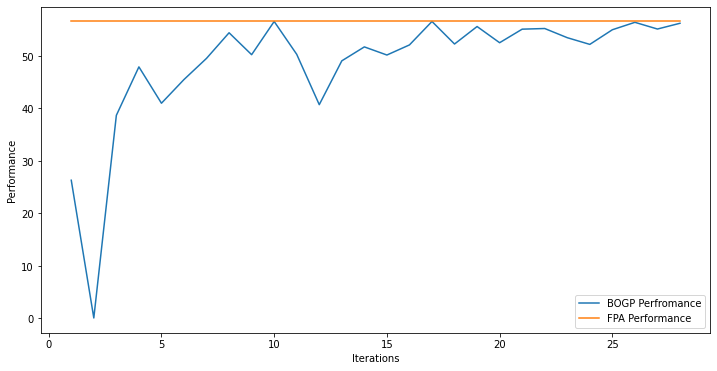

x_next is [ 27.74655971  26.82302342  25.20151988  29.35172095  29.8524551
  29.92367274  28.98243972  27.45783239  29.28962406  27.48582248
 -29.87320131  28.94713031  29.79805426  26.16535855  29.69783388
  29.27750905  28.9550877   29.24082248  29.59615054  29.31954232]
f()=56.697038, actual=56.814
27


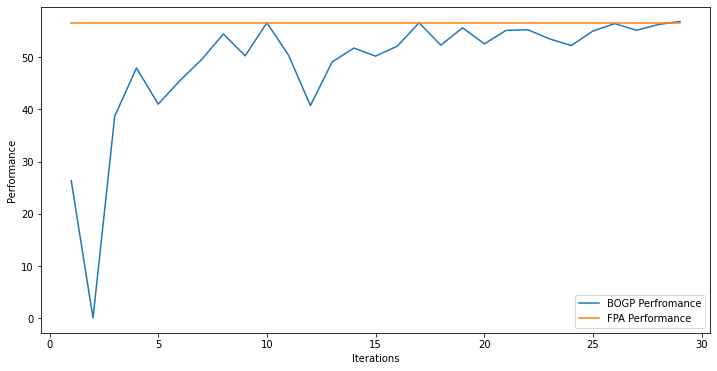

x_next is [ 29.99287679  29.98848947  29.71432525  29.82886896  29.78231995
  29.49569276  29.66380028  29.69858009  29.24006705  29.82316007
 -30.43718148 -27.45290363  29.66457182  29.53623268  29.7243206
  29.68296551  29.8852925   29.82035439  29.89311593  29.99160041]
f()=56.466671, actual=55.638
28


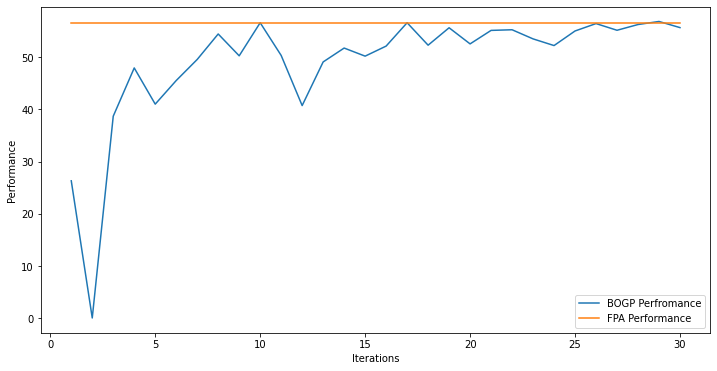

x_next is [ 29.13461265  25.87064624  29.72706511  28.90086884  29.94560275
  29.28811115  29.53223076  28.83297933  29.9645054  -28.53842112
 -29.28526313  29.71377138  29.1142883   29.71232188  28.39702657
  29.8735183   29.67585655  29.97048358  29.61415534  29.75677299]
f()=55.553706, actual=56.780
29


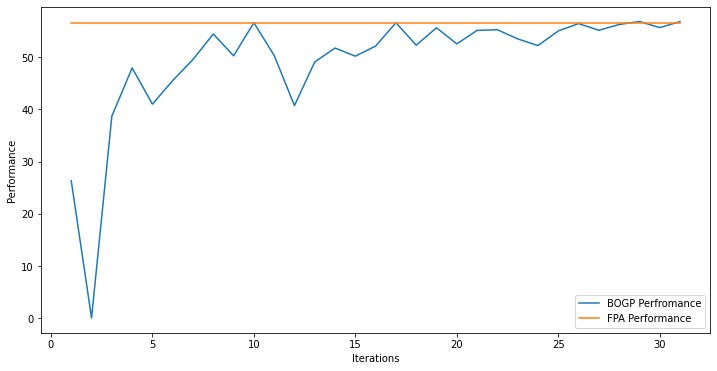

x_next is [ 29.74070916  29.4586838   29.25723644  26.25407597  29.77161609
  29.96259258  29.72407378  27.57529306  23.63864164   2.41171765
 -27.07006877  29.69128229  29.22389717  27.34530812  28.73300876
  28.94051678  29.03941484  29.00592829  28.27565384  29.54290848]
f()=56.633801, actual=58.700
30


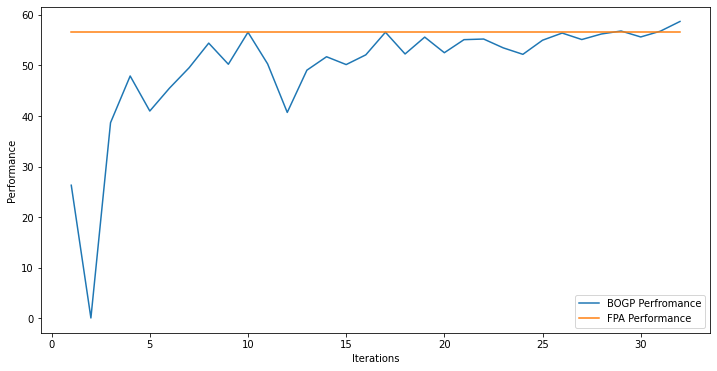

x_next is [29.92105923 29.6247126  29.99789256 27.85826679 29.9599102  29.90206197
 29.49356256 15.23627014 15.01485589 -0.82016507 -4.91546377 28.74891714
 29.73572818 27.84522549 29.5484085  29.87017534 28.65760471 29.55808626
 29.91982704 29.59880548]
f()=58.723922, actual=55.944
31


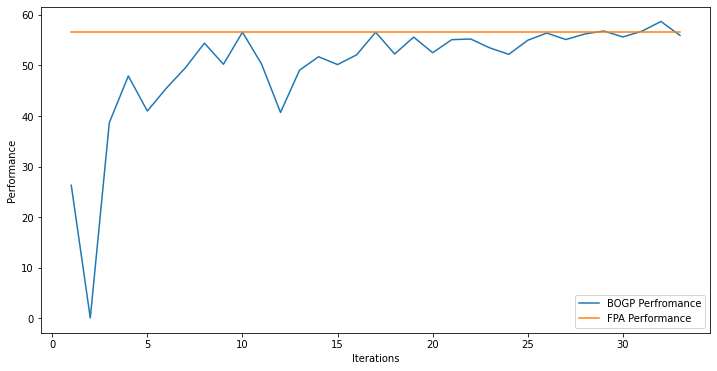

x_next is [ 29.98071119  29.83356827  29.90349592  27.64032104  29.90897902
  29.86473881  29.91771951  29.9129895   26.48537172  -0.1813752
 -30.84358417  29.79067898   3.45107619  28.9211934   29.93431252
  29.89529692  29.92452152  29.84599455  29.5413215   29.95983159]
f()=58.032488, actual=55.527
32


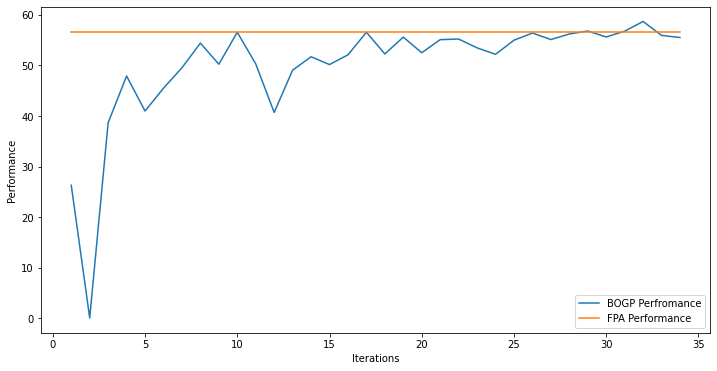

x_next is [ 29.96957092  29.85245385  29.81147865  29.42441202  29.98149602
  29.98824017   6.51091534  29.99907803  19.64935726  -0.4352766
 -30.98331088  29.98724762  29.98175846  29.33686478  29.93658931
  29.88873701  29.78816164  29.92555112  29.85394163  29.9658892 ]
f()=58.390189, actual=56.111
33


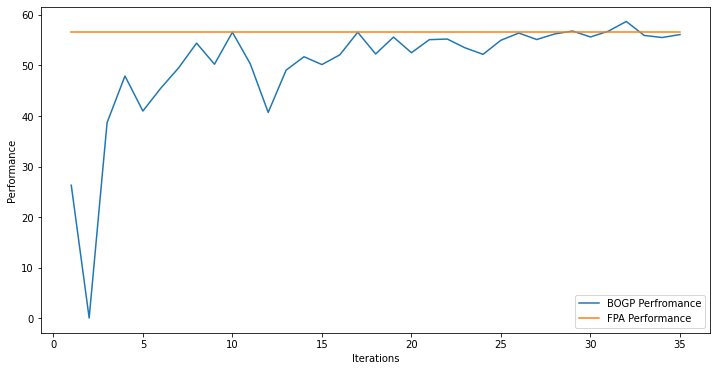

x_next is [ 29.96280702  29.98633757  29.86293579  28.31969438  29.98708011
  29.99196141  29.97750304  29.97835357  28.75709642   0.84298001
 -30.9901907   29.93698541  29.98877562  23.4429882    0.42034409
  29.99401025  29.95280802  29.88675917  29.84105943  29.96862375]
f()=57.678257, actual=56.532
34


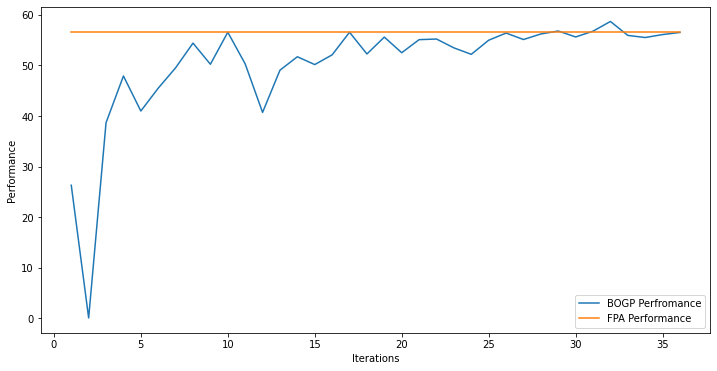

x_next is [ 30.          30.          30.          30.          30.
  30.          29.99999999  29.99999999  30.          30.
 -30.99999995  30.          30.          30.          30.
  30.          30.          30.          30.          30.        ]
f()=57.852015, actual=56.660
35


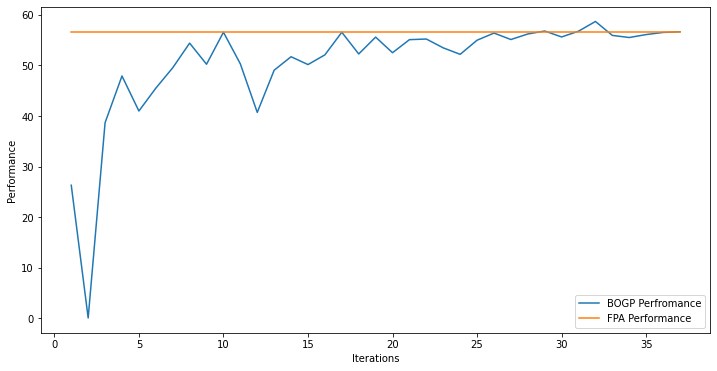

x_next is [ 29.99980668  29.99991453  29.99854697  29.99875438  29.99998708
  29.99938637  29.99887494  29.99906847  29.99933937  29.99857707
 -30.99998819  29.99972636  29.99884147  29.99897907  29.99977183
  29.99990672  29.99941853  29.99939193  29.99950113  29.99966357]
f()=50.450187, actual=56.660
36


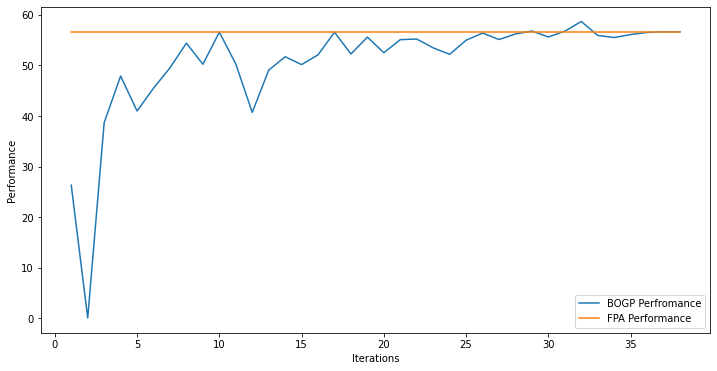

x_next is [ 29.99523914  29.99414292  24.8408121   19.27186615  29.99920509
  29.99950151  29.99669853  29.99512494  27.66807171  -1.67831099
 -30.9957816   29.99966917  29.9977664    7.7713867   29.99530156
  29.99701311  29.06890901  29.99946578  29.99983451  29.99911109]
f()=58.856739, actual=56.931
37


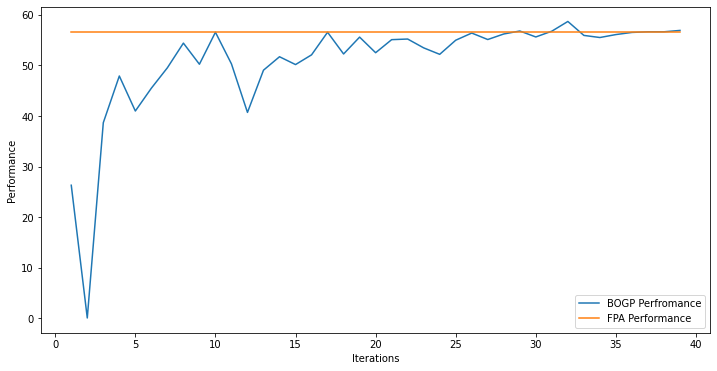

x_next is [ 29.99696514  28.12993876  24.98648995  26.70434374  29.99981081
  29.99941844  29.9981704   29.99970019  21.65931333   0.69725679
 -30.99319254  29.99825682  29.99898838  29.99591839  29.99532898
  13.49697552  27.92813656  29.99572155  29.62599223  29.99110722]
f()=58.517352, actual=56.131
38


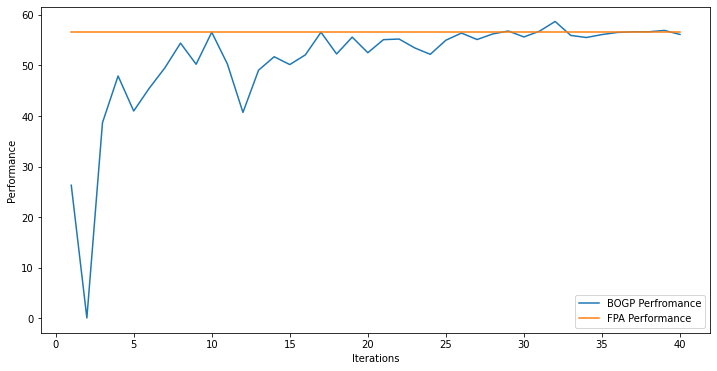

x_next is [ 29.99485847  29.99361741  29.98624724  27.79010242  29.99948427
  29.99979332  29.99858421  29.99962928  23.1708554    0.74296398
 -30.98818418  29.98401798  29.99993952  29.99833061  29.99937598
  29.99979475  29.9494035   29.9688834    9.17780297  29.99838653]
f()=58.557444, actual=57.802
39


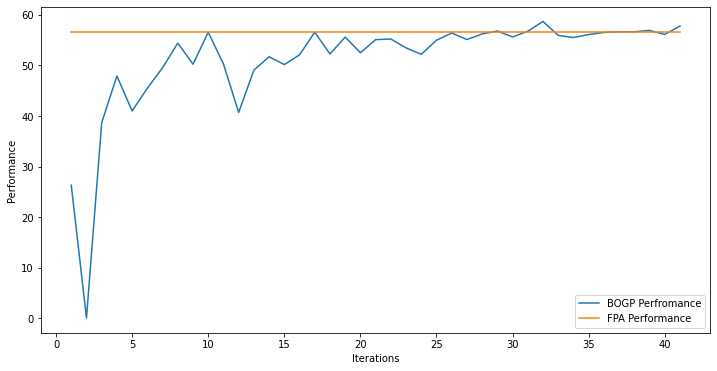

x_next is [ 29.99330263  28.86499332  29.96153573  27.358701    29.99847298
  29.99929269  29.99922464  29.99783805  24.16787715   0.60808198
 -30.99093969  29.97298911  29.99666329  29.99650158  29.99882942
  29.99891677  27.73359184  16.6717897   29.99900384  29.99850962]
f()=58.753401, actual=56.394
40


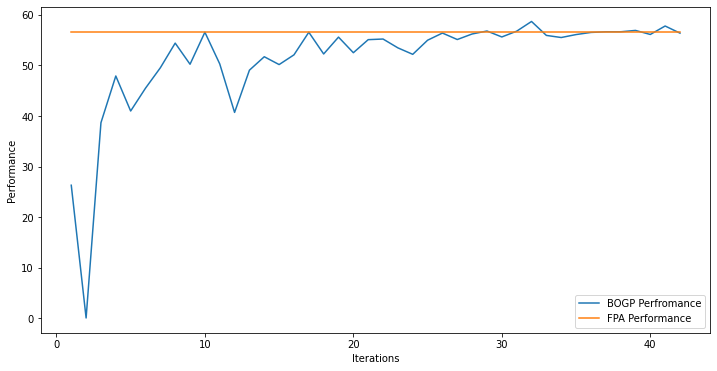

x_next is [ 29.9811432   23.55302078  29.54584962  21.52547758  29.99783041
  29.99970334  29.99993034  29.98084175  22.64814421   2.69339972
 -26.61733438  27.16666911  29.99829043  29.99641784  29.95601145
  29.99874525  29.99738083  29.9996618   29.97331072  29.95026709]
f()=58.989427, actual=58.070
41


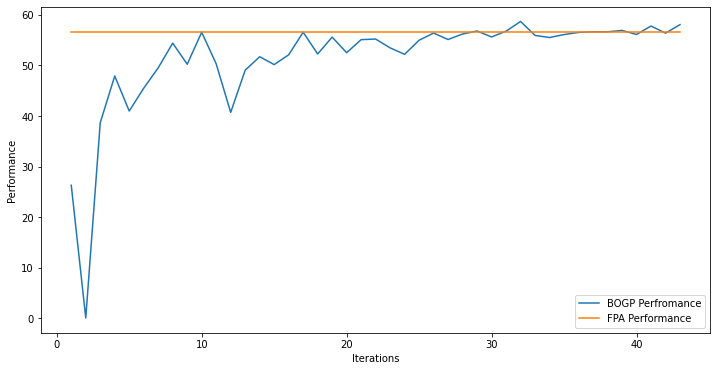

x_next is [ 29.99281848  29.9989659   27.7075729   29.96667326  29.99879919
  29.99860151  29.99900494  24.25330992  28.31819695   1.61573147
 -27.97359171  29.99228185  29.99959247  29.24149832  29.97311644
  29.99905738  22.38360692  29.99933911  27.94822479  29.99978603]
f()=58.973655, actual=56.677
42


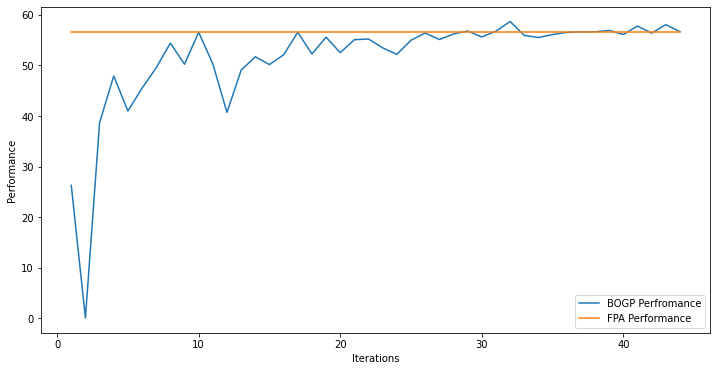

x_next is [ 29.99992014  29.99987908  29.99997543  29.99980652  29.99991067
  29.99971508  29.99984346  29.99997661 -30.99984831 -30.99992865
 -30.99933811  29.99988048  29.99973289  29.99997123  29.99969941
  29.99986049  29.99989298  29.99990302  29.99994262 -30.99997412]
f()=55.987460, actual=53.963
43


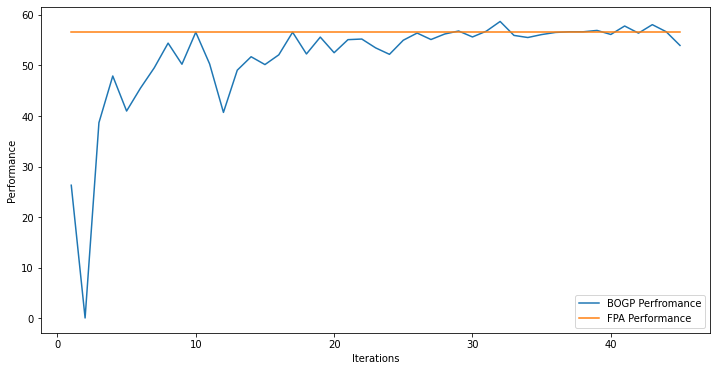

x_next is [ 24.84222786  29.99937668  29.99311736  27.25809931  29.99989109
  29.99990549  29.9964313   29.99668442  15.54646739   4.02019969
 -25.39043019  29.99700578  29.99914861  23.08803314  26.62692092
  29.99943011  29.99955149  29.99902973  26.39775439  21.43086623]
f()=59.295856, actual=56.858
44


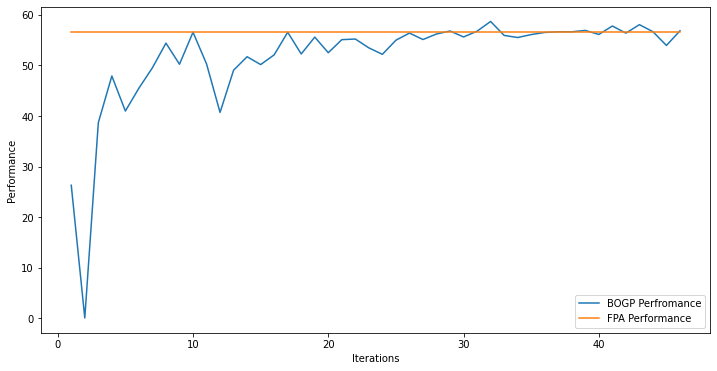

x_next is [ 30.          30.          30.          29.99999999  30.
  29.99999999  30.          29.99999999  27.81501168  -7.02613448
 -30.99999976  30.          30.          30.          29.99999999
  30.          29.99999997  29.99999999  29.99999999  29.99999999]
f()=57.719163, actual=57.161
45


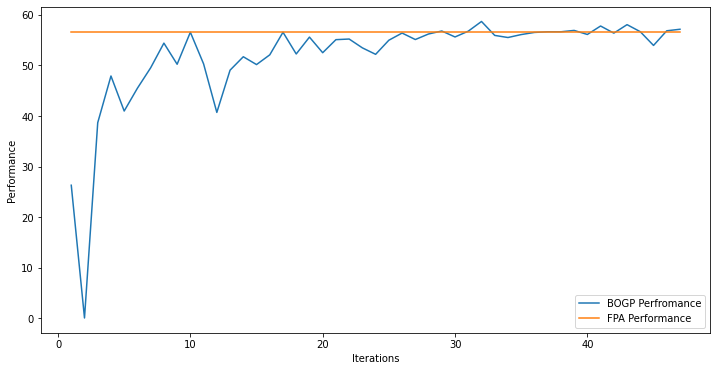

x_next is [ 29.99333768  29.97730592  24.37569585  11.30375658  29.98508867
  10.60214893  29.30095173  21.53962407  20.48160234  29.99514798
 -24.14342737  29.91068512  26.38980275  25.68479749  23.08805487
  29.99599927  29.99019696  29.99523592  20.08940672  29.99908094]
f()=58.794664, actual=51.941
46


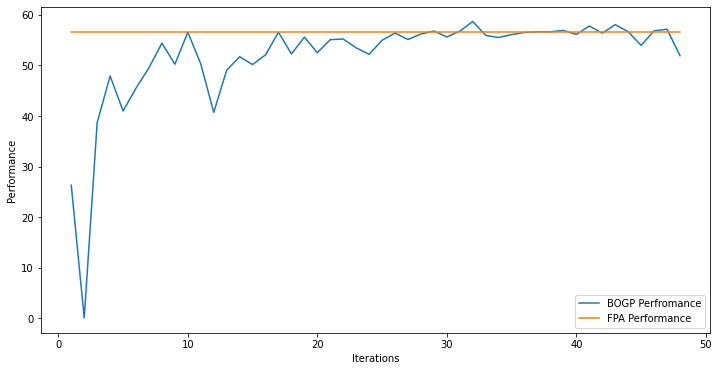

x_next is [ 29.99952973  29.99802534 -28.77001023  29.99848355  29.99951191
  29.99966304  29.99876619  29.99892819  29.99419603  29.99988702
  23.3773075   29.9877456   29.99908362   2.69531646  29.99767916
  29.9998871   29.9993707   29.99977914  29.99935611  29.99969679]
f()=56.302487, actual=55.507
47


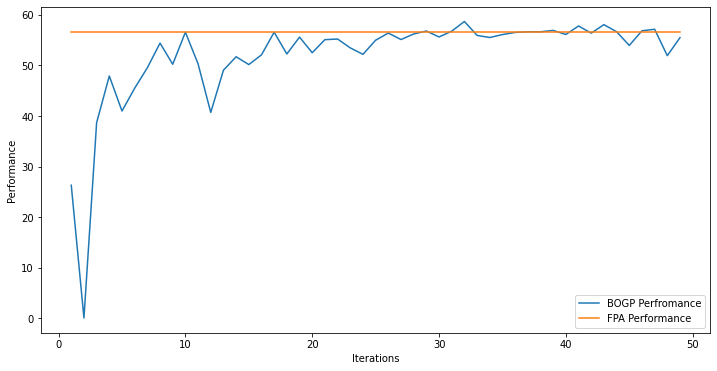

x_next is [ 29.99999999  29.99999997  29.99999999  29.99999998  30.
  30.          29.99999999  29.99999996  30.          -7.1821751
 -30.99997098  29.99999998  29.99999999  29.99999986  29.99999998
  29.99999998  29.99999996  29.99999999  29.99999994  29.99999999]
f()=57.648738, actual=57.305
48


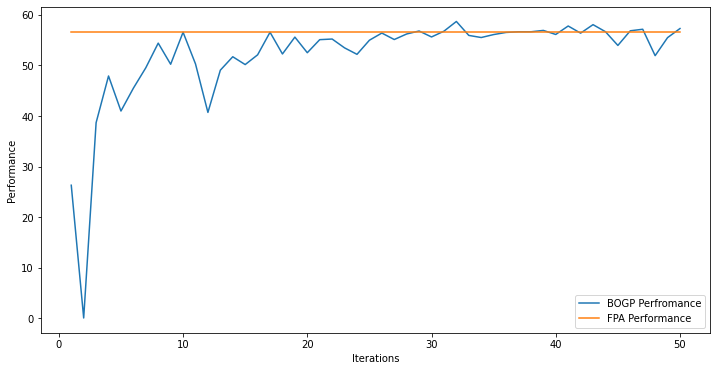

x_next is [ 29.99999999  30.          30.          30.          30.
  29.99999999  29.99999999  30.          21.82159402  -3.897803
 -30.99999999  29.99999998  29.99999999  30.          29.99999999
  30.          29.99999999  30.          30.          29.99999999]
f()=57.610302, actual=57.050
49


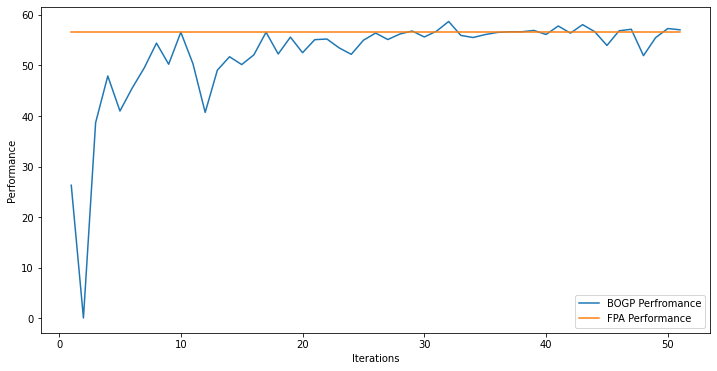

x_next is [ 30.          29.99999999  29.99999999  29.99999992  29.99999998
  30.          29.99999998  29.99999999  24.49701175  -2.75390679
 -30.99980428  29.99999999  30.          29.99999996  29.99999997
  29.99999999  30.          29.99999999  29.99999999  29.99999999]
f()=57.549020, actual=57.158
50


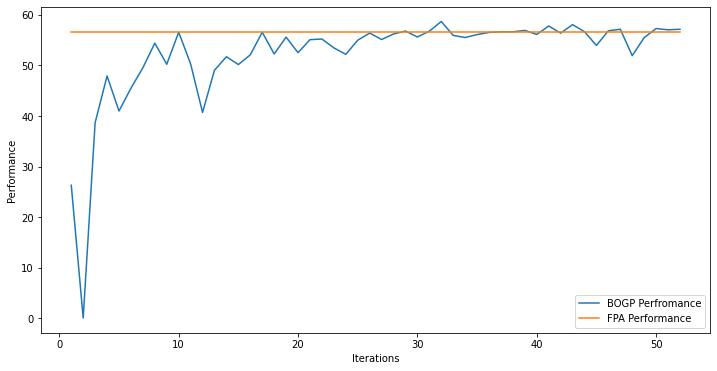

x_next is [ 29.99999989  29.99999998  29.99999998  29.99996988  30.
  29.99999997  29.99999998  29.99999997  23.03957598  -1.69575426
 -30.99994315  29.99999996  29.99999997  29.99999992  29.99999997
  29.99999994  29.99999999  29.99999997  29.99999998  29.99999992]
f()=57.508621, actual=57.176
51


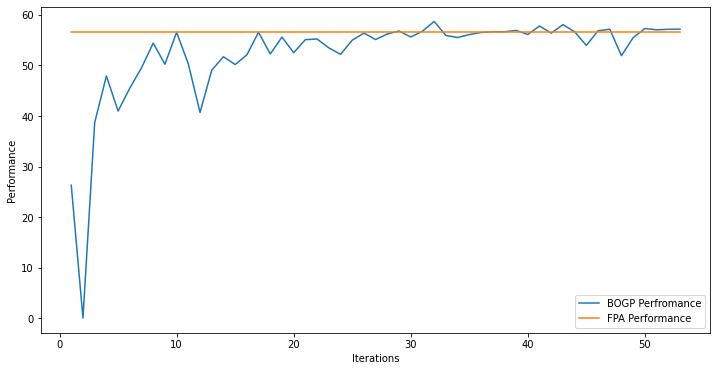

x_next is [ 29.99969129  29.99839595  29.9935536   16.90544362  29.99288362
  29.99983623  28.09594376  29.96961421  29.99971403   2.1385651
 -17.88635453  29.99257821  29.99051666  25.87779418  25.37692814
  29.44152876  29.99987203  29.98930297  20.78075337  29.99977692]
f()=59.753848, actual=59.710
52


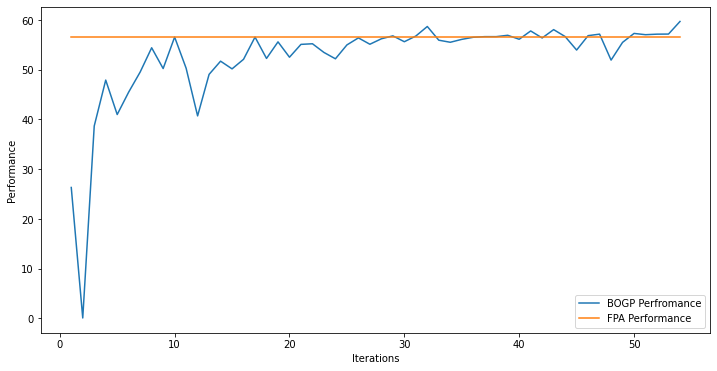

x_next is [ 29.99996127  29.9973721   29.99958827  18.90384496  24.12747246
  29.99991534  28.94980098  27.56637263  29.98969719   3.08741781
 -20.90250126  29.99254665  29.98628684  25.47878381  26.09374549
  29.4268946   29.99808486  29.99929996  22.5193524   29.99789663]
f()=59.565206, actual=59.577
53


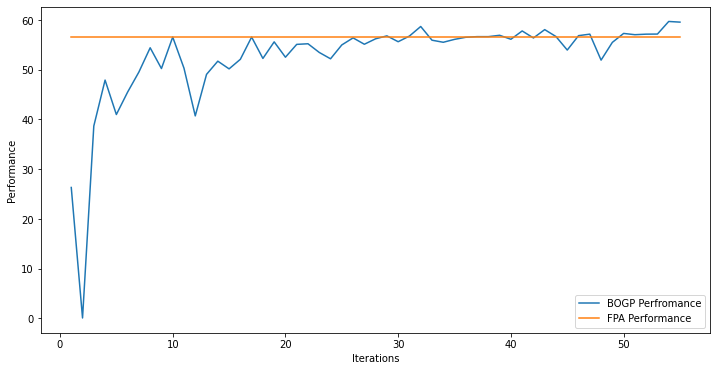

x_next is [ 29.99743019  29.9999887   29.99794315  18.58917204  29.98801332
  29.99998647  28.75709468  25.1488587   29.99613605   3.31134558
 -22.22051093  29.97721842  29.93460872  25.53092569  25.79230833
  28.96378388  29.9985444   29.97038028  22.64615557  29.9999859 ]
f()=59.743880, actual=60.287
54


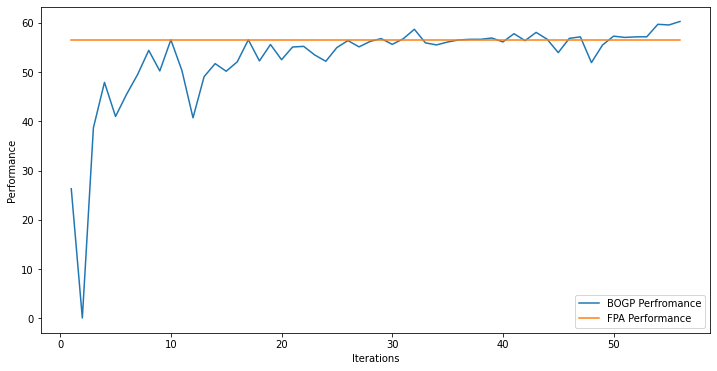

x_next is [ 29.9994747   29.99886908  29.99917711  13.9415885   29.99853924
  29.99883053  28.90284763  18.02592081  29.99799349   1.73819635
 -24.82448935  29.99573207  29.99282505  26.36828838  24.8810709
  29.41108244  29.99962991  29.99831573  21.09630648  29.99986517]
f()=60.352405, actual=58.734
55


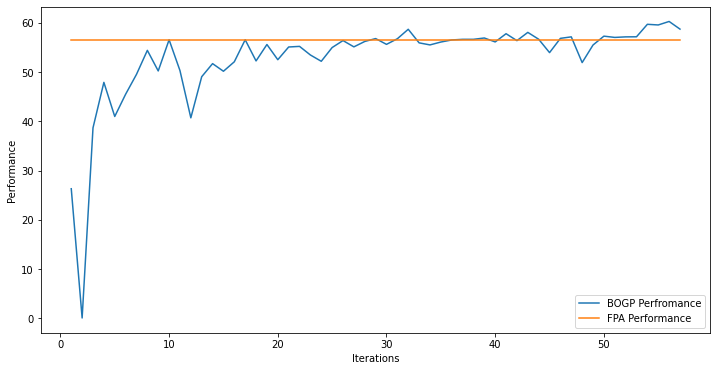

x_next is [-19.10713999 -26.4161287  -21.85812752 -28.33048733 -30.86504864
 -20.41625149 -16.27924176 -27.64328544  18.22357247  -7.66995997
   1.83887266 -30.61115142  15.17327297  20.50173812 -11.37876051
 -16.62881734  -1.43316857 -29.30198125  -7.54971213  14.92807625]
f()=52.779104, actual=18.773
56


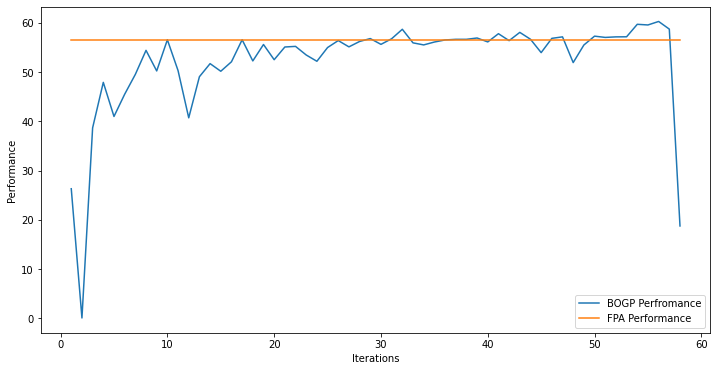

x_next is [ 22.20666786  26.35061963 -21.47464044 -25.333003   -11.98963122
 -21.85476564 -28.73152372   8.95540081 -30.19143438 -25.407358
  15.73543182 -25.86870463  26.3886078   22.16535804 -20.53393118
 -17.26684263  14.01021509  28.46721597  11.96641304 -26.25474528]
f()=52.186380, actual=32.361
57


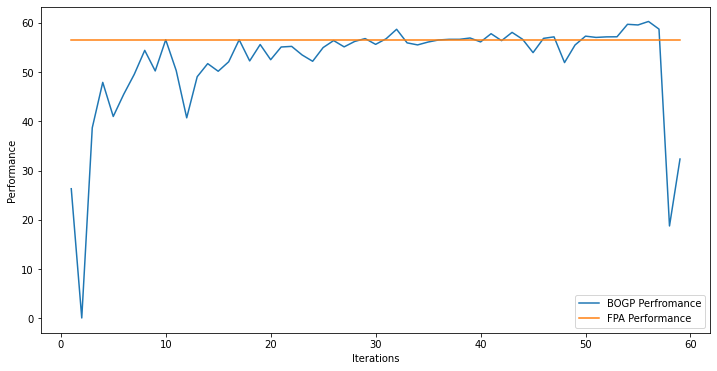

x_next is [ 29.99933575  29.99462349  29.99995015  22.21652247  29.99971075
  29.9998898   28.40563402  26.01011762  29.99883214   6.76959998
 -20.97274936  28.84103871  29.98806855  22.65318455  25.93161196
  27.00196492  29.99832444  29.99022117  22.94289669  29.99976527]
f()=60.478581, actual=60.898
58


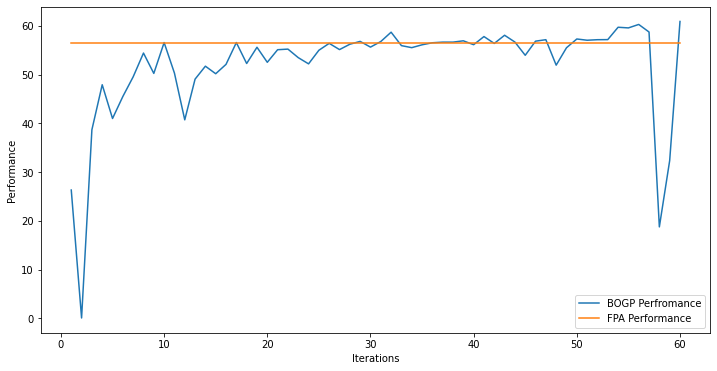

x_next is [ 29.98772405  29.99907484  29.99722655  22.53945299  29.97388407
  29.99971889  25.82724816  26.56360899  29.99629834  10.84390377
 -20.07653008  23.71759859  28.42581057  20.83219567  25.9253017
  25.71996225  29.98752061  29.88983497  22.2956348   29.99003977]
f()=60.979282, actual=60.562
59


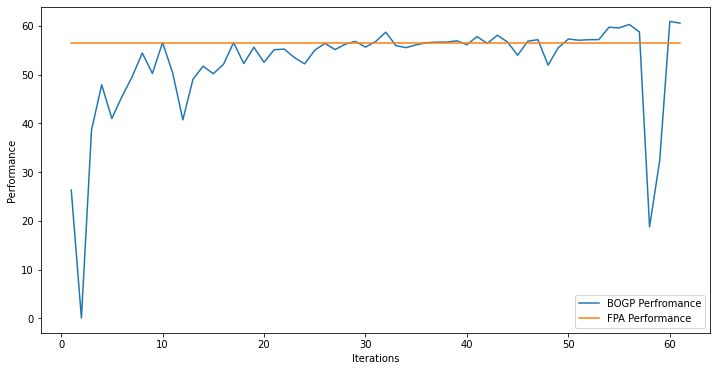

x_next is [  5.19091632 -13.52016882  -9.70558123 -14.06025107  -2.30243483
  24.54449564 -12.36883667  11.35986352   3.69520651 -11.51027063
  -4.48827292   9.75464033 -18.19901209  13.07326036 -15.05931081
  -0.63281925  -2.16844594 -21.33938628 -21.4244915  -21.16737752]
f()=52.140266, actual=22.520
60


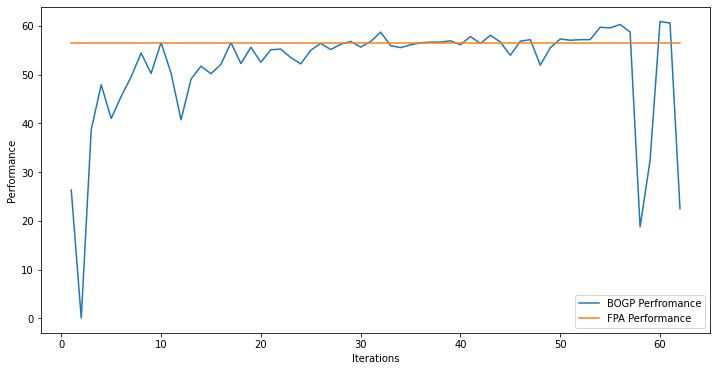

x_next is [ -9.47042236  -2.11266523  -8.49196397  25.32147697  21.77880896
   9.5915755   -6.63532298   5.70810506  -0.49536474  17.42780944
 -24.96483041  17.23611969   2.58985244  -8.84631742  15.50375442
  15.25631759   0.92614051 -29.74507883  -2.36850696  -7.74394789]
f()=51.658328, actual=28.474
61


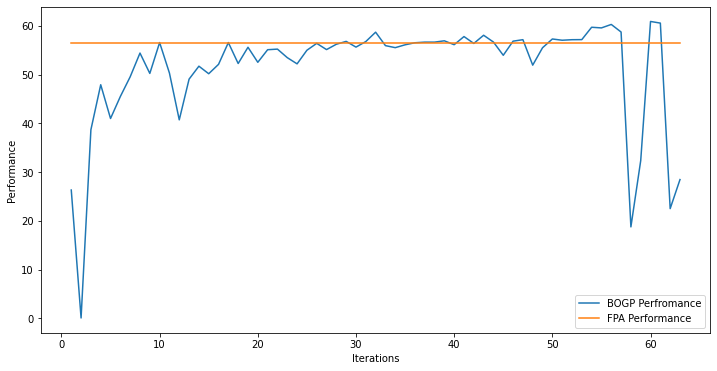

x_next is [ 29.99971424  29.99172286  29.9813993   22.66147059  29.98619811
  29.99825158  27.73899411  26.18506035  29.98919616   8.09615656
 -20.43148267  29.8722278   29.11194074  21.53925888  25.97457813
  26.23538105  29.98742739  29.88687526  22.67307793  29.99152575]
f()=60.921430, actual=60.956
62


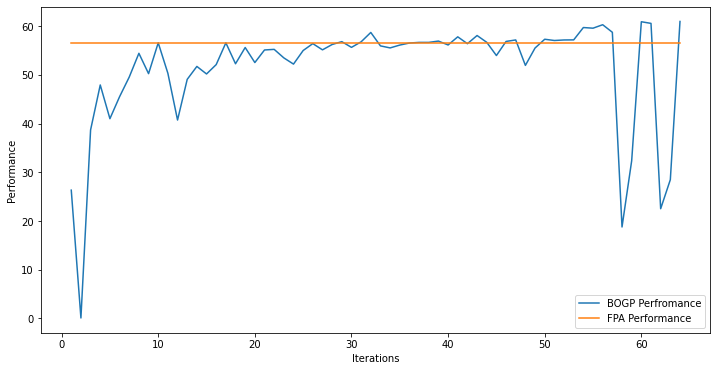

x_next is [ 29.98596365  29.86555185  29.98830949  23.39647329  29.99330962
  29.99499289  28.16411723  25.74487039  29.99486803   8.91625166
 -20.5310033   29.55307131  29.37842759  21.59636371  25.66728126
  26.32562482  29.97090132  29.87987758  22.79535556  29.99464292]
f()=60.935381, actual=60.952
63


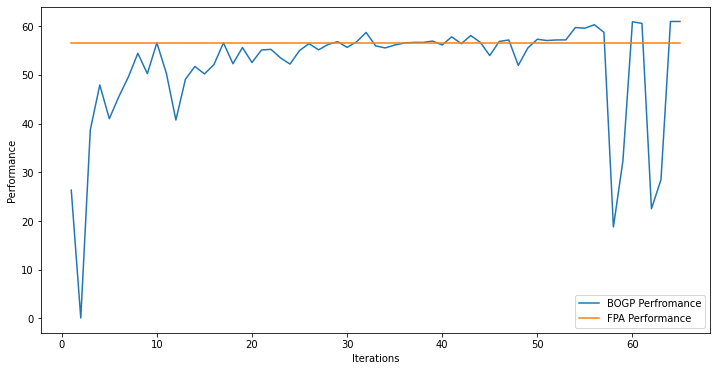

x_next is [ 29.99574613  29.99346906  29.99972027  24.24785469  29.99834537
  29.99931444  28.67743381  25.70062316  29.99741524   8.18228341
 -18.976826    29.97688234  29.99896561  19.87737822  25.92721389
  24.80990287  29.99985057  29.9904434   21.37239219  29.99676152]
f()=60.985934, actual=60.823
64


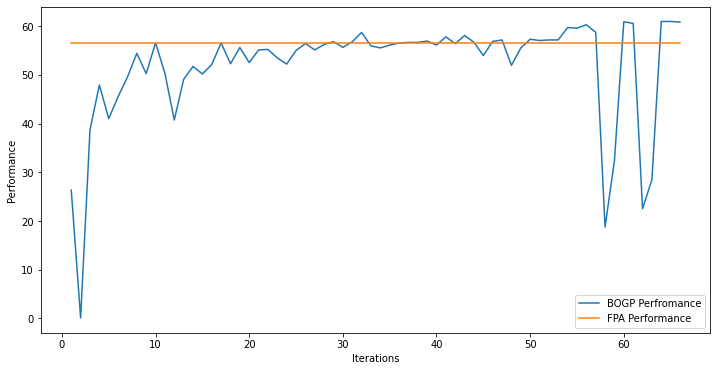

x_next is [ 29.99710237  29.97194377  29.99986611  22.74109014  29.99796311
  29.9970883   27.03194914  26.24963738  29.99558051   9.13797391
 -20.22763222  29.98461508  29.79923661  21.61008964  25.50167974
  26.87535141  29.99747486  29.999453    23.48012652  29.99600495]
f()=60.967797, actual=60.881
65


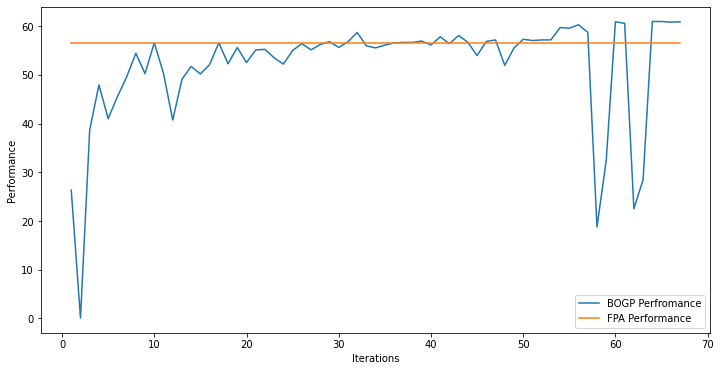

x_next is [ 29.99838607  29.99009039  29.99624265  22.99701176  29.99303105
  29.99497512  29.45311805  25.94528523  29.98987602   8.58300923
 -20.65790731  29.69191304  27.33788372  21.86108562  25.82919754
  26.48308245  29.99367061  29.95017393  22.38713091  29.99477122]
f()=60.992426, actual=60.915
66


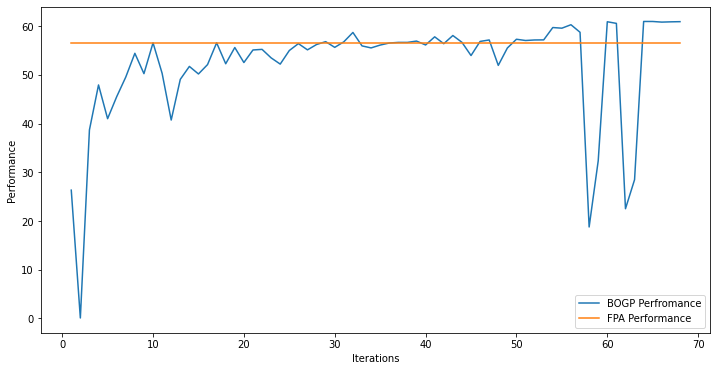

x_next is [ 29.99999998  29.99999981  29.99999997  23.14014213  29.99999993
  30.          27.94383189  25.69973898  29.99999997   8.51062188
 -21.36609686  29.55902764  28.86493143  22.1155623   26.01748902
  25.628657    29.99999999  29.67750335  22.08875263  29.99999997]
f()=60.998830, actual=61.108
67


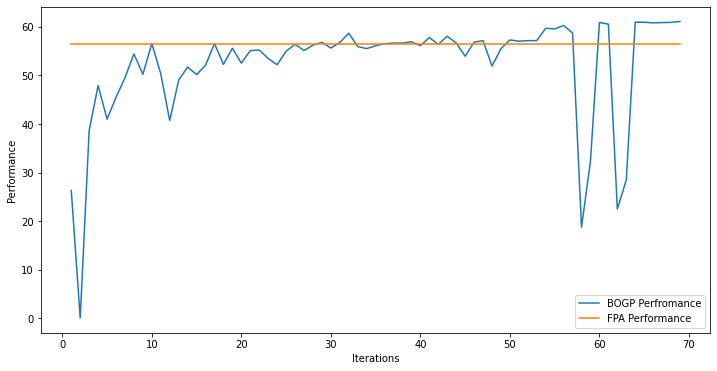

x_next is [ 29.99777002  29.99985054  29.99993953  23.22080817  29.99452717
  29.99847555  26.85423128  25.64509588  29.99722964   9.45402551
 -22.50829539  29.99289196  28.97247327  23.7730279   25.58668602
  23.31003845  29.99895589  29.6607673   20.28725031  29.99410239]
f()=61.236725, actual=61.377
68


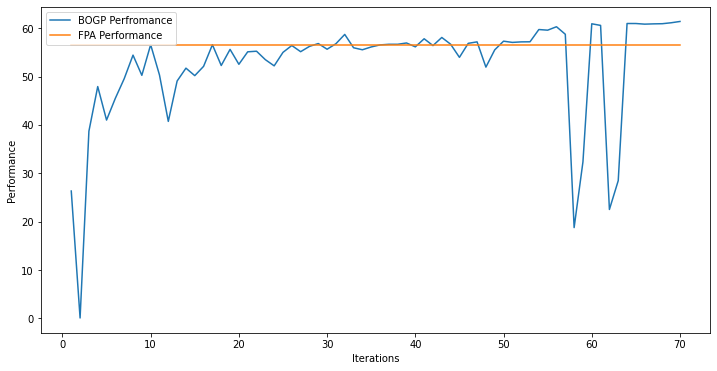

x_next is [ 29.99743825  29.97101127  29.99522871  23.08960676  29.996468
  29.9996437   26.09891358  25.72927548  29.99632854  10.77508054
 -21.93089144  29.99771158  28.90342972  24.73919819  24.23031235
  21.46939286  29.9991462   29.98825977  19.15087008  29.9959634 ]
f()=61.405642, actual=61.224
69


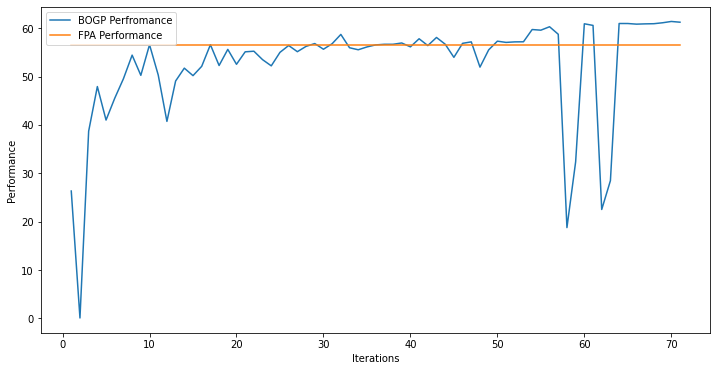

x_next is [ 29.99842392  29.99962732  29.99131221  22.99079197  29.99956311
  29.99983201  26.78722043  26.02655134  29.99873525   9.74969683
 -23.25446859  29.98748705  29.21598826  23.78386883  26.58119065
  23.13507661  29.99884785  29.88063947  19.60701545  29.99467846]
f()=61.388967, actual=61.691
70


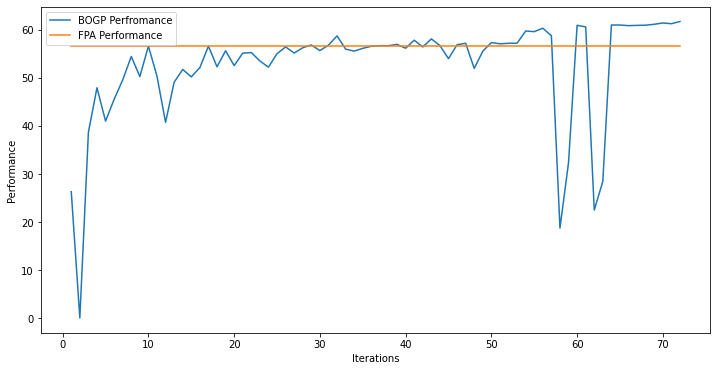

x_next is [ 29.22692697  28.76906345  29.62381173  27.08640005  27.80762273
  29.97646423  29.62721388  29.83617695  29.97472437  26.48848073
 -30.8460121   29.26005462  29.6352357   29.75673655  29.58333755
  29.31853969  29.95325844  29.89169584  27.94605636  28.96515373]
f()=52.517105, actual=59.892
71


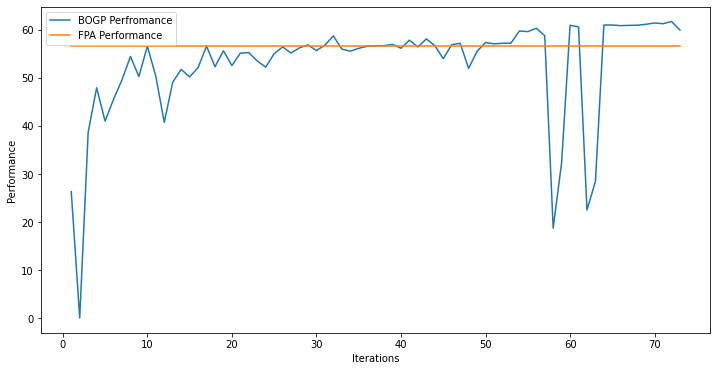

x_next is [ 29.99871332  28.15388638  29.99918042  15.83576884  21.05405317
  29.99928974  28.81112893  29.99828689  29.99933621  26.37139214
 -30.98658044  28.06267601  29.99905852  29.03892907  29.99858184
  22.56648018  29.99945779  29.99903112  15.34430589  23.83593612]
f()=63.670991, actual=60.816
72


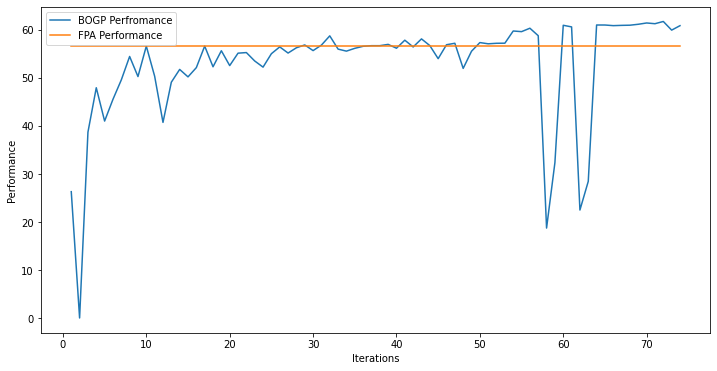

x_next is [ 24.85551421  21.71770557  -6.27347993   3.30219119  -1.56270238
  29.61737225   1.44119455  11.93606558  13.0305461  -21.71342041
   5.73392586   6.35706154  29.31226681  -1.2243474   16.59911151
  15.24387563   2.93117617   6.27389181 -21.79006158  22.8442441 ]
f()=42.141765, actual=36.044
73


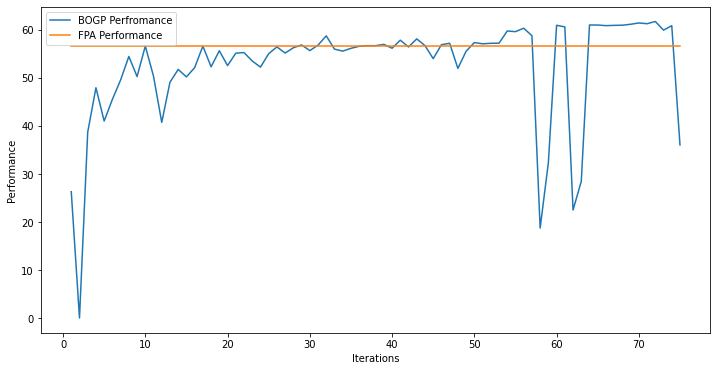

x_next is [ 29.93691061  29.83783233  29.99892584  20.05049743  28.27499302
  29.99925174  28.84315426  29.99857477  29.99902751  17.56598537
 -27.51961044  29.9451047   29.99214303  26.89213827  29.99508507
  24.93766847  29.99836687  29.99426846  19.72321313  29.99257945]
f()=62.652037, actual=64.373
74


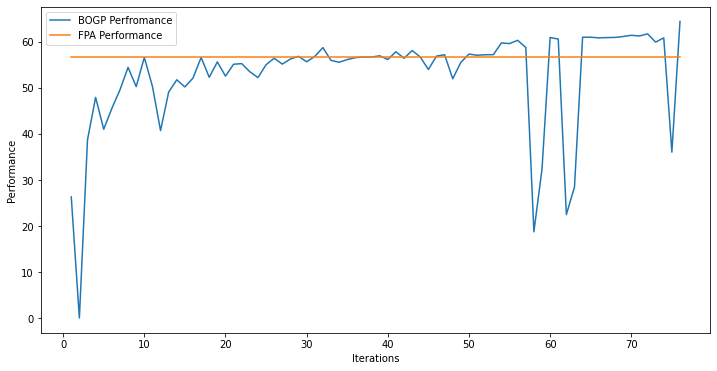

x_next is [ 28.35213892  29.99898182  29.99653187  17.6360549   29.80147165
  29.99993373  29.99394035  29.99860536  29.99290538  18.90199146
 -27.79961956  29.99488898  29.99470867  27.45119323  29.99100192
  24.75139875  29.99488099  29.99968611  19.45768549  29.99783408]
f()=64.541687, actual=64.756
75


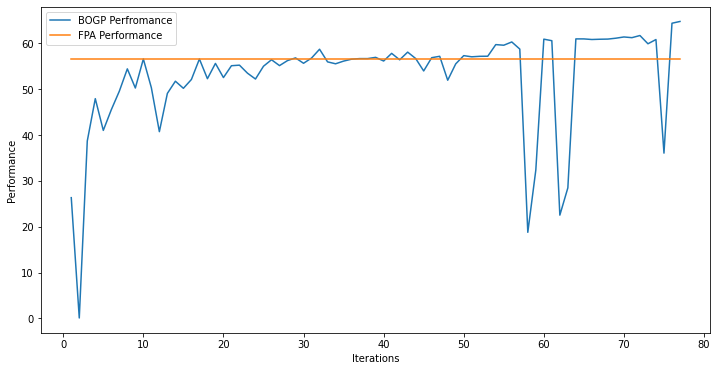

x_next is [ 26.35940962  29.98907967  29.99712308  17.0861008   29.97284511
  29.99758449  29.97939293  29.99403317  29.99627031  19.07789845
 -27.99610889  29.97790634  29.98427592  27.68259026  29.98724744
  24.42994271  29.99886601  29.99957844  19.36132344  29.99638306]
f()=64.764963, actual=64.764
76


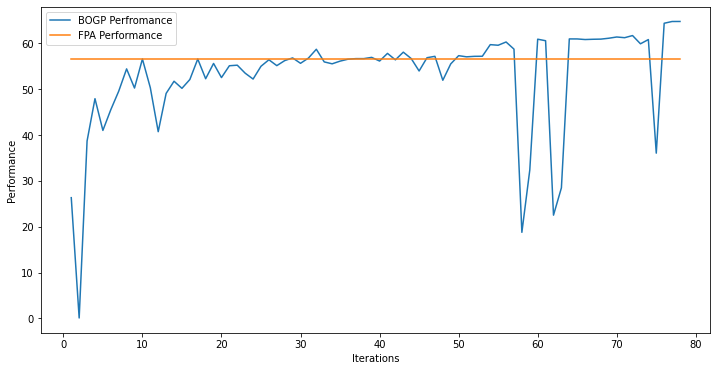

x_next is [ 27.29981646  29.98899681  29.99671226  16.7270216   29.9777004
  29.99996561  29.95967574  29.99994699  29.99112707  19.23486657
 -27.62138244  29.96848917  29.94997651  27.91353148  29.99147538
  24.8537718   29.97605426  29.96788618  19.67241211  29.99074465]
f()=64.766045, actual=64.736
77


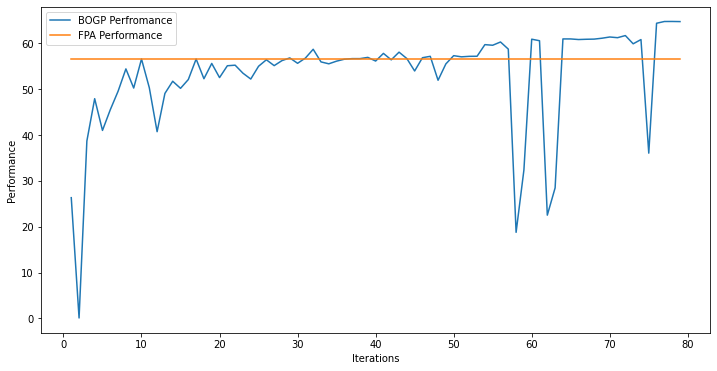

x_next is [ 27.14599053  29.98875443  29.99639055  17.3448629   29.96000878
  29.99905086  29.99521605  29.99981425  29.99952025  18.99420334
 -28.69892969  29.98727555  29.99316954  26.97155947  29.98514011
  24.35709848  29.98847906  29.99752392  18.90355105  29.99653615]
f()=64.785634, actual=64.707
78


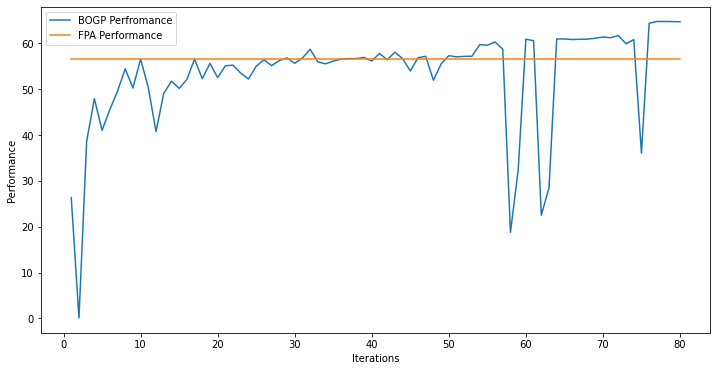

x_next is [ 26.86265978  29.99391187  29.99736699  18.3368037   29.9902069
  29.99927812  29.99100306  29.99100406  29.99904556  19.0641718
 -26.67782374  29.94916575  29.99701379  28.59867243  29.98574794
  23.48624865  29.99999818  29.98327596  19.3173344   29.9984443 ]
f()=64.828923, actual=64.962
79


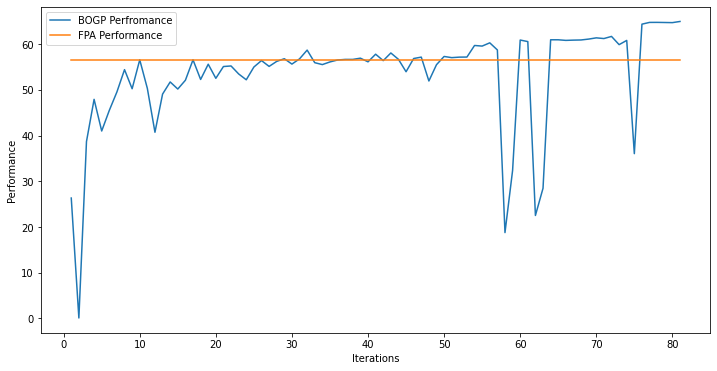

x_next is [ 26.72088547  29.99237583  29.99454761  18.46034173  29.99847918
  29.99633095  29.99300241  29.99096323  29.99473748  19.55968299
 -25.86647597  29.99856543  29.99317006  29.38789393  29.99430759
  22.50282232  29.99963516  29.97509991  18.72618703  29.98879448]
f()=64.997793, actual=64.907
80


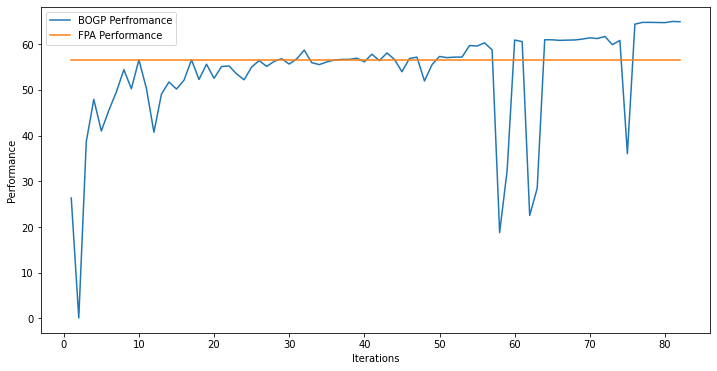

x_next is [ 26.89368587  30.          30.          18.79588479  30.
  30.          30.          30.          30.          18.96218262
 -26.58697553  29.99997915  30.          28.69328618  30.
  23.16941274  30.          29.99999999  19.65903252  30.        ]
f()=64.979831, actual=65.009
81


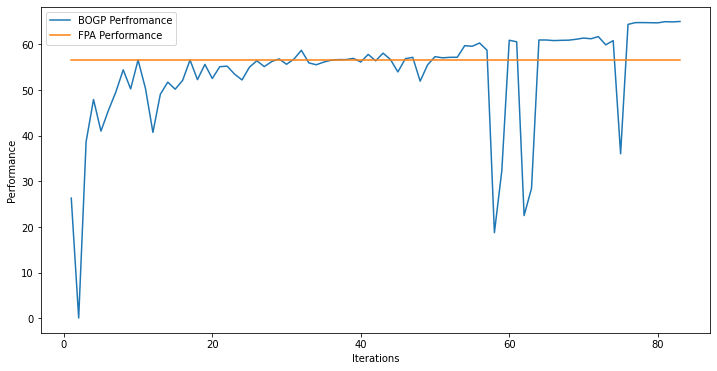

x_next is [ 26.758663    29.99816504  29.99915278  18.69458542  29.9942286
  29.99886321  29.99889498  29.99971642  29.99872073  18.76762453
 -26.79079727  29.94733596  29.9977265   28.62908158  29.99984371
  22.36447674  29.99529867  29.98892275  20.57041495  29.99956264]
f()=65.039181, actual=64.995
82


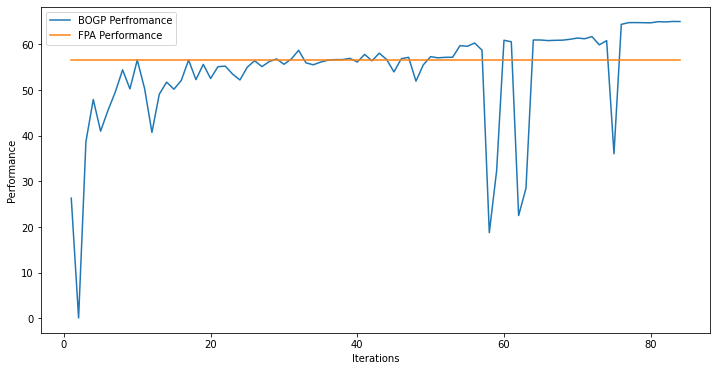

x_next is [ 26.81602573  30.          30.          19.3112233   30.
  30.          30.          30.          30.          18.97397727
 -26.64715998  30.          30.          28.85204666  30.
  23.05896961  30.          30.          20.1546651   30.        ]
f()=65.025848, actual=65.054
83


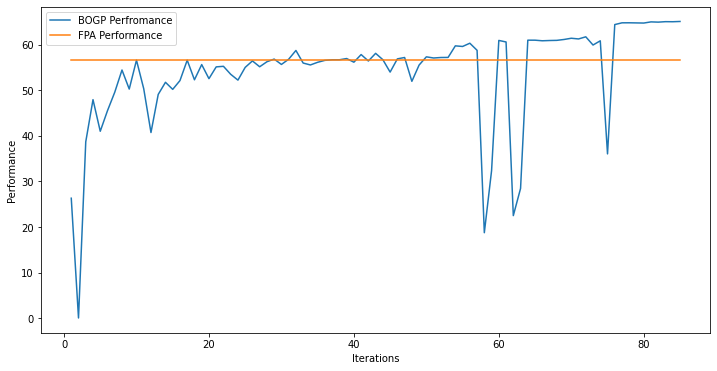

x_next is [ 4.37135823  6.38930891  3.98346143 22.5470148  15.81599703  3.59414022
  4.34340542  7.78010385  0.8327982  13.67627716  0.64693719  8.66761772
 10.44175725  2.72688947 12.58034582 17.59587215 11.74951629 10.12747537
  7.87273067  2.72393894]
f()=38.319749, actual=39.064
84


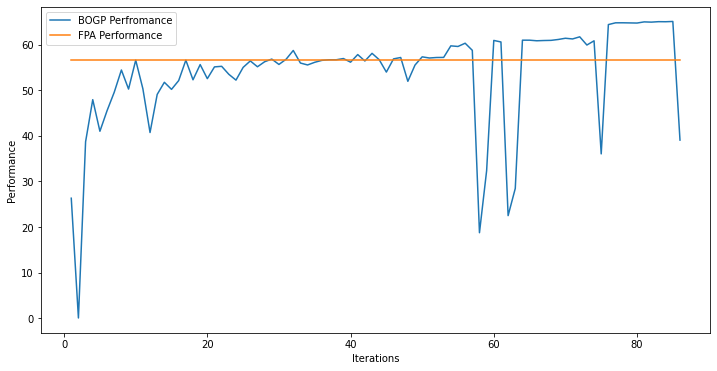

x_next is [ 26.50553175  30.          30.          19.8212305   30.
  30.          30.          30.          30.          19.36673857
 -27.01931379  29.98895269  30.          29.48850816  30.
  23.36251349  30.          30.          20.41526273  30.        ]
f()=65.084151, actual=65.106
85


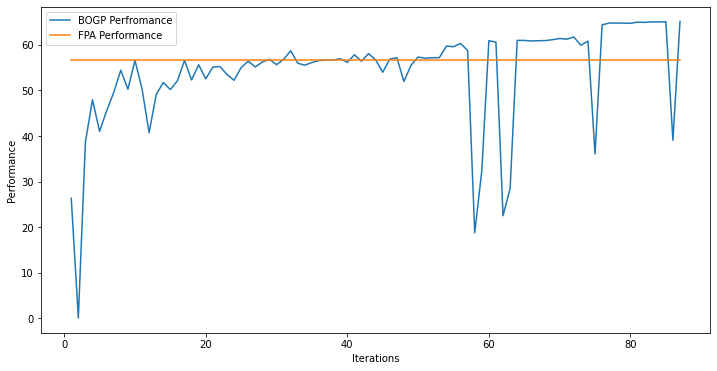

x_next is [ 26.39333262  29.96939534  29.99774013  19.79088214  29.9868515
  29.9935015   29.97937247  29.99670693  29.99410071  19.38428884
 -27.53931965  29.84693092  29.99844119  29.89657101  29.98039618
  23.52112329  29.99608279  29.97055592  20.38640422  29.9961844 ]
f()=65.106173, actual=65.118
86


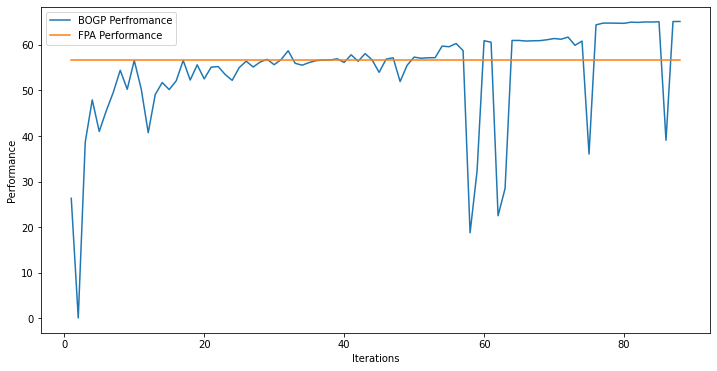

x_next is [ 26.56467481  30.          30.          19.70491943  30.
  30.          30.          30.          30.          19.25481198
 -27.70980229  29.79404268  29.97185811  30.          30.
  23.43304929  30.          30.          20.27847082  30.        ]
f()=65.130110, actual=65.123
87


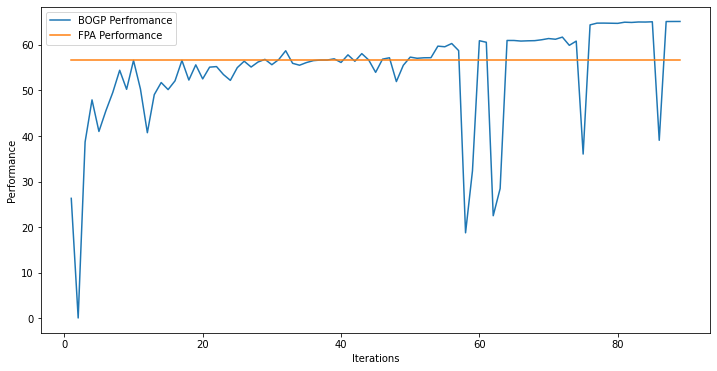

x_next is [ 26.24849804  29.99416623  29.98641803  19.83118811  29.98629693
  29.99853724  29.9981535   29.99304866  29.99222418  19.50813391
 -27.54585017  29.51645835  29.99522955  29.97528763  29.99692125
  23.51680636  29.99744911  29.93572149  20.42904338  29.99090578]
f()=65.120076, actual=65.103
88


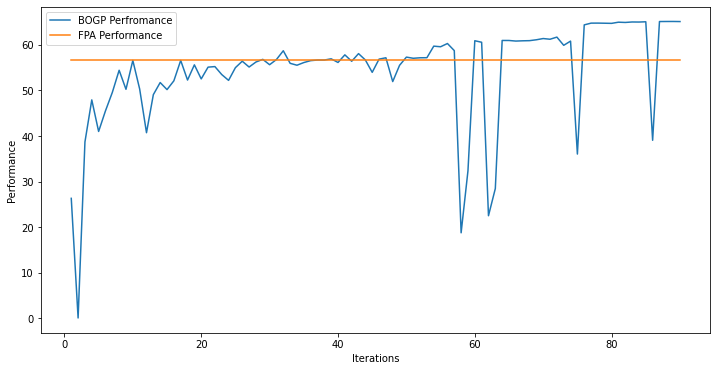

x_next is [ 26.27636935  30.          30.          19.74870425  30.
  30.          30.          30.          30.          19.39229476
 -27.73854673  29.99980465  30.          30.          30.
  23.50178347  30.          29.95114617  20.37508678  30.        ]
f()=65.133547, actual=65.135
89


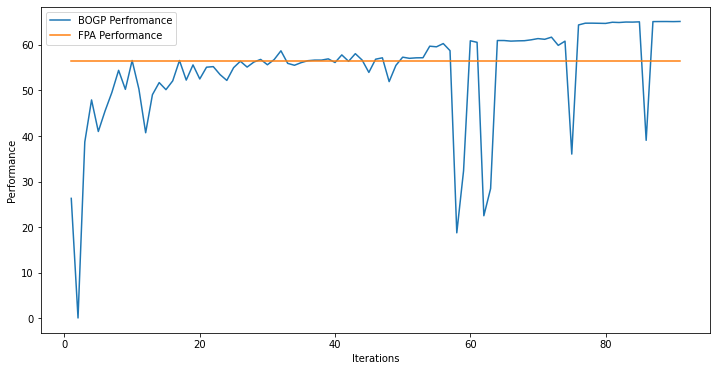

x_next is [ 26.32822266  29.99944397  29.99537239  19.67044869  29.98673997
  29.99983212  29.98853342  29.99995885  29.99217309  19.28810639
 -27.83629035  29.99681461  29.97828337  29.99769166  29.98477827
  23.49367029  29.97966229  29.92670169  20.32634715  29.99703436]
f()=65.128066, actual=65.136
90


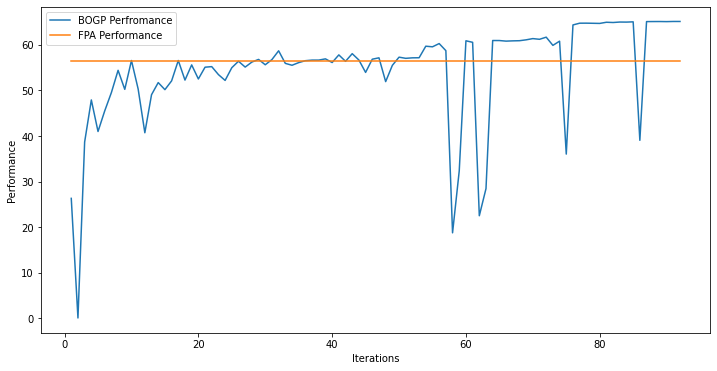

x_next is [ 26.15229392  30.          30.          19.610643    30.
  30.          30.          30.          30.          18.95816669
 -27.85389743  30.          30.          30.          30.
  23.50989154  30.          28.69941565  20.27490927  30.        ]
f()=65.179328, actual=65.197
91


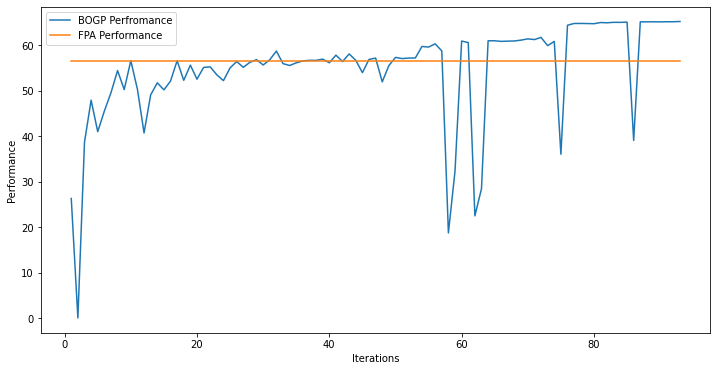

x_next is [ 26.10961086  29.99774558  29.98950457  19.59042798  29.98037954
  29.99938699  29.96633058  29.99724427  29.99911948  19.08931092
 -27.9531932   29.98264375  29.98451922  29.99438025  29.96183677
  23.54330842  29.99436008  28.40757528  20.29537967  29.99992578]
f()=65.191852, actual=65.182
92


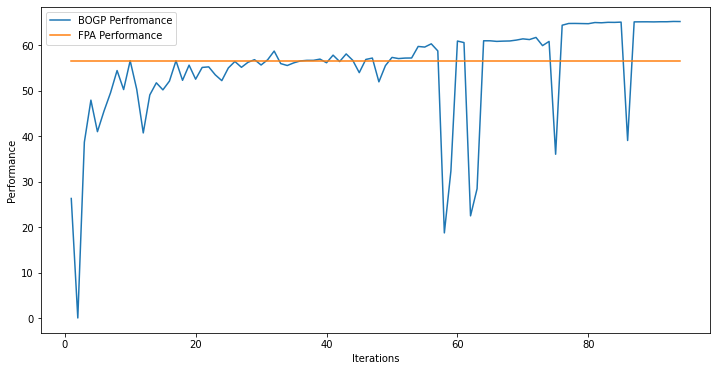

x_next is [ 25.99673718  29.99910589  29.9980246   19.71002282  29.99693741
  29.99748813  29.9785401   29.99945005  29.99800069  18.52468249
 -27.61084644  29.99920277  29.98516871  29.98941243  29.99859285
  23.52356736  29.99911679  28.57782972  20.21693442  29.99684185]
f()=65.200972, actual=65.192
93


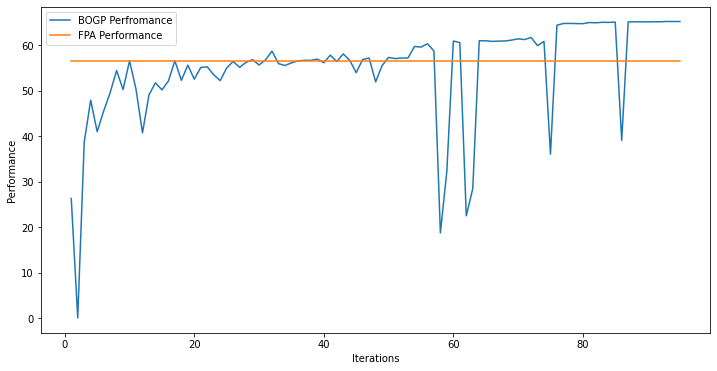

x_next is [ 26.1638645   30.          30.          19.61299955  30.
  30.          30.          30.          30.          18.74559428
 -27.72899358  30.          30.          30.          30.
  23.53152327  30.          28.72646289  20.28554314  30.        ]
f()=65.199166, actual=65.203
94


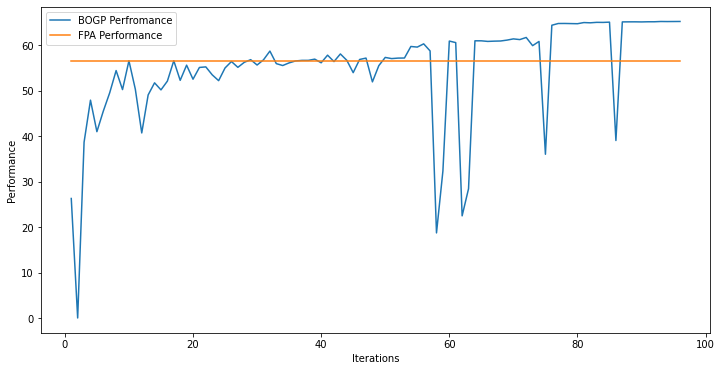

x_next is [ 26.37887252  29.99428726  29.99754122  19.44942926  29.99057783
  29.99827689  29.99749579  29.99797754  29.99742986  18.73280709
 -27.55369906  29.99177849  29.99869107  29.99059166  29.99997988
  23.67910824  29.99923491  28.72534708  20.55908532  29.99600063]
f()=65.206871, actual=65.226
95


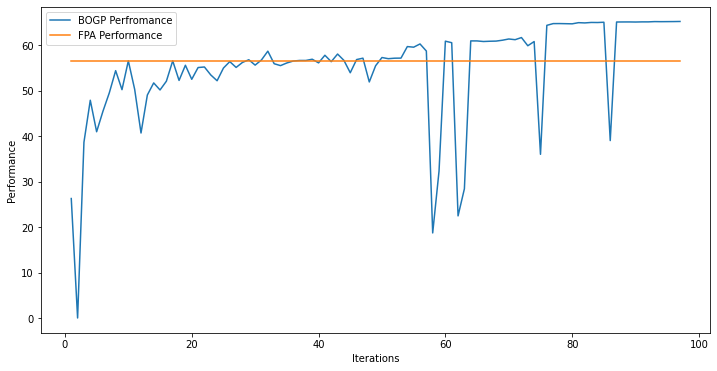

x_next is [ 26.4405486   30.          30.          19.06952197  30.
  30.          30.          30.          30.          18.6442632
 -27.1428616   30.          30.          30.          30.
  23.98099615  30.          28.51571562  21.05762435  30.        ]
f()=65.245829, actual=65.243
96


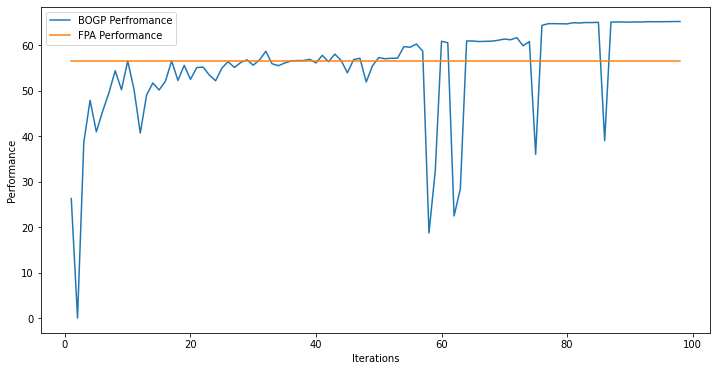

x_next is [ 26.52599436  30.          30.          19.22005752  30.
  30.          30.          30.          30.          18.66663658
 -27.28955468  30.          30.          30.          30.
  23.94609632  30.          28.52987208  21.00537803  30.        ]
f()=65.244337, actual=65.247
97


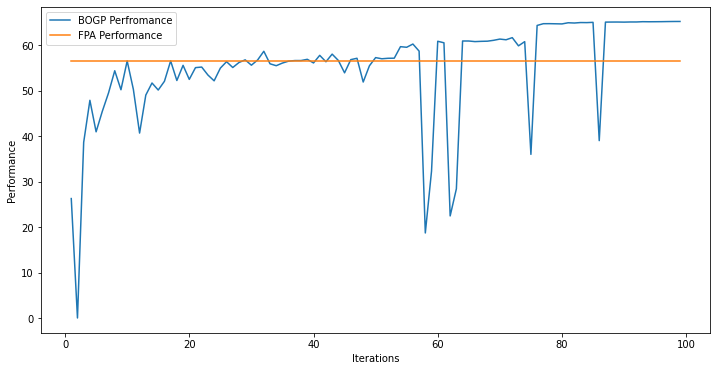

x_next is [ 26.67059517  30.          30.          19.33451393  30.
  30.          30.          30.          30.          18.62471707
 -27.39393794  30.          30.          30.          30.
  24.01864388  30.          28.485948    21.10061253  30.        ]
f()=65.249694, actual=65.256
98


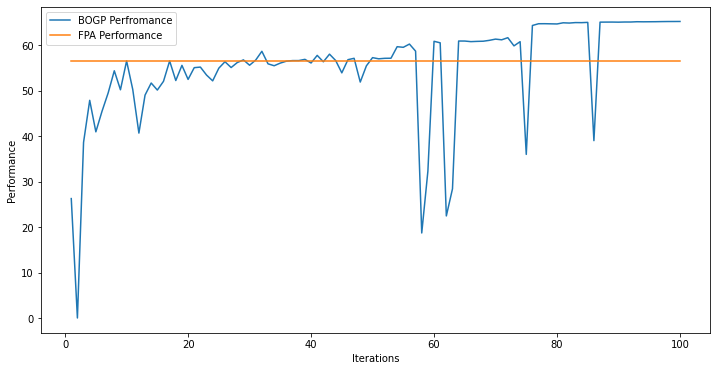

x_next is [ 26.81415389  30.          30.          19.44197154  30.
  30.          30.          30.          30.          18.45957776
 -27.54607519  30.          30.          30.          30.
  24.21689368  30.          28.41330332  21.30457014  30.        ]
f()=65.261260, actual=65.263
99


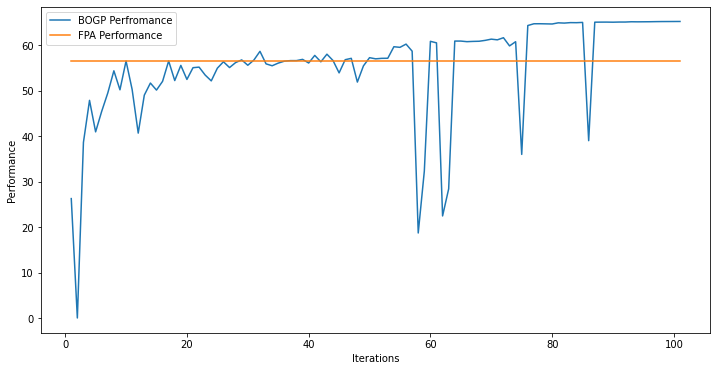

x_next is [-26.30809205  22.97049413 -26.80116584  21.93213944 -26.4832522
  29.52371545  12.61173851  -1.60071562  -3.2594964   14.35099957
 -29.57933081  -9.55060226  -2.39802872 -28.48531719  24.83390658
   8.01734334   7.29926911 -17.60827656  12.98024424 -28.05193987]
f()=55.476700, actual=32.076
100


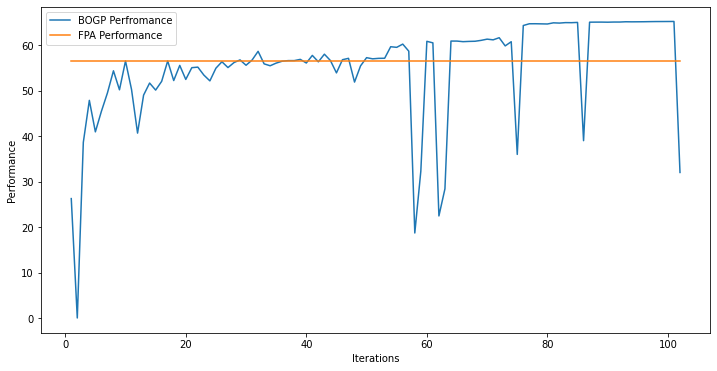

x_next is [ 26.79747073  30.          30.          19.44253952  30.
  30.          30.          30.          30.          18.40970213
 -27.60910791  30.          30.          30.          30.
  24.27487945  30.          28.41782297  21.34410839  30.        ]
f()=65.263376, actual=65.263
101


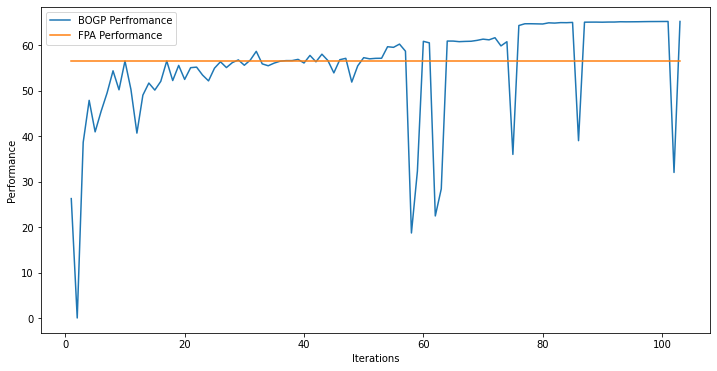

x_next is [ 26.89069146  29.99989184  29.99607797  19.4289247   29.99547161
  29.99866997  29.99449047  29.99848834  29.99457333  18.42222889
 -27.58756824  29.98593724  29.9994496   29.98618622  29.99724228
  24.24387865  29.99654917  28.44329836  21.27875606  29.99952675]
f()=65.259558, actual=65.261
102


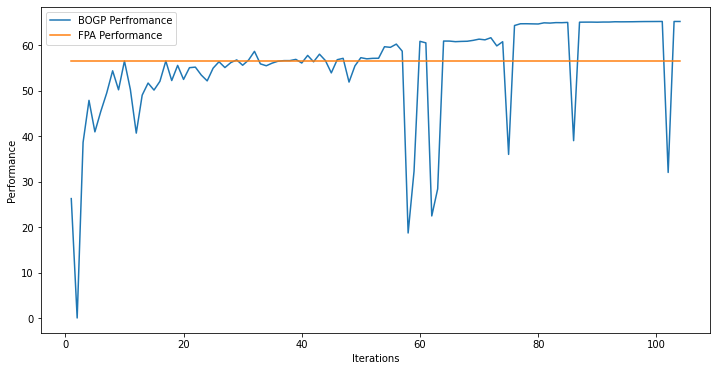

x_next is [ 27.00985058  30.          30.          19.4059116   30.
  30.          30.          30.          30.          18.39280068
 -27.56217519  30.          30.          30.          30.
  24.26949009  30.          28.3925087   21.23197522  30.        ]
f()=65.264768, actual=65.263
103


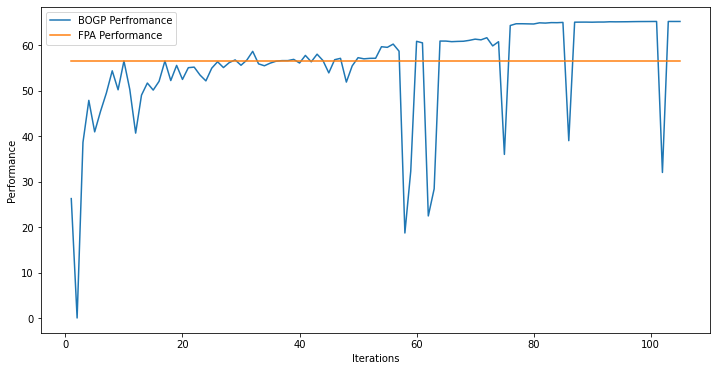

x_next is [ 26.93273707  30.          30.          19.42617383  30.
  30.          30.          30.          30.          18.41812452
 -27.59479755  30.          30.          30.          30.
  24.21519027  30.          28.49716024  21.28712452  30.        ]
f()=65.264079, actual=65.264
104


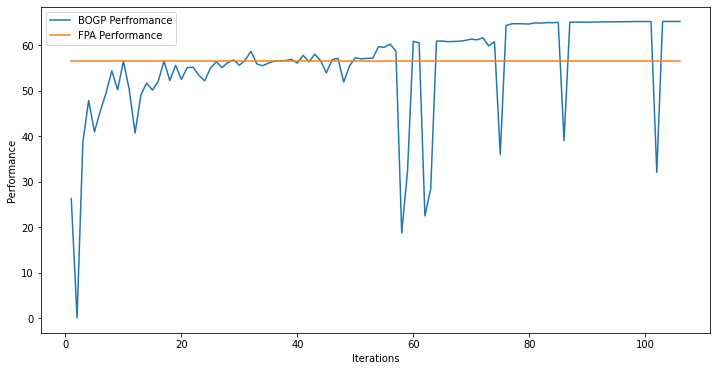

x_next is [  6.45197207  18.74609894 -28.63066509   1.87904467 -14.03360448
 -19.21045172 -15.73485524 -25.45578893   3.35252522  -6.94625574
 -21.40254166 -24.99296494  27.35247504   4.32738478   3.54469423
 -13.82004211   8.32496132   1.31560729  11.16166586  14.96983408]
f()=55.624760, actual=30.377
105


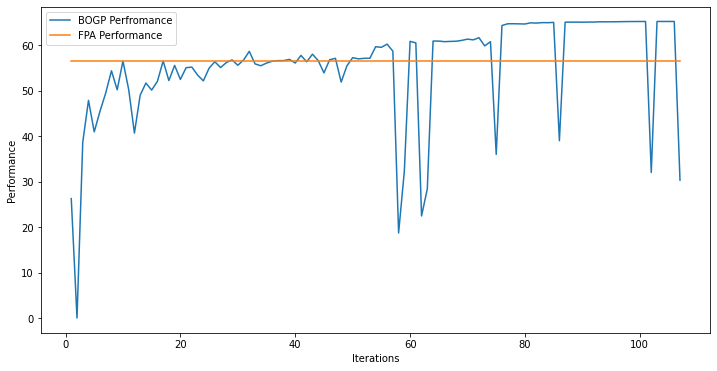

x_next is [ 26.89185195  29.99868343  29.99969016  19.44664258  29.99533416
  29.99784528  29.99918217  29.99981572  29.9960717   18.39855377
 -27.58800547  29.99570534  29.9889166   29.99848369  29.99123917
  24.25050968  29.99823576  28.38742355  21.25223646  29.98671282]
f()=65.259976, actual=65.264
106


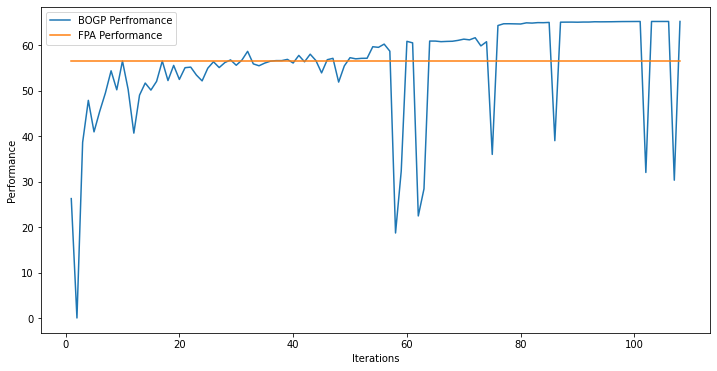

x_next is [ 26.90864258  29.99682949  29.99932214  19.4555281   29.9989504
  29.99933264  29.99673327  29.99578841  29.99576154  18.28839857
 -27.64881159  29.98898217  29.84744641  29.99699536  29.99902827
  24.1283487   29.9939067   28.3953405   21.1741922   28.9424977 ]
f()=65.292604, actual=65.451
107


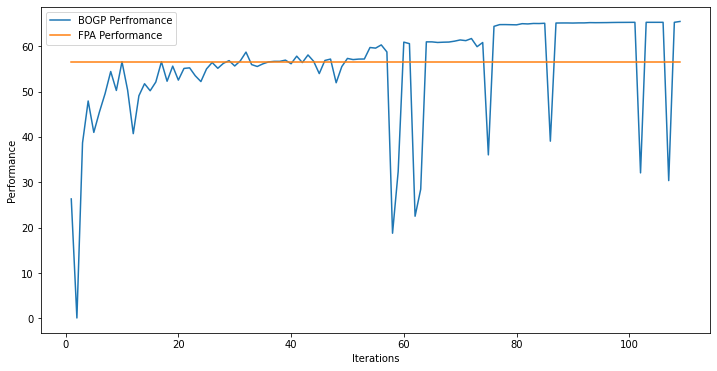

x_next is [ 26.72037994  30.          30.          19.23057519  30.
  30.          30.          30.          30.          18.48045676
 -27.46241571  30.          30.          30.          30.
  24.01813122  30.          28.23022217  21.19501319  25.67144755]
f()=65.694315, actual=65.657
108


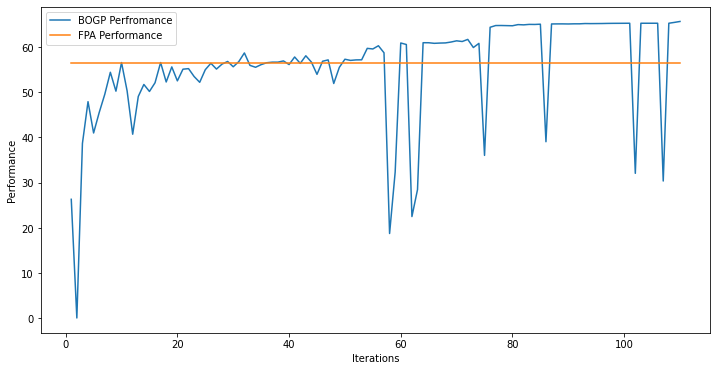

x_next is [ 26.7645712   30.          30.          19.27908861  30.
  30.          30.          30.          30.          18.45936676
 -27.5025956   30.          30.          29.99999999  30.
  24.05528059  30.          28.27019066  21.19826052  26.04870629]
f()=65.659448, actual=65.662
109


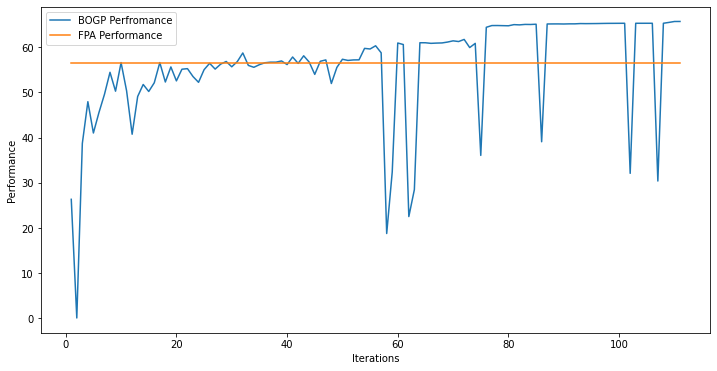

x_next is [ 16.42005547 -22.71158804  -0.305288   -20.19283463 -29.80883338
 -23.12246224  -8.40900911 -28.97089904   8.5285957   19.0784065
  -2.59155709   7.84634729  23.98555807  26.28935134   2.42992728
  28.9311836  -13.77857617  -1.25279995  -6.31772423  18.64545822]
f()=55.752931, actual=29.280
110


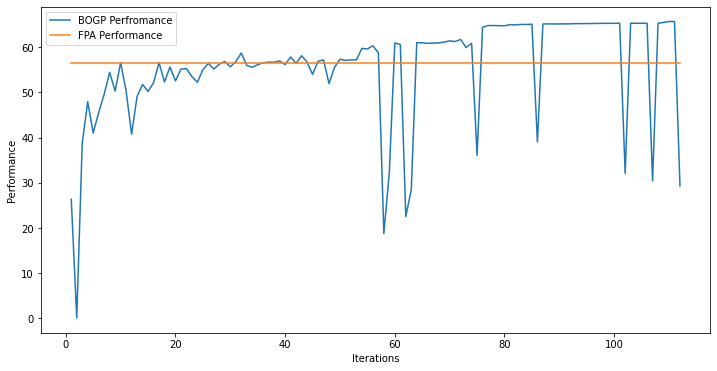

x_next is [ 26.87525598  30.          30.          19.3061875   30.
  30.          30.          30.          30.          18.51524625
 -27.54033574  29.99464052  30.          30.          29.9883853
  24.06764963  30.          28.37168171  21.19096255  26.15077987]
f()=65.660908, actual=65.660
111


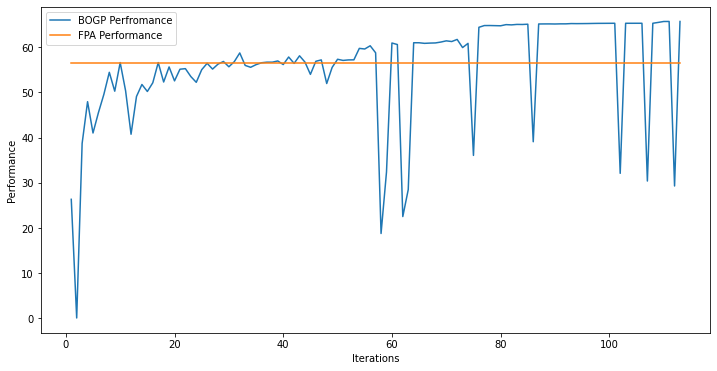

x_next is [ 26.71765912  30.          30.          19.29556245  30.
  30.          30.          30.          30.          18.40540047
 -27.50549612  30.          30.          30.          30.
  24.0796362   30.          28.22438985  21.21082946  26.16495264]
f()=65.662758, actual=65.661
112


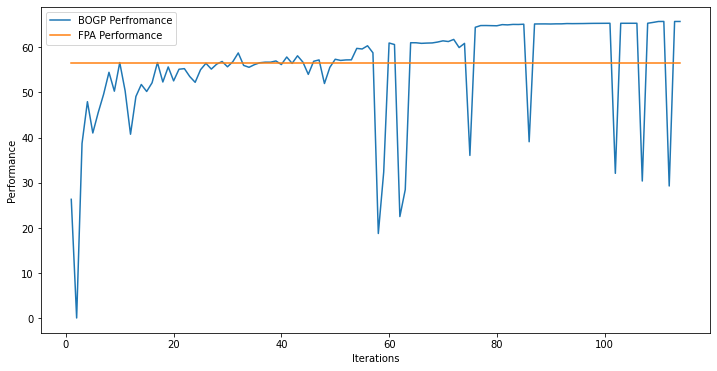

x_next is [ 26.80905122  29.99959412  29.99817977  19.24055304  29.99989859
  29.99528074  29.99908185  29.9950018   29.9996808   18.52978966
 -27.37194819  29.99368351  29.99281838  29.99392394  29.99970144
  23.98559496  29.99915048  28.2633157   21.18163125  26.06309415]
f()=65.660400, actual=65.671
113


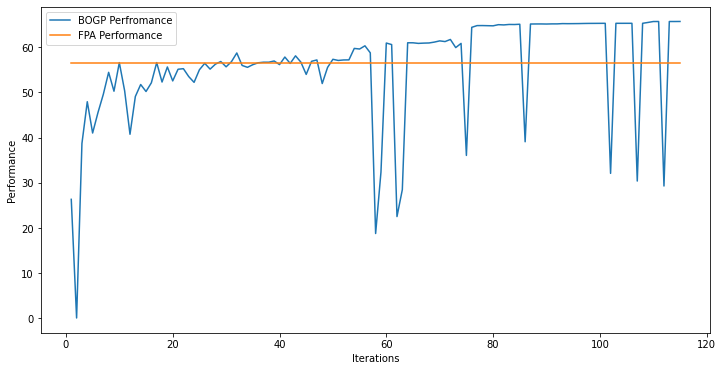

x_next is [ 27.00212533  30.          30.          19.15514579  30.
  30.          29.99999998  29.99999998  30.          18.77004452
 -26.58262835  29.99999998  29.99999998  30.          30.
  23.57740892  30.          28.07336313  21.12917743  25.97295449]
f()=65.697221, actual=65.694
114


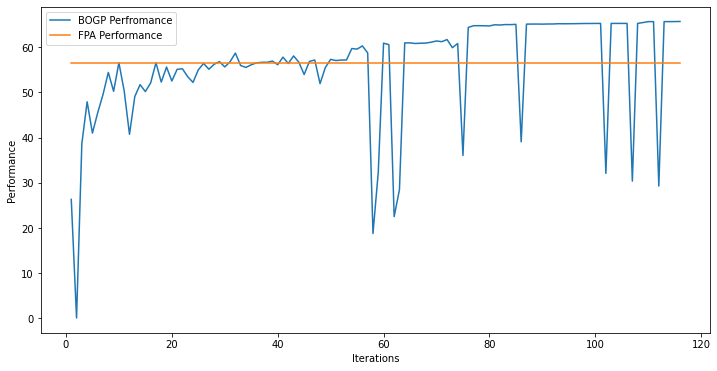

x_next is [ 26.89828588  30.          30.          19.07737609  30.
  30.          30.          30.          30.          18.78594386
 -26.66779571  30.          29.99999998  30.          30.
  23.64088918  30.          28.05179093  21.15505057  26.05415039]
f()=65.694865, actual=65.695
115


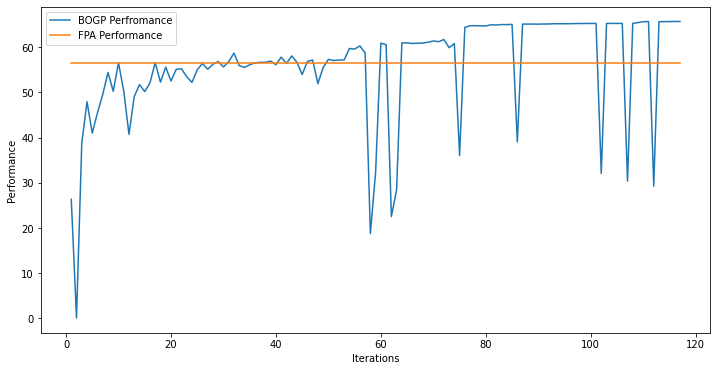

x_next is [ 29.07830603 -25.84185805   5.23457808   6.21377311 -12.58551441
   4.00325903 -10.72238873 -27.17972552 -17.60229259  21.6601197
   4.35740396   7.42674155 -26.40987929   4.13345874  11.09172527
  -1.85339512  17.54967698  19.62496244  15.36873998  -7.48679514]
f()=33.850213, actual=31.751
116


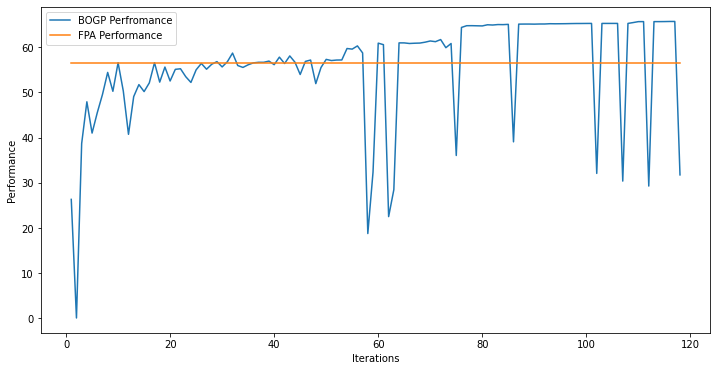

x_next is [ 27.00250053  30.          30.          19.05846061  30.
  30.          30.          30.          30.          18.80992862
 -26.72315038  30.          29.9929355   29.99995485  30.
  23.67542512  30.          28.06516812  21.17378777  26.07511257]
f()=65.694056, actual=65.693
117


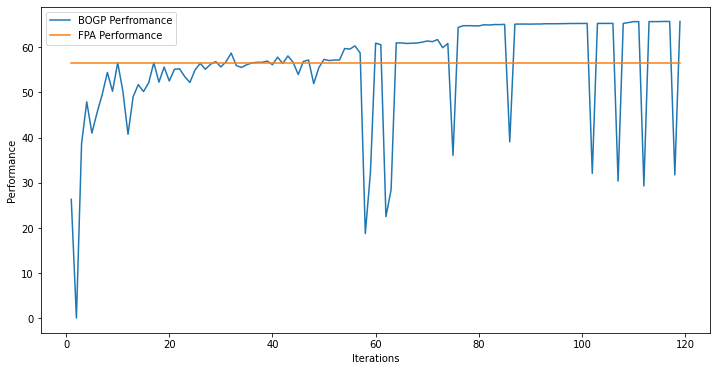

x_next is [ 26.77271374  29.99988285  29.99911316  19.14726851  29.99916699
  29.99971816  29.99924832  29.99887703  29.99544362  18.74008219
 -26.58499707  29.98607808  29.98985938  29.99382354  29.99920095
  23.56611409  29.99966519  28.16360202  21.08788719  25.99977972]
f()=65.693544, actual=65.693
118


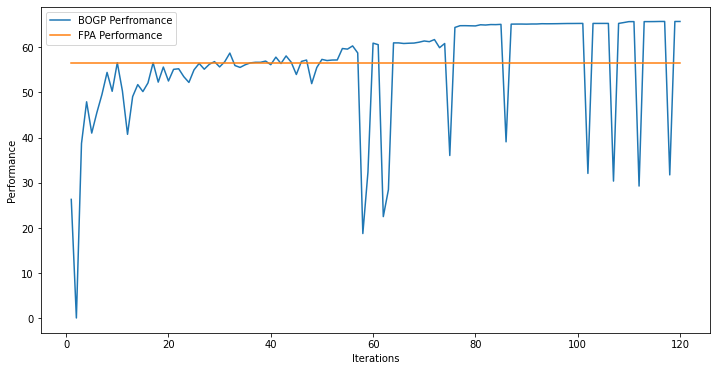

x_next is [ 29.99952686  29.99995196  29.99989443  29.99997505  29.99981502
  29.99976069  29.99975581  29.99986673  29.99989972  29.99982899
 -30.999817    29.99949759  29.99996841  29.99981112  29.9994357
  29.99987944  29.99997371  29.99973411  29.9999822   29.99964209]
f()=62.732824, actual=56.659
119


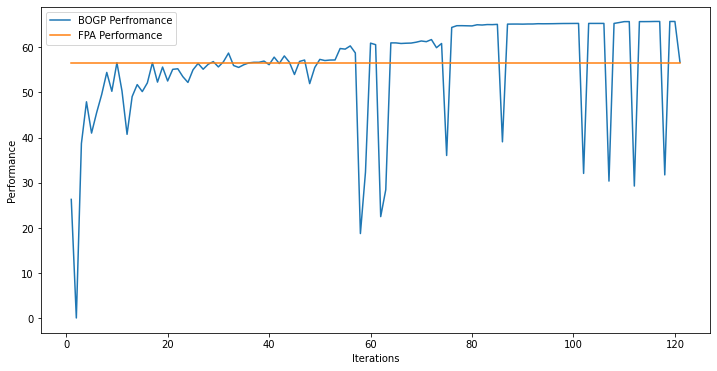

x_next is [ 26.86820179  29.98298472  29.9968266   19.08467416  29.99949948
  29.99711354  29.99873723  29.98478729  29.9978714   18.6485941
 -26.57589765  29.9882307   29.91795706  29.990205    29.99881446
  23.54138517  29.99951281  28.11319318  21.08371043  26.06758379]
f()=65.690619, actual=65.694
120


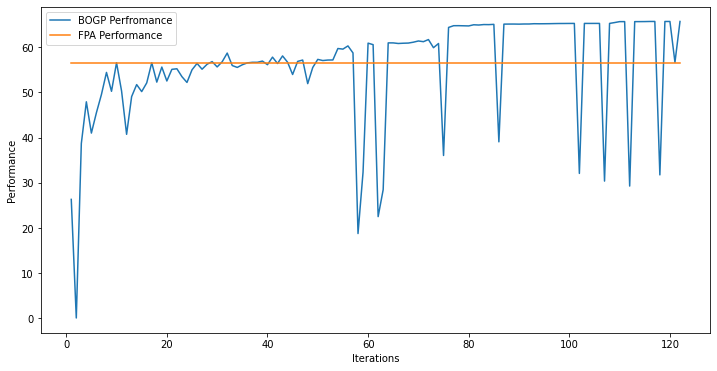

x_next is [ 26.84496662  29.99888787  29.9985396   19.01196072  29.99991616
  29.99997099  29.99998685  29.99990832  29.99958929  18.60521688
 -26.5858216   29.9986341   29.68289168  29.99990558  29.99566637
  23.5486508   29.99999273  28.02489241  21.0275241   26.01846543]
f()=65.699321, actual=65.668
121


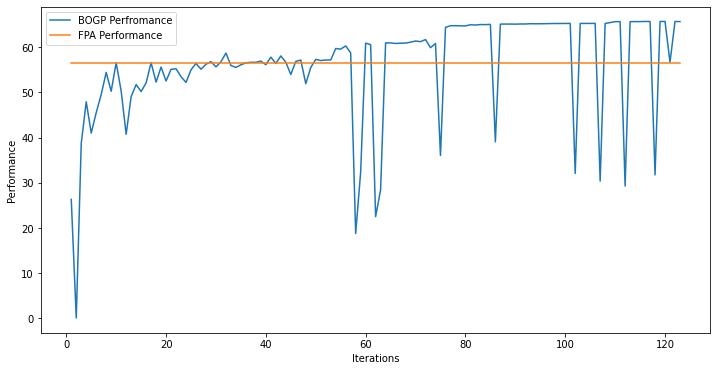

x_next is [ 26.93019237  29.99999989  29.99639339  18.7466491   29.99999996
  30.          29.9999999   29.97325472  30.          18.08321776
 -26.62620853  29.99741504  30.          30.          30.
  23.22815463  30.          28.28444924  21.27568218  26.1693501 ]
f()=65.728294, actual=65.750
122


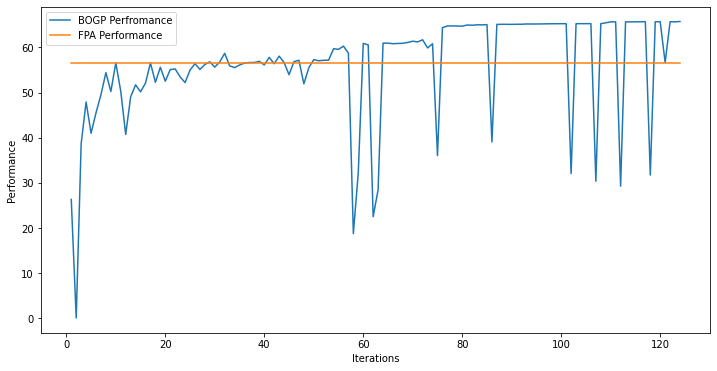

x_next is [ 28.12177734  28.59936722 -29.95474123  19.28771712  22.57726151
  28.86815804 -10.90932776  -7.91200602  27.96533397  25.07741776
  15.45860613   1.72264835  25.59495659  20.42083765  28.5593562
   7.41578145 -16.76929501  28.93434286  27.79390076 -21.4572328 ]
f()=55.115785, actual=44.183
123


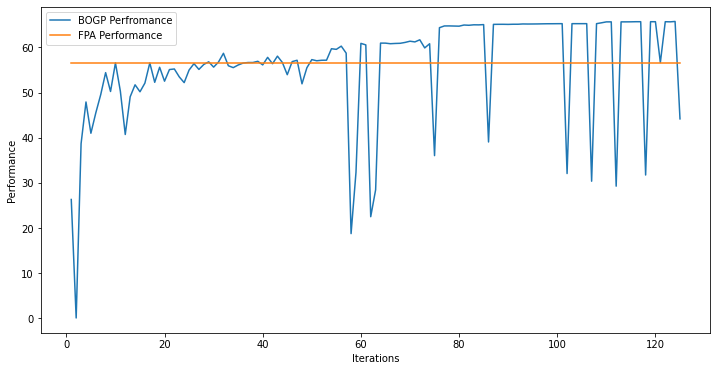

x_next is [ 27.05964104  30.          30.          18.45455588  30.
  30.          30.          29.99476952  30.          17.94597723
 -26.62981112  29.99798486  30.          29.99999957  30.
  22.96819004  30.          28.31489591  21.50866075  25.8852063 ]
f()=65.757634, actual=65.768
124


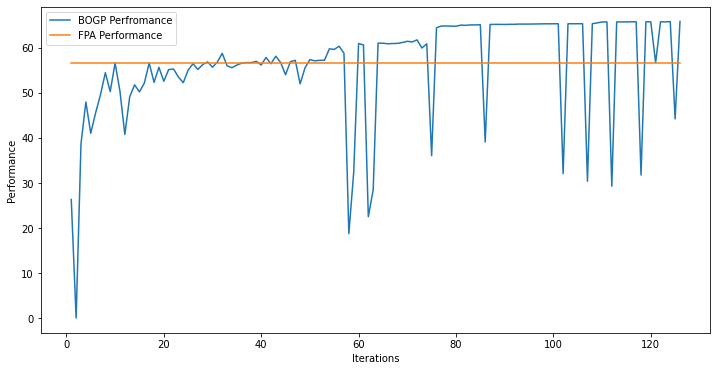

x_next is [ 27.01109366  30.          30.          18.19948719  30.
  30.          30.          30.          30.          17.87880619
 -26.68126795  29.99992397  30.          29.99999999  30.
  22.73400096  29.99999999  28.35177291  21.79601699  25.68071575]
f()=65.771121, actual=65.778
125


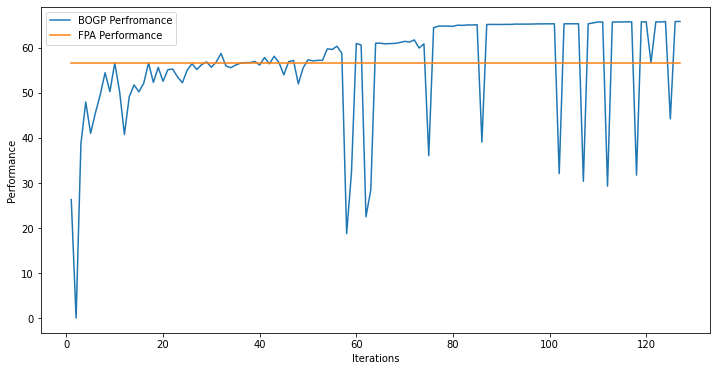

x_next is [ 26.95798735  29.99997559  29.99989722  18.1339647   29.9998484
  30.          29.9999152   29.99211249  30.          17.8935895
 -26.64486059  29.99985896  29.99997559  29.99906864  30.
  22.58564737  29.99980985  28.37693347  22.01787122  25.47598789]
f()=65.779858, actual=65.780
126


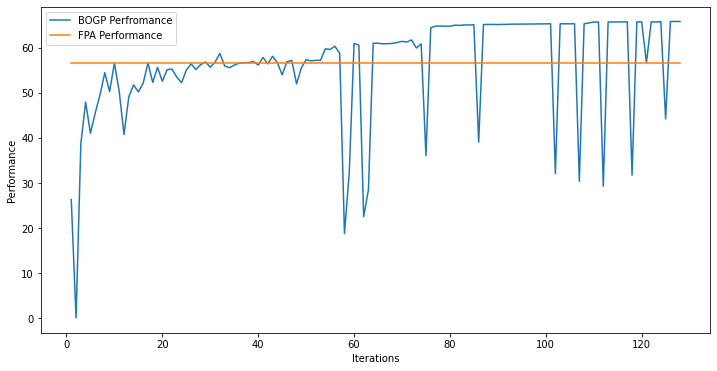

x_next is [ 26.97277817  29.99839976  29.99119198  18.11754626  29.99948406
  29.99948946  29.99173954  29.9885813   29.99417376  17.85639701
 -26.62674223  29.99139702  29.99963683  29.99850732  29.99658799
  22.59143063  29.9915495   28.34493264  21.91631924  25.56227443]
f()=65.777393, actual=65.781
127


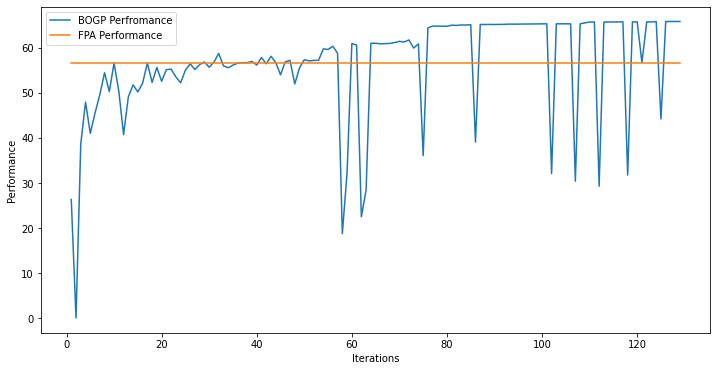

x_next is [ 26.81723754  29.99694352  29.99993443  17.76972544  29.99909754
  29.99994671  29.99739591  29.95660162  29.99622909  17.65243357
 -26.42708003  29.99810012  29.99980999  29.9941542   29.99655167
  22.0989023   29.99741685  28.01249465  21.72932868  25.30137455]
f()=65.796883, actual=65.804
128


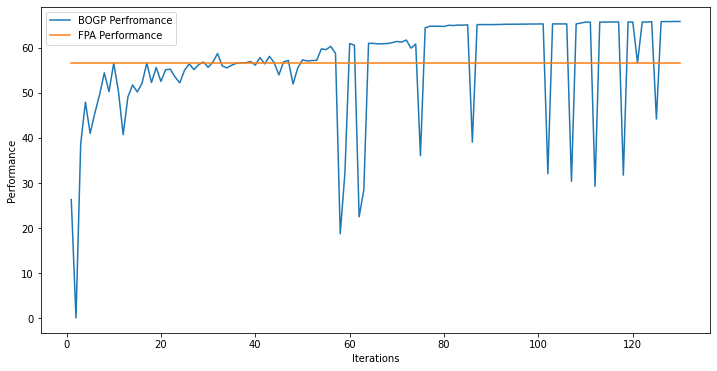

x_next is [ 26.85968635  29.99587768  29.99939648  17.73700937  29.99850798
  29.99834444  29.99480501  29.96070015  29.99966108  17.6876522
 -26.41967179  29.99915752  29.99705821  29.99937825  29.99889119
  21.98865595  29.9988276   27.93108777  21.63066836  25.11422987]
f()=65.805096, actual=65.805
129


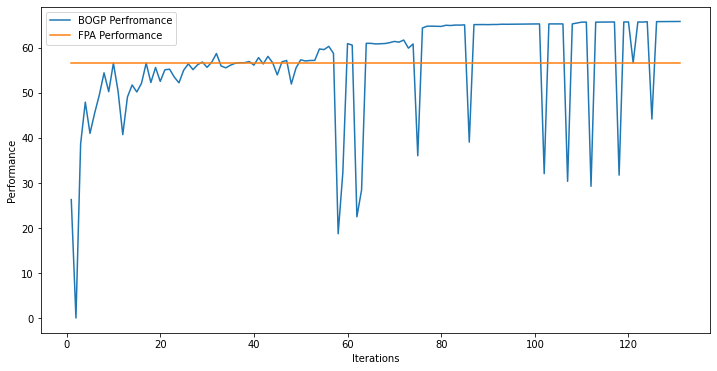

x_next is [ 26.89147006  29.99999999  30.          17.69243421  30.
  30.          30.          29.96658902  30.          17.62377549
 -26.36848057  29.99999997  30.          29.99999998  30.
  21.95482402  29.99999999  27.92537201  21.64102054  25.15271515]
f()=65.807069, actual=65.805
130


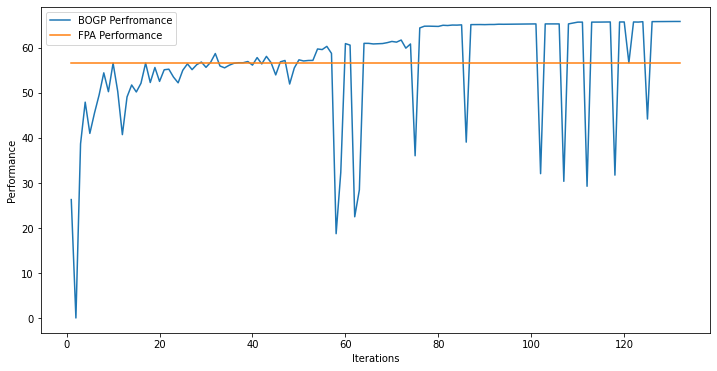

x_next is [ 26.71336031  29.99336008  29.9935056   17.79061143  29.99851507
  29.9982174   29.99625447  29.61512343  29.99921261  17.793304
 -26.54219187  29.99678329  29.99911164  29.99466374  29.99971695
  21.99890772  29.99923236  27.91712352  21.59368852  25.18396621]
f()=65.808131, actual=65.890
131


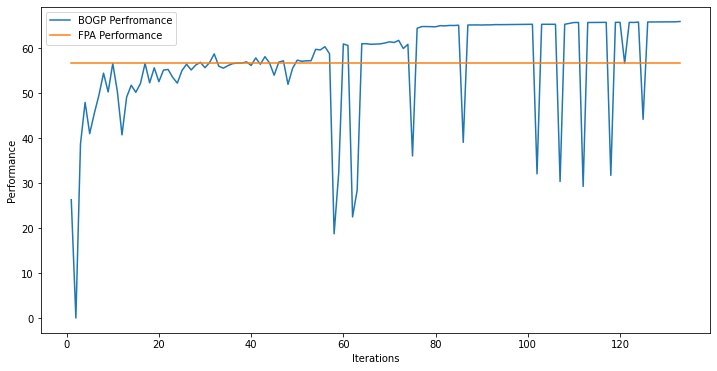

x_next is [ 26.54888746  29.99997304  29.99996912  17.412626    29.99875211
  29.99985708  29.99845503  25.53566143  29.99991077  18.23733605
 -26.60840998  29.99871235  29.9974701   29.99825994  29.99971209
  21.43824482  29.99925568  27.6461315   21.58316941  24.59149867]
f()=66.320541, actual=66.400
132


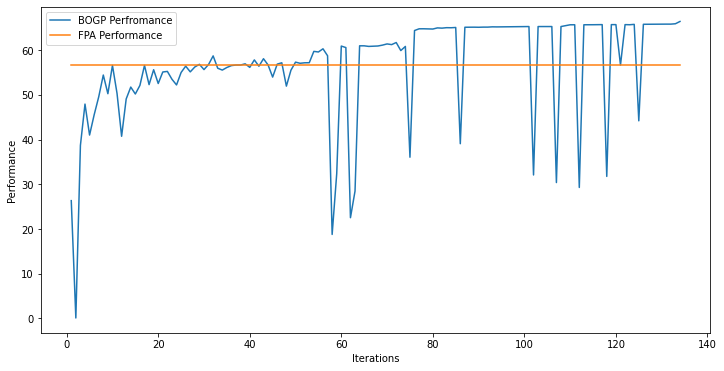

x_next is [ 29.49673134  21.86695449  16.17855526 -29.97949368  28.87334769
  27.79173243  28.10095762   1.79727695   8.49123569  25.6595896
  21.71781421   5.024054    10.87865637  23.36329294  29.81008177
  29.81916287 -10.50863258  16.87243539  17.23795613   6.85133548]
f()=56.717503, actual=42.411
133


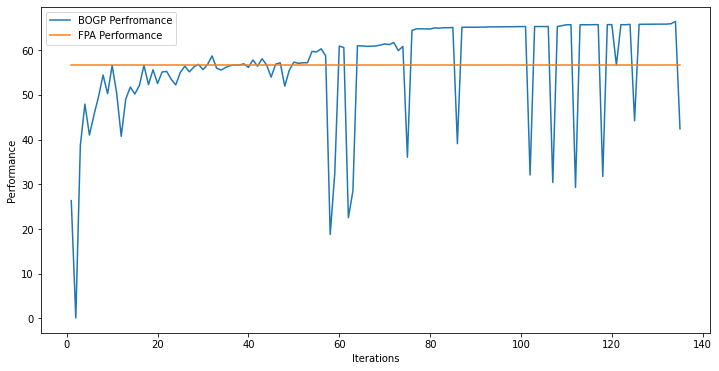

x_next is [ 26.39332168  29.99813728  29.99678828  17.1706283   29.99871416
  29.99935924  29.99794644  24.89439535  29.99569223  18.33060503
 -26.61317156  29.99912703  29.99664072  29.9994202   29.99758916
  21.2606234   29.99152892  27.63540655  21.61219838  24.29613982]
f()=66.406082, actual=66.421
134


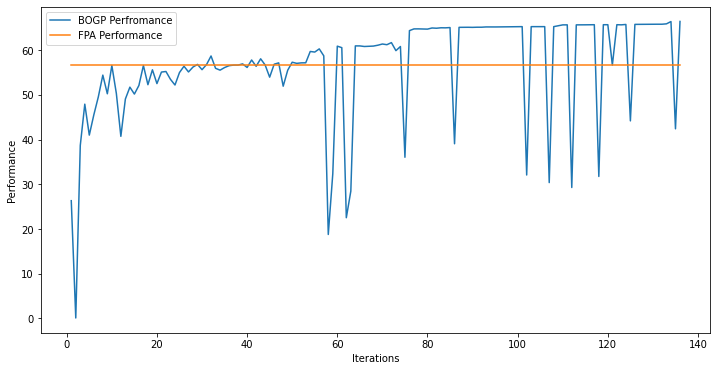

x_next is [ 26.17559517  29.99813926  29.99855503  16.92668545  29.99781993
  29.99940151  29.99899928  24.43651616  29.99880968  18.42107522
 -26.5726517   29.99678951  29.99885228  29.99795568  29.99944579
  20.94486652  29.99831104  27.43534141  21.75557339  23.92690498]
f()=66.428271, actual=66.418
135


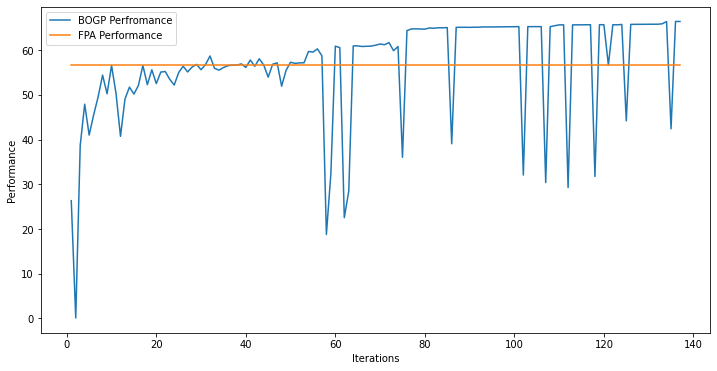

x_next is [ 26.29382249  30.          30.          17.11862593  30.
  30.          30.          24.54224261  29.99971543  18.44182252
 -26.60311203  29.99915883  30.          29.99921541  30.
  21.21429767  29.99956215  27.82125451  21.54508691  24.22184375]
f()=66.425985, actual=66.425
136


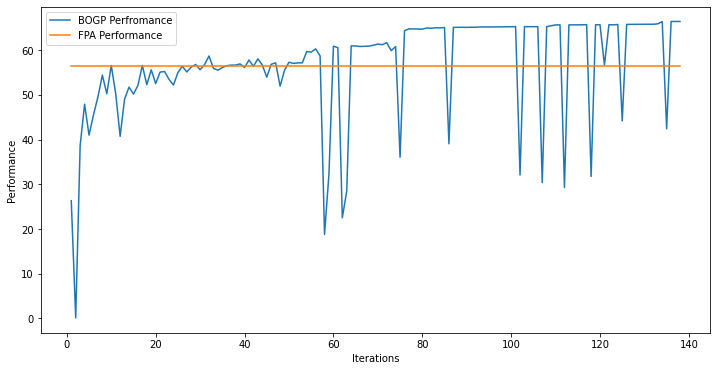

x_next is [ 30.          30.          30.          30.          30.
  30.          30.          29.99998196  30.          30.
 -30.99963869  29.99994931  30.          30.          30.
  30.          29.99987358  29.99995748  30.          29.99996909]
f()=56.825016, actual=56.660
137


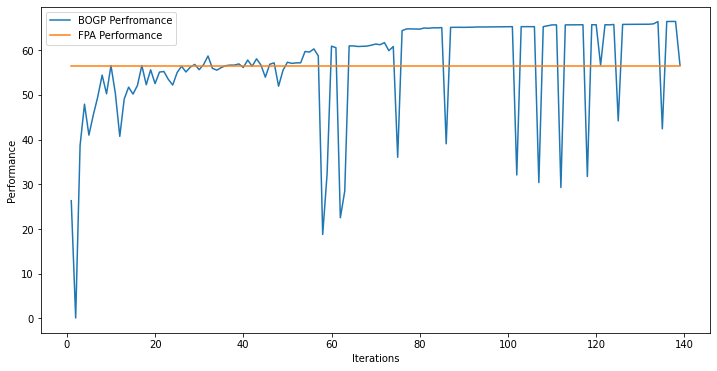

x_next is [ 29.99810559  29.99990839  29.99845617  29.99633602  29.99754021
  29.99981799  29.99968594  29.99833428  29.9968644   29.99487868
 -30.99995969  29.99769845  29.99627691  29.99969209  29.99640983
  29.99961318  29.99885863  29.99981246  29.99372011  29.99926513]
f()=56.823777, actual=56.665
138


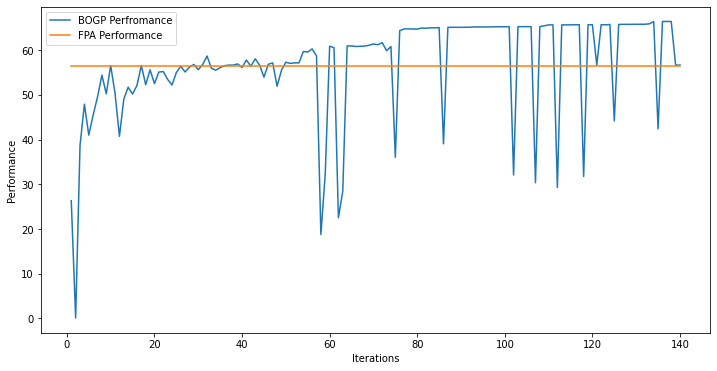

x_next is [ 26.31410546  29.99957721  29.99935949  17.07375267  29.99981183
  29.99973345  29.99816255  24.61787125  29.99977702  18.35235567
 -26.66838532  29.99920094  29.99923154  29.9951816   29.99870115
  21.26144961  29.99958163  27.68632219  21.56391182  24.21887716]
f()=66.424884, actual=66.426
139


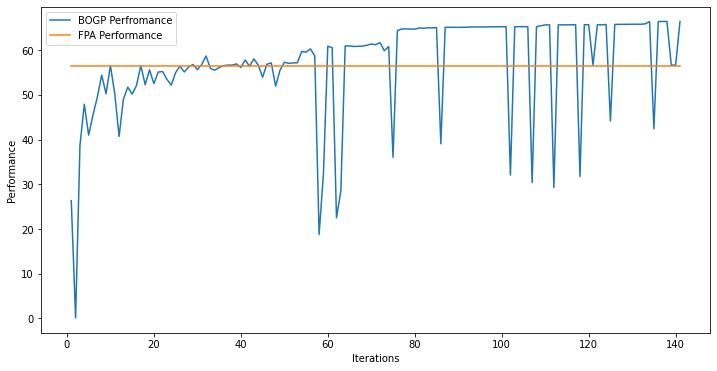

x_next is [ 26.34928955  29.99581112  29.99862504  17.06046489  29.9996942
  29.99939857  29.99958021  24.54072279  29.99860439  18.35627777
 -26.86140331  29.99631878  29.99703364  29.99825136  29.99664845
  21.36776659  29.99839154  27.655096    21.52954199  24.20788554]
f()=66.425738, actual=66.422
140


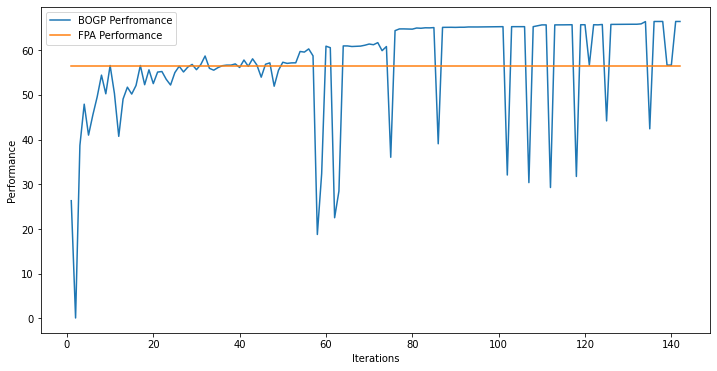

x_next is [ 26.19010485  29.99686489  29.99981841  16.86559724  29.99675416
  29.9999796   29.99938536  24.6458778   29.99959604  18.11698428
 -26.47465384  29.99987329  29.99881038  29.99989637  29.99977848
  21.26672835  29.9995218   27.72815604  21.45296751  24.23884193]
f()=66.429539, actual=66.448
141


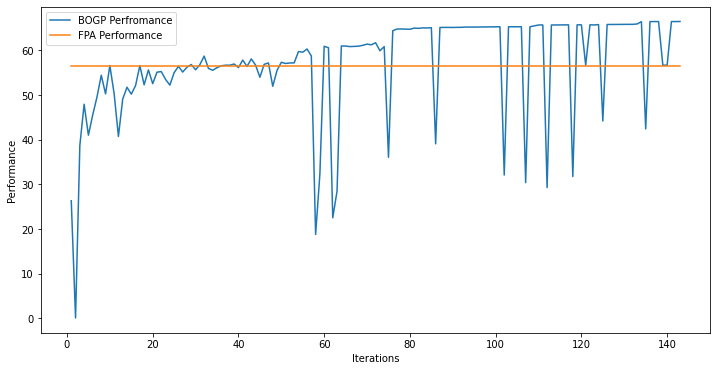

x_next is [ 25.84891306  29.99986934  29.99989531  16.33046891  29.99877408
  29.99926619  29.99668225  24.48185655  29.99977873  17.75755746
 -26.14056388  29.99934834  29.99973533  29.99947691  29.99947236
  21.29001267  29.99043075  27.87764451  21.15432181  23.87035582]
f()=66.466259, actual=66.476
142


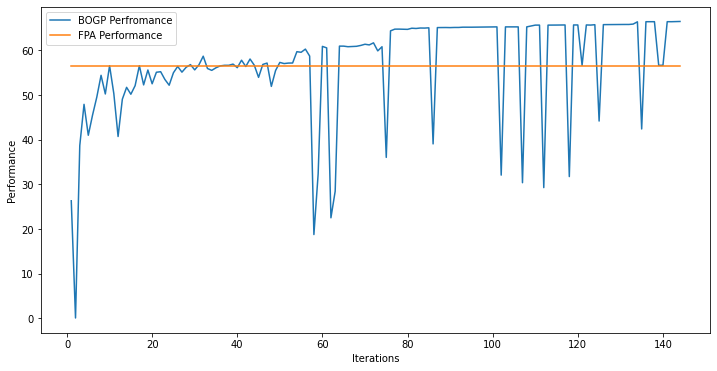

x_next is [ 25.79392007  29.9998643   29.99443039  16.18484479  29.99970242
  29.99876407  29.99946091  24.47794457  29.99837443  17.72621097
 -25.97289455  29.99884872  29.99831903  29.99584155  29.99645756
  21.25215108  29.99476144  27.90747508  21.07337509  23.53694856]
f()=66.477443, actual=66.482
143


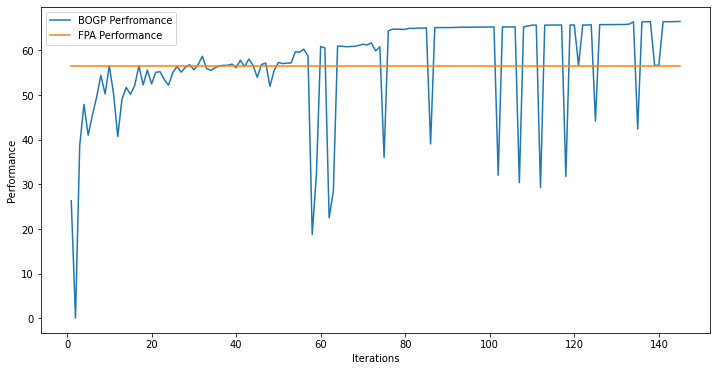

x_next is [ 25.87064999  29.99235771  29.9879665   16.12853857  29.9982369
  29.99891072  29.99692009  24.37762349  29.99853645  17.86025632
 -25.67903274  29.98231523  29.99740754  29.99690072  29.99780894
  21.30571904  29.99818016  27.83287717  21.12946648  23.30076406]
f()=66.480110, actual=66.474
144


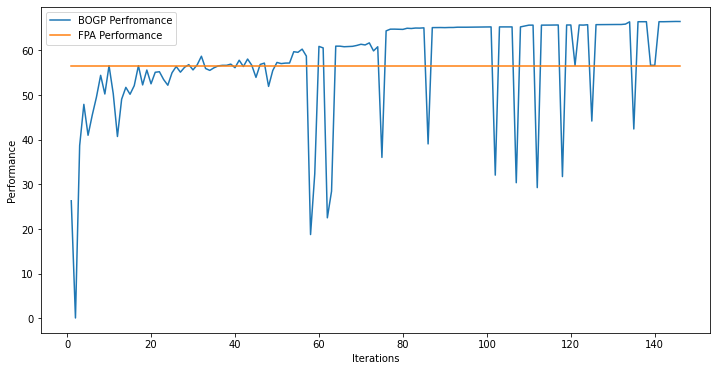

x_next is [ 25.79138143  29.99913909  29.99989401  16.14387211  29.99979631
  29.99989042  29.99701937  24.49510262  29.99825793  17.66161677
 -26.15632257  29.9987274   29.99989337  29.99866151  29.99908371
  21.06113684  29.99995355  28.08649188  20.98714049  23.32832978]
f()=66.485763, actual=66.497
145


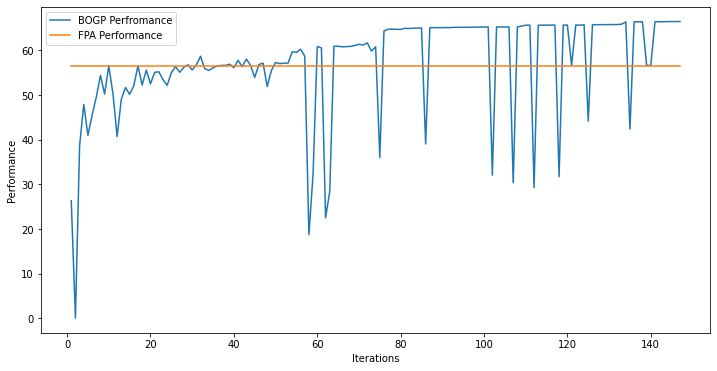

x_next is [ 26.05285957  29.99970561  29.99864223  15.96686422  29.99959542
  29.99952744  29.998859    24.32135926  29.9995104   17.55941404
 -26.29855624  29.99722167  29.99977155  29.99975041  29.99983387
  20.62927429  29.99934019  28.39424847  20.96918168  22.92609684]
f()=66.509458, actual=66.530
146


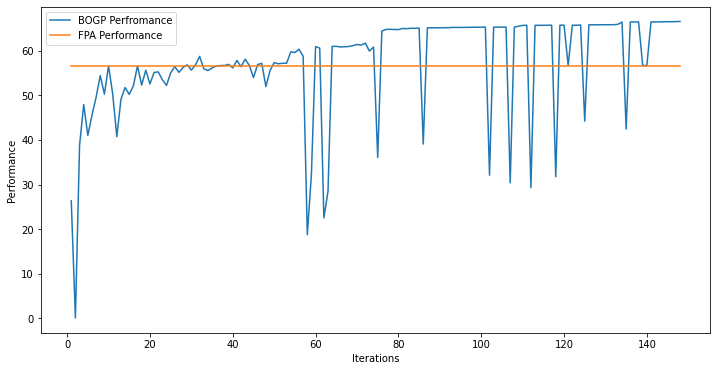

x_next is [ 26.59188179  29.99725959  29.99954427  15.54893487  29.99872193
  29.99996776  29.99498872  24.00802407  29.99918787  17.37108068
 -26.25711834  29.99930699  29.99953096  29.99786058  29.99922054
  20.17024092  29.9994541   28.61515978  21.13668076  22.64374824]
f()=66.545455, actual=66.553
147


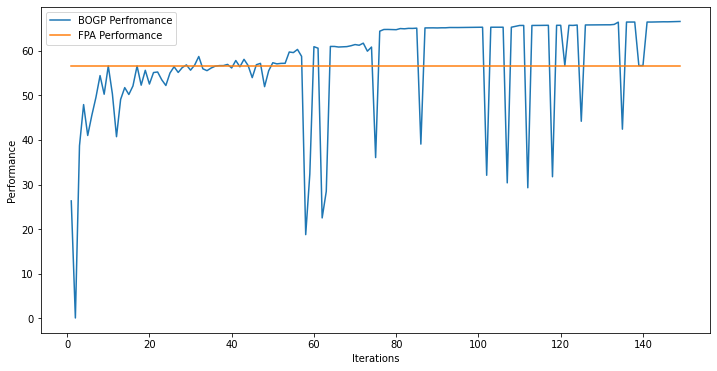

x_next is [ 26.67284731  29.99802395  29.99907557  15.28281201  29.99854803
  29.99704578  29.99903996  23.85943202  29.99812415  17.36874916
 -26.19843201  29.9969407   29.99727602  29.99667137  29.99385977
  19.95959932  29.99812175  28.5826749   21.14853868  22.66145971]
f()=66.551566, actual=66.567
148


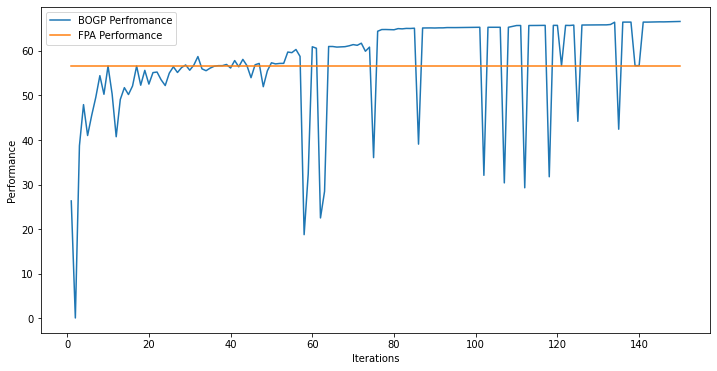

x_next is [ 26.36437653  29.99995052  29.99880005  14.32975696  29.99757117
  29.9963012   29.99882653  23.27013323  29.99903729  17.71050322
 -26.02530354  29.9998267   29.99791365  29.99307755  29.99454679
  19.11816364  29.98978739  28.25379819  20.95678816  22.33042715]
f()=66.595658, actual=66.576
149


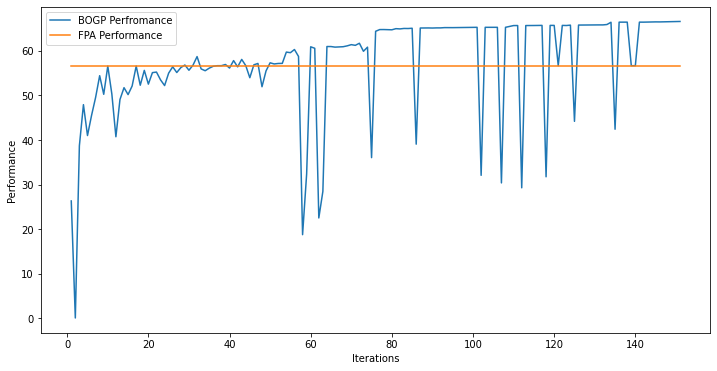

x_next is [ 26.53828816  29.99916752  29.99880149  14.69084121  29.99981743
  29.99866974  29.99977928  23.67772492  29.99971388  17.56676891
 -26.10364155  29.99888992  29.99941786  29.9988185   29.99935614
  19.57451113  29.9996135   28.30744657  20.9524643   22.69504422]
f()=66.586128, actual=66.591
150


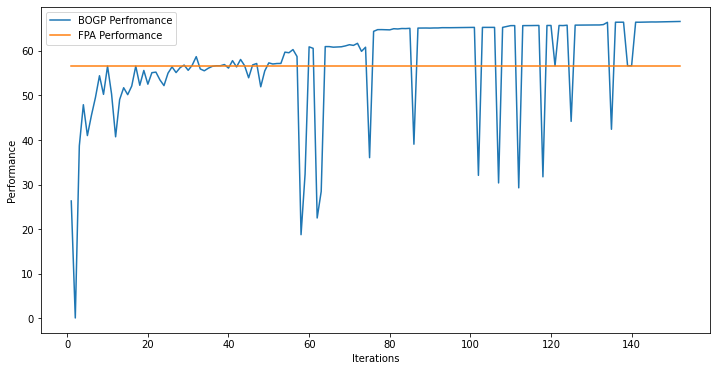

x_next is [ 26.54852569  29.99999995  29.99999995  14.63468204  30.
  29.99997929  29.99649999  23.76301946  30.          17.70860113
 -26.17975528  29.99999995  29.99999995  29.99424057  29.99999995
  19.57523705  29.99999995  28.23658576  20.83334375  22.8683734 ]
f()=66.592171, actual=66.596
151


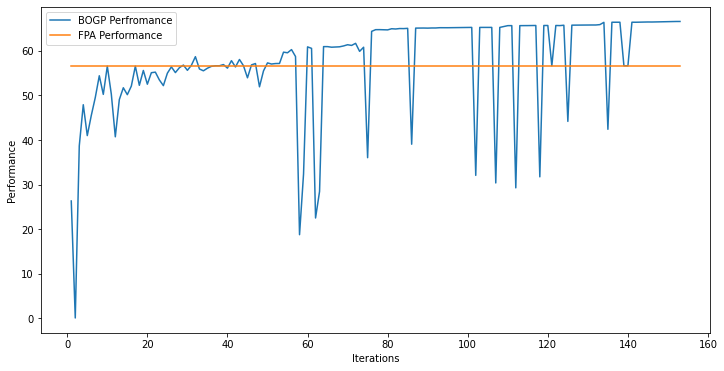

x_next is [ 26.33648136 -11.35799355 -22.40421116   5.40474925  -5.16889102
   0.71112979 -10.2145089  -10.31690298  -3.37694095  11.90797639
   3.24492895  -4.12713602  21.95368997  18.28704263  12.65926737
  20.26723072  -0.81178074  17.78411556  -2.29791779  23.85533845]
f()=57.477851, actual=38.710
152


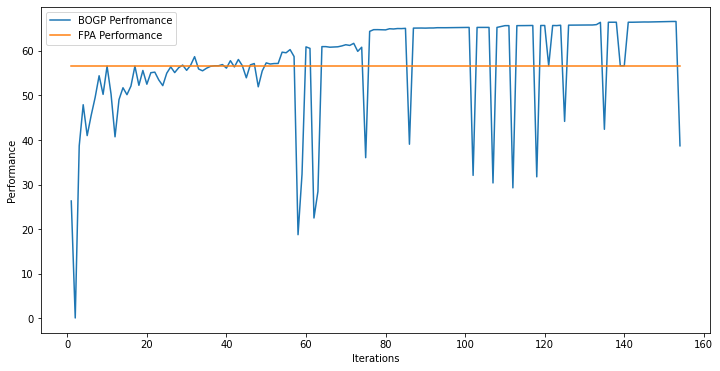

x_next is [ -3.53105757  17.77550856  11.94152695 -15.24434488   1.4096372
 -16.64116329 -21.39367963  -5.85594464  14.54881233  14.33521031
 -20.25247653 -10.70341095  -3.08907994 -14.78231831 -29.49337057
 -14.82944633  18.74471784  26.4150723  -23.62340454  25.0017917 ]
f()=57.523361, actual=24.902
153


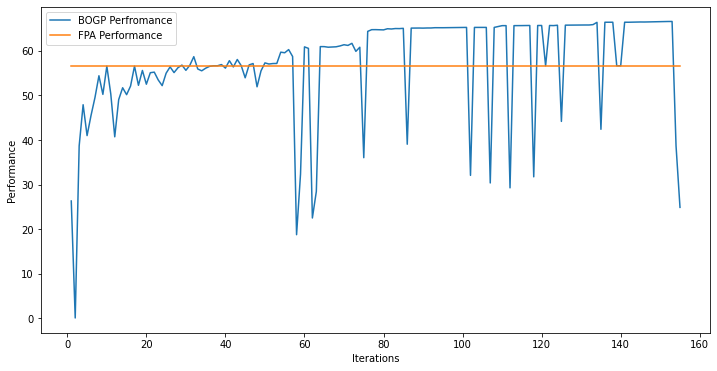

x_next is [ 26.67354004  29.99979931  29.9989121   14.64894839  29.99970318
  29.99977222  29.99729817  23.8059286   29.99699885  17.8516002
 -26.21707394  29.99674583  29.9986861   29.99971874  29.99926421
  19.67586554  29.99993402  28.21546345  20.74749797  22.95738221]
f()=66.597244, actual=66.599
154


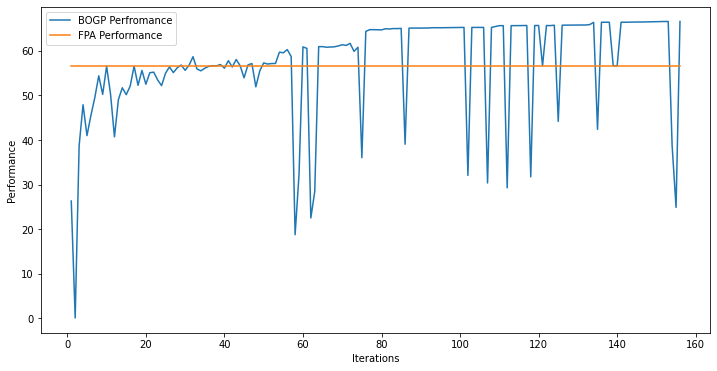

x_next is [ 26.84214429  29.99951543  29.99972744  14.65924347  29.99950415
  29.99988718  29.99905958  23.77636261  29.99927772  17.89495769
 -26.20587542  29.99910279  29.99988992  29.99738685  29.99721533
  19.67327573  29.9971209   28.24879129  20.6488779   22.93533854]
f()=66.599705, actual=66.602
155


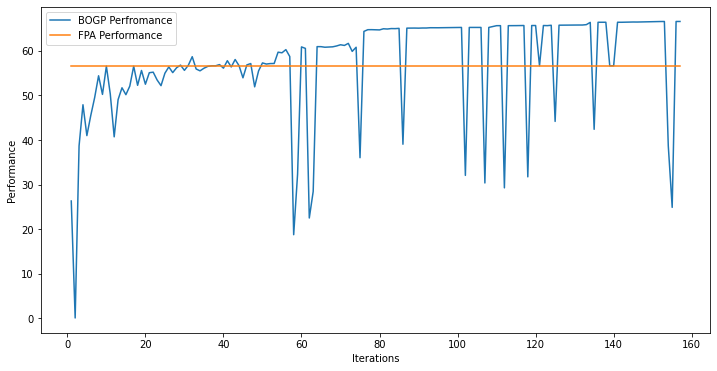

x_next is [ 26.98589995  29.99800314  29.99579675  14.7889802   29.99810798
  29.99859628  29.99498907  23.57656668  29.99885645  17.88550558
 -25.98501633  29.9894224   29.99734735  29.9962547   29.99742349
  19.49777519  29.99943505  28.06812536  20.43196236  22.89050178]
f()=66.604220, actual=66.608
156


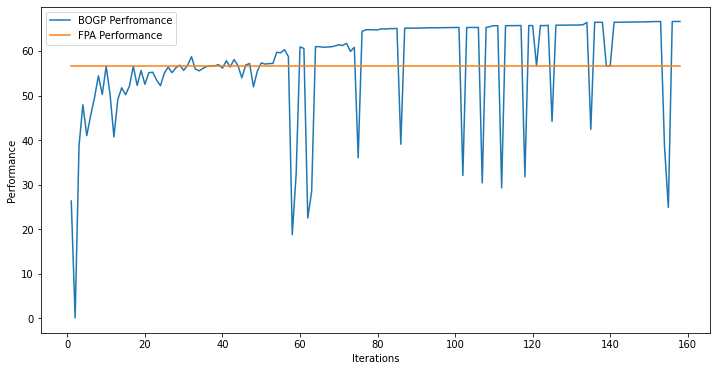

x_next is [ 26.98640532  29.99983341  29.99787234  14.82234106  29.99909131
  29.99941573  29.9985576   23.5900998   29.99968914  17.81250078
 -26.07672959  29.99508491  29.99992691  29.99992227  29.99988765
  19.44715361  29.99802878  28.01607266  20.35654194  22.86804833]
f()=66.610916, actual=66.611
157


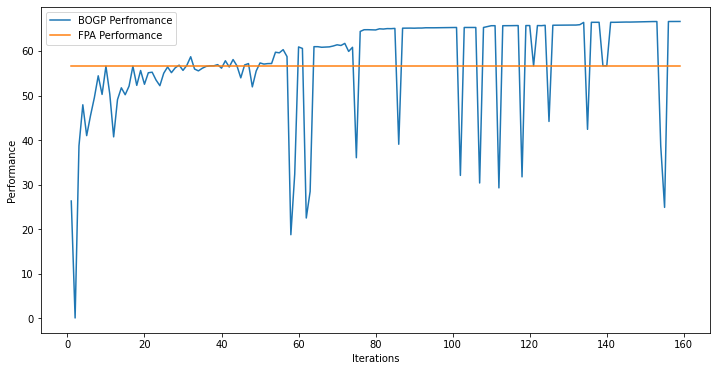

x_next is [ 24.6653301   26.74754728  28.59472923   6.0413604   28.07695336
  29.96161946  29.71773714   8.91558286  20.13428538  28.51642756
 -28.00964427  26.76990874  28.81559541  29.75814495  28.83945992
   8.75987524  26.98175025  26.35610129  18.10835568   7.70743228]
f()=61.726549, actual=54.377
158


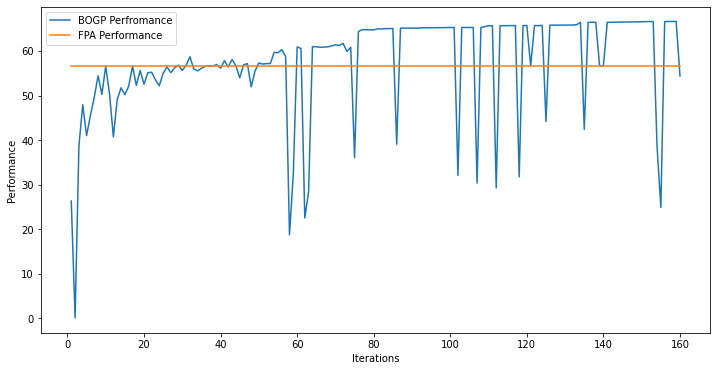

x_next is [ 27.08088395  29.99822754  29.99850955  14.90676098  29.99828915
  29.99892736  29.99948626  23.60031442  29.99891106  17.68866693
 -26.05632038  29.99427897  29.99912135  29.99966585  29.99784349
  19.46289185  29.99997139  27.97177602  20.38720526  22.95593377]
f()=66.610819, actual=66.610
159


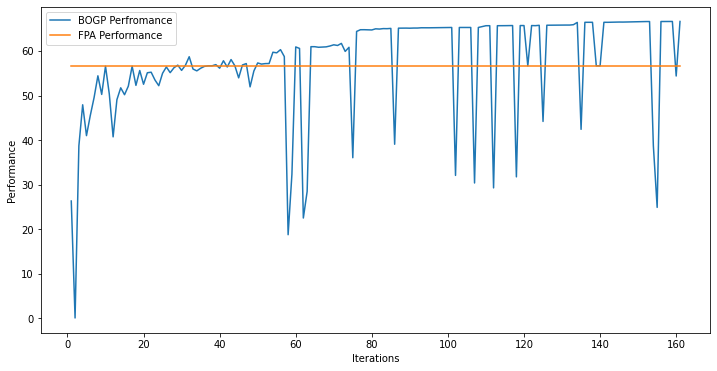

x_next is [ 27.01085117  30.          29.99651828  14.89262127  30.
  30.          30.          23.59668311  30.          17.76522048
 -26.13405664  30.          30.          29.9997332   30.
  19.53559816  30.          28.00964714  20.29538979  22.91065088]
f()=66.611853, actual=66.610
160


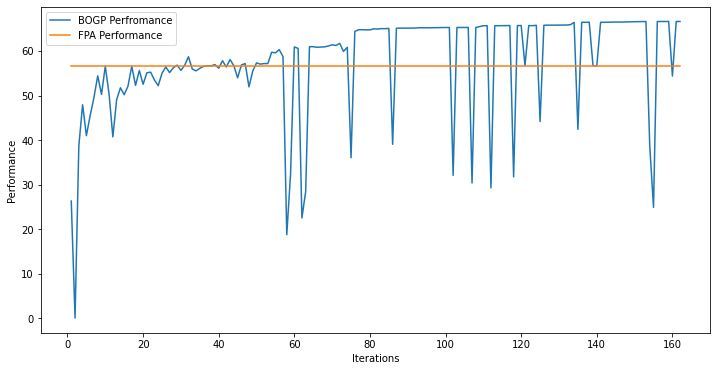

x_next is [-20.88999148  28.01354548 -22.06195212  13.89945505  22.593364
  24.12193214  -0.36385422 -19.23664336 -18.79868934  22.03563404
   5.97591733  25.66698747  14.75186454  13.60889074 -23.26291345
  13.16984983   6.34050411   6.72912028 -10.88105846  28.95500518]
f()=57.638655, actual=36.863
161


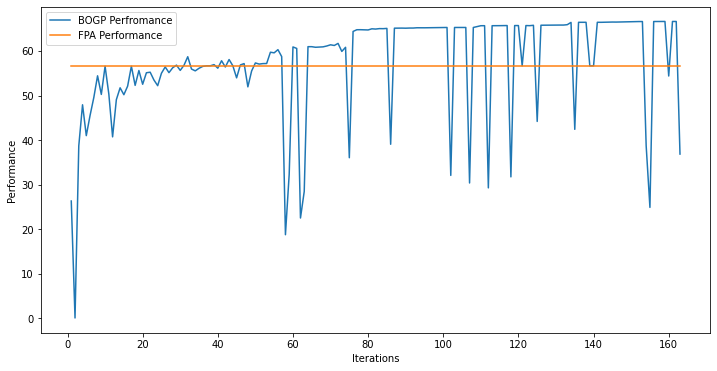

x_next is [ 27.046222    29.99872733  29.99999996  14.82301722  29.99999976
  29.99940325  29.99878951  23.72330433  29.99949905  17.80284026
 -26.00840674  29.99985285  29.99999943  29.99951713  29.9981794
  19.22681281  29.99999996  27.90671359  20.47847513  22.83626925]
f()=66.614365, actual=66.611
162


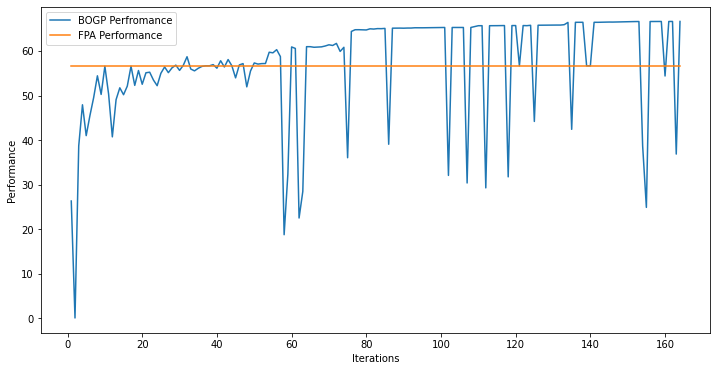

x_next is [ 27.0338658   29.99990128  29.99981667  14.76392039  29.9984749
  29.9999517   29.99862197  23.58353389  29.9997083   17.7420379
 -26.06550754  29.99863799  29.99981292  29.99871857  29.99914812
  19.28032069  29.99771312  27.98074814  20.43061638  22.88494921]
f()=66.612596, actual=66.610
163


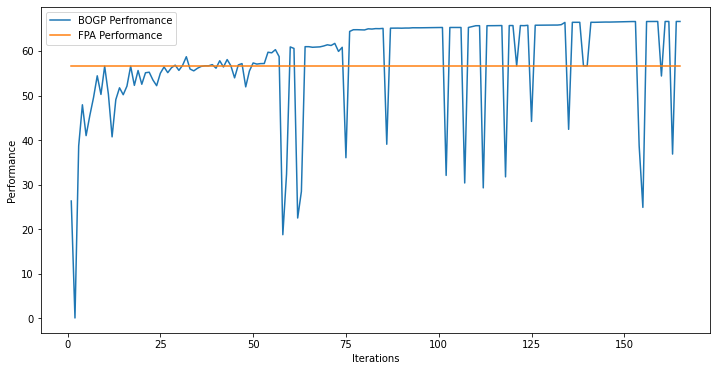

x_next is [ 29.99981493  29.99981343 -30.99995226  18.96864493  29.99978329
  29.99992973  29.99984006  29.99978977 -30.99974107  16.70070341
 -30.7485164   20.10761685  29.99983081  29.99991368  29.9997009
  29.99983636  29.99991891  29.99987652  29.99986497  29.99999704]
f()=58.117456, actual=60.118
164


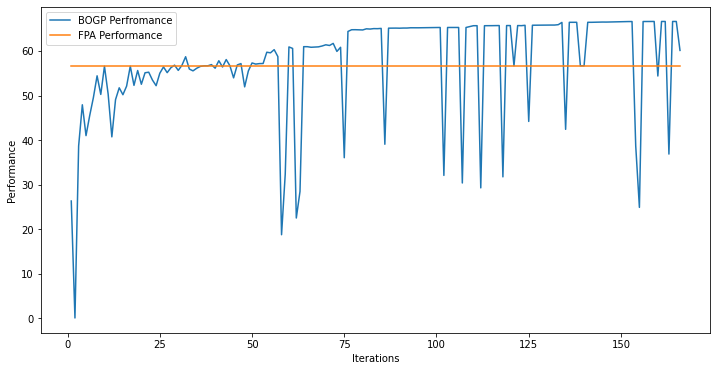

x_next is [ 29.99987897  29.99985336 -30.99998621  17.72501547  29.99955177
  29.99998861  29.99951901  29.99988925 -30.99931535  14.5540538
 -30.99962452  16.90013425  29.99999736  29.99938119  29.99950358
  29.99988513  29.99979612  29.99966324  29.99977462  29.99967488]
f()=60.140371, actual=59.445
165


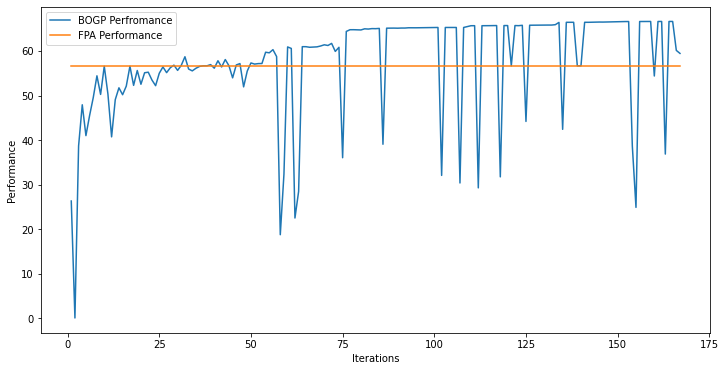

x_next is [ 26.82129071  29.99001417  29.98119149  14.86101102  29.96251956
  29.95444368  29.97139594  23.60815846  29.97303886  17.85440769
 -25.78947772  29.98698491  29.9974082   29.98646308  29.98327296
  19.12987595  29.83652369  27.79775365  20.32118226  22.73749394]
f()=66.574005, actual=66.632
166


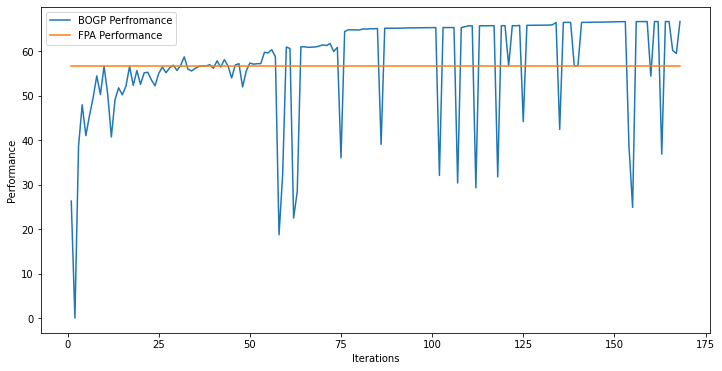

x_next is [ 27.15401361  25.96712938  17.0104679   28.4875509   21.8045689
  22.62728232  28.66277221  26.41280569  29.30366138   3.54795855
  -9.41672175  21.87882158  18.82039239 -23.96455386   2.00779738
  26.98494622 -18.04109905 -25.84417872 -27.04142084  20.8090374 ]
f()=57.700907, actual=41.079
167


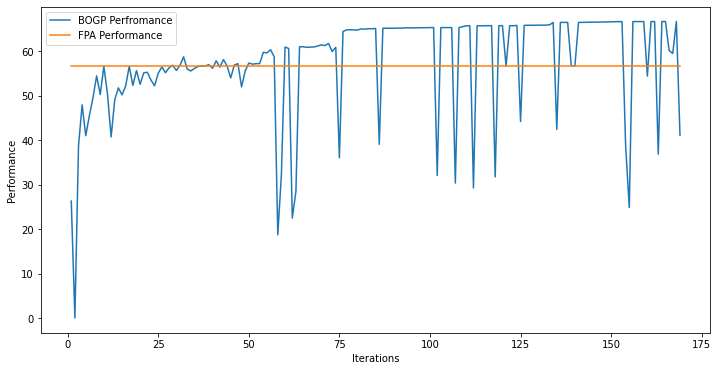

x_next is [ 29.9999724   29.99984941 -30.99998979  23.81297305  29.99989002
  29.99995706  29.99994017  29.99998258 -30.99980745  27.29797861
 -27.39647954  29.99969068  29.99920667  29.99975474  29.99997117
  29.99948929  25.33028661  29.99999707  29.99991872  29.99968161]
f()=61.547784, actual=58.826
168


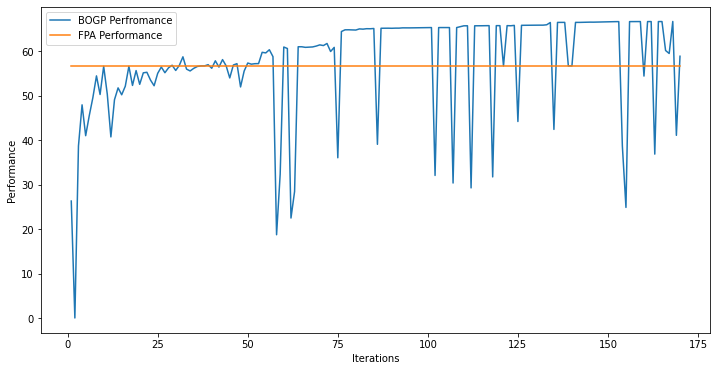

x_next is [ 24.1011637   11.95471629   0.56689598  16.74124778  29.99991071
  29.99997387  26.32067004  23.64655017  -9.02441675  21.52233857
 -19.81300807  18.06455773  21.01894811  10.66487387  28.16456994
  27.89692615   3.09182405  23.18789142  27.53087415  27.22701779]
f()=69.501282, actual=51.609
169


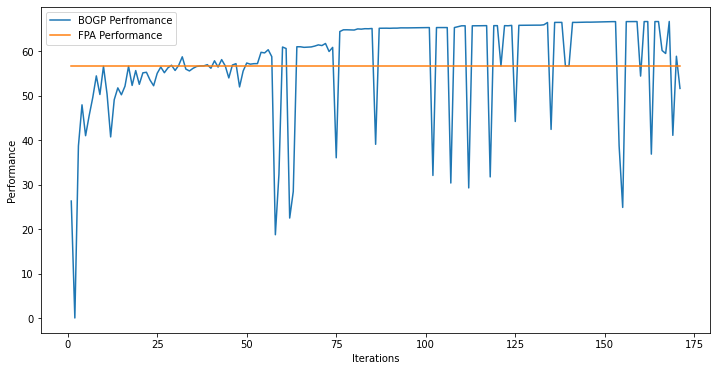

x_next is [ 26.57247578  29.99996349  29.99955436  14.78482492  29.99902411
  29.99975558  29.99931266  23.74833385  29.9999295   17.86468449
 -25.42835656  29.99972123  29.99984315  29.99954093  29.99947185
  19.16903511  26.29173821  27.79184233  20.11032171  22.76444766]
f()=66.959047, actual=66.590
170


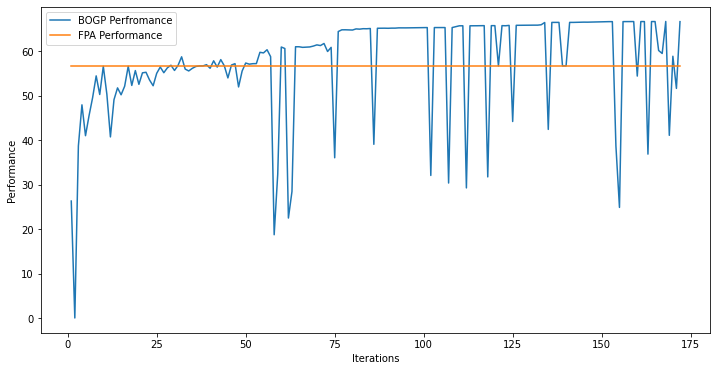

x_next is [ 26.47478348  29.99936323  29.99928939  14.95391882  29.998563
  29.99945519  29.99958375  23.68676033  29.99925303  17.6733155
 -25.2872601   29.99920573  29.9995792   29.99998623  29.9987762
  19.00023288  28.49126458  27.76712678  19.98983899  22.72324858]
f()=66.729837, actual=66.681
171


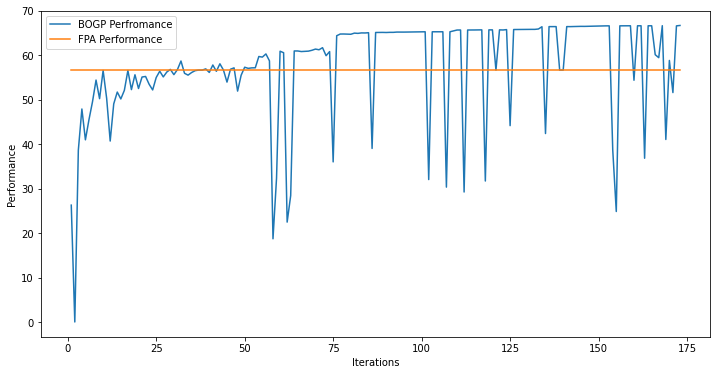

x_next is [ 26.00526629  27.90766878 -29.68868174  17.34320888  25.88408084
  27.68916715  -5.66405164  23.24405378 -23.94051655   3.45621212
 -30.66528009  28.28471337   9.30853271  22.44485544  24.64150285
  17.97734791  15.39228093  23.83280292  21.84822309  27.88611226]
f()=54.717395, actual=53.579
172


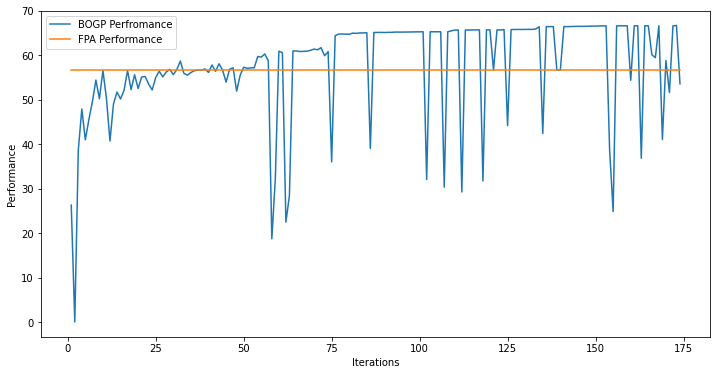

x_next is [  5.62407783 -24.08285052 -18.2375578   -1.00047116  17.51120904
 -24.95154793  -3.92268488 -10.97915909   7.1869138   13.58156063
   9.6163954   17.64661794  22.26060257 -24.94603264  -7.76822125
  19.37742901   9.3799842   -7.74591288   2.96056007  24.08556241]
f()=57.655993, actual=36.874
173


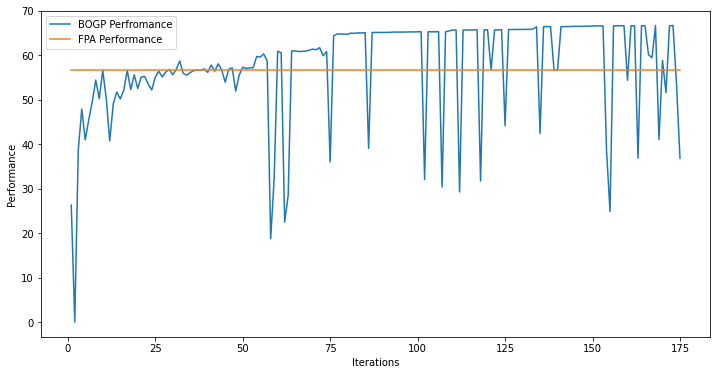

x_next is [ 29.99974357  29.99942761 -30.99987746  20.61742037  29.99987231
  29.99989183  29.9999652   29.99961011 -30.99923843  12.36665439
 -30.99998328  29.99987387  29.99999282  29.9997855   29.99980193
  29.99977451  29.99982564  29.99993512  29.99988074  29.99999465]
f()=61.039053, actual=60.852
174


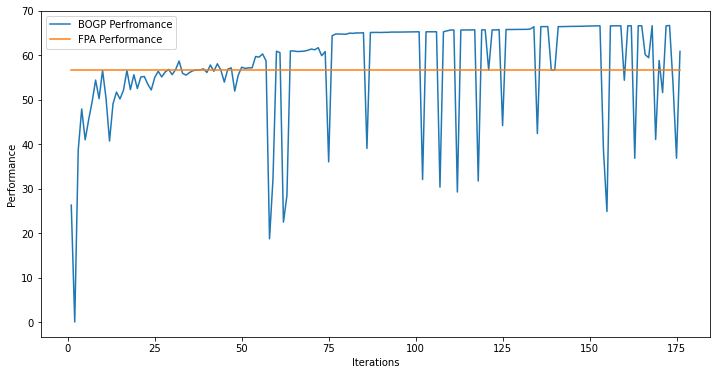

x_next is [ 26.7150823   29.9994322   29.99985164  14.87105102  29.99894138
  29.9989317   29.99935905  23.65338525  29.9999994   17.78468647
 -25.65457378  29.99945412  29.99992708  29.9994878   29.99981963
  19.21273848  28.66810753  27.69565665  20.16070017  22.73378777]
f()=66.690310, actual=66.678
175


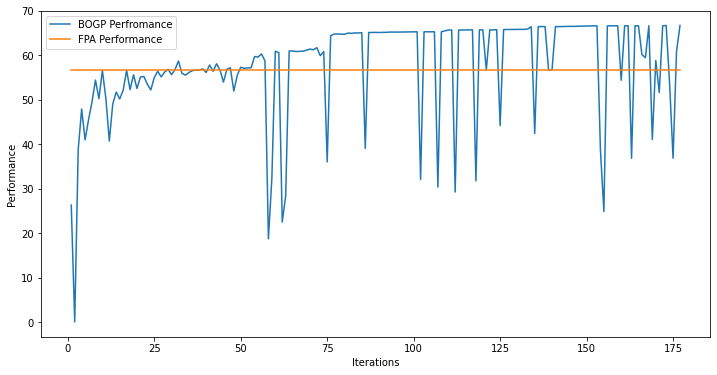

x_next is [ 26.48429286  29.99900533  29.99668738  14.96040892  29.9970715
  29.99715472  29.99259734  23.64114266  29.99849507  17.74426428
 -25.34242766  29.99257372  29.99939859  29.99519098  29.99797746
  18.88239807  28.90993052  27.78950089  20.03851808  22.67952144]
f()=66.683018, actual=66.670
176


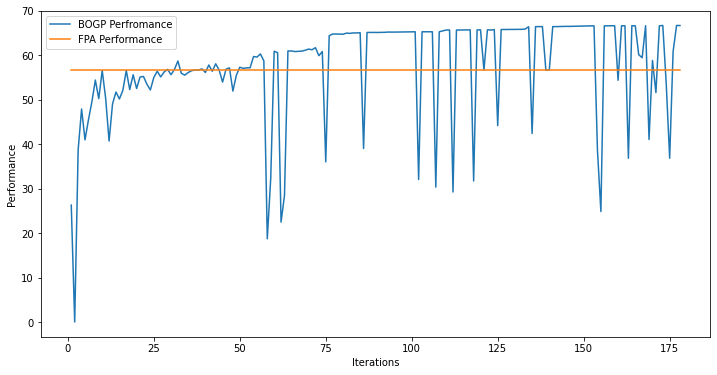

x_next is [ 26.60629223  30.          29.99999996  14.78582112  29.99999995
  29.57175181  29.99949616  23.78173138  30.          17.55905395
 -25.30281241  29.99999858  30.          29.99999291  30.
  19.2796296   28.40286295  27.67187403  20.00167086  22.78296176]
f()=66.691644, actual=66.844
177


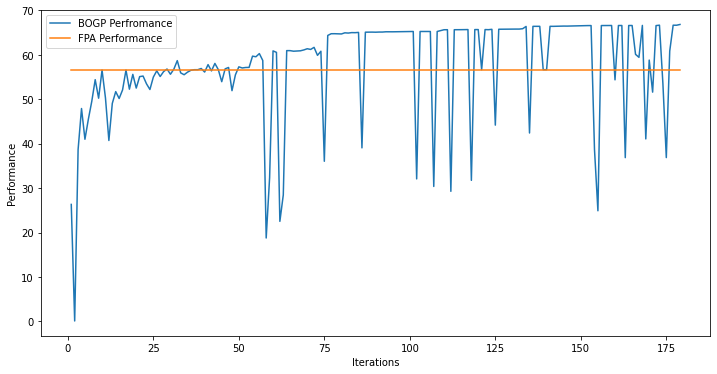

x_next is [ 29.99453479  29.99446446  29.99287083  29.99494184  29.99559563
  29.99599071  29.99950271  29.9992342   29.99935238  29.98910097
 -30.99136247  29.99987826  29.99816506  29.9991946   29.99865444
  29.99631796  29.99070643  29.99493216  29.99898794  29.99890352]
f()=57.709812, actual=56.666
178


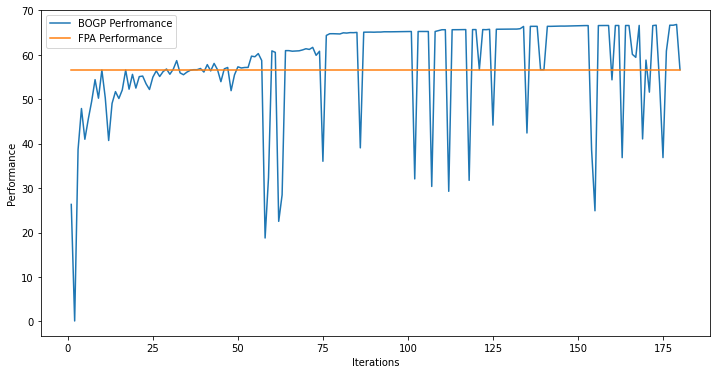

x_next is [ 26.48783878  29.99791519  29.9993443   14.32400854  29.99813435
  24.18755217  29.99784751  23.83597485  29.99925514  16.76849055
 -25.08545788  29.99884668  29.99892532  29.99971494  29.99946642
  18.77624468  28.39302226  27.49600452  19.98153573  22.3032537 ]
f()=67.668717, actual=67.838
179


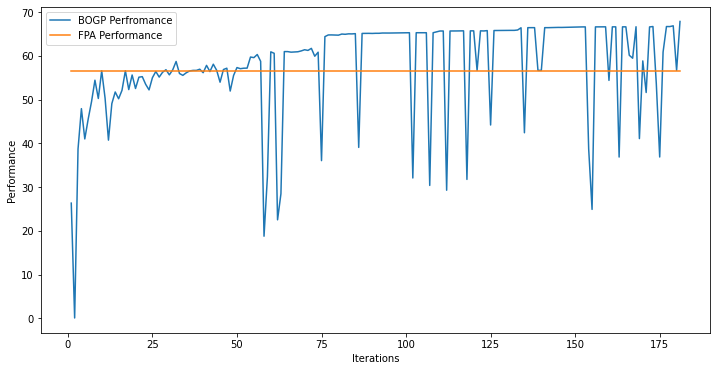

x_next is [ 26.34804211  29.99664098  29.99999995  14.25818286  29.99720328
  23.24027246  29.9956559   23.83280098  29.9999578   16.57354064
 -24.98460773  29.99999997  29.99993042  29.99822856  29.99999993
  18.49964574  28.37197384  27.43392027  19.93744741  22.08440747]
f()=67.858730, actual=67.848
180


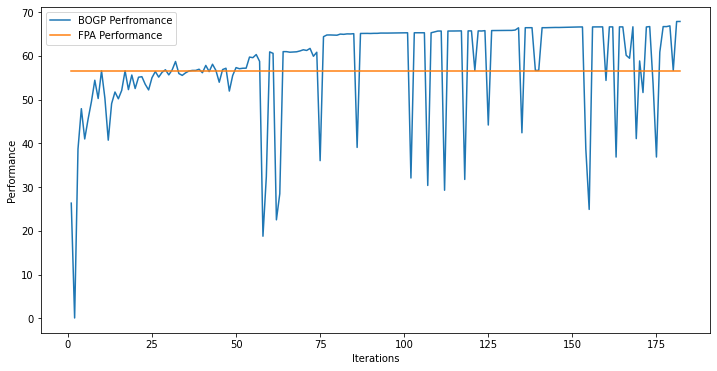

x_next is [ 26.4660855   29.99976159  29.99967481  14.48049679  29.99992017
  23.42810003  29.99951709  23.90953721  29.99980986  16.70587031
 -25.17795593  29.99940436  29.9998941   29.99953555  29.99990509
  18.71715294  28.40632046  27.49349017  20.07809039  22.25897592]
f()=67.852552, actual=67.837
181


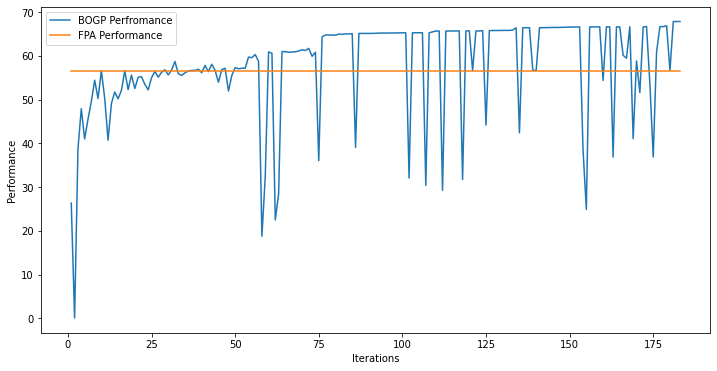

x_next is [ 26.32804223  29.99994895  29.99922942  13.89241943  29.99976034
  23.49967219  29.99966792  23.72203718  29.99988434  16.52976284
 -24.68257783  29.99953477  29.99904606  29.99973688  29.99975697
  18.36631139  28.31284596  27.31157725  19.79092139  21.90138213]
f()=67.857958, actual=67.868
182


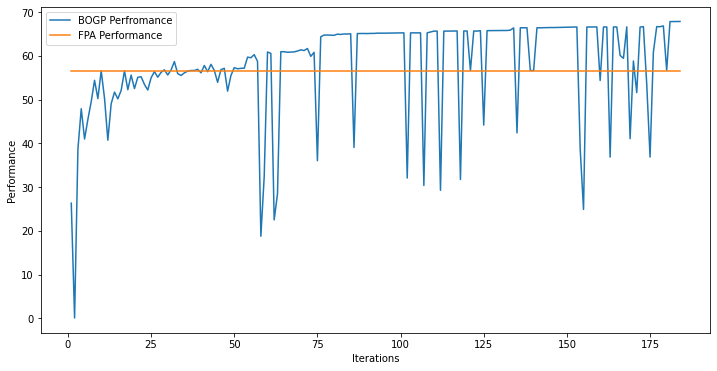

x_next is [ 26.52992517  29.99959291  29.99969519  13.60186448  29.99993494
  23.45939555  29.99986429  23.73712469  29.99978801  16.53824074
 -24.36157002  29.99807942  29.999592    29.99971577  29.99975242
  18.3497547   28.26338667  27.05611647  19.84116717  21.6988046 ]
f()=67.875028, actual=67.891
183


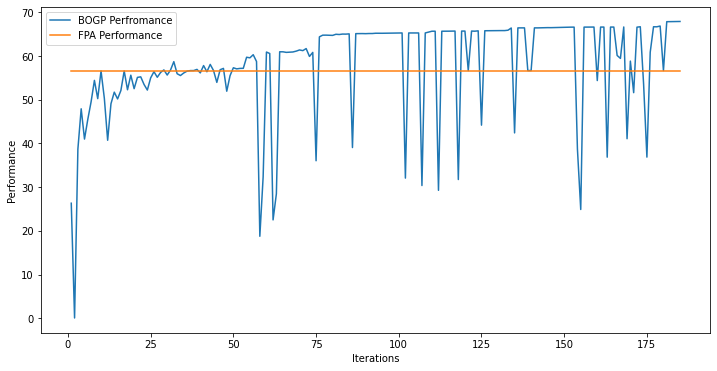

x_next is [ 26.91383518  30.          29.99963296  13.48646597  30.
  23.27929851  30.          23.85877203  30.          16.48506351
 -24.0135241   29.99829511  29.9984151   30.          29.99999999
  18.38019429  28.23092033  26.66846835  19.99272123  21.60041188]
f()=67.902321, actual=67.926
184


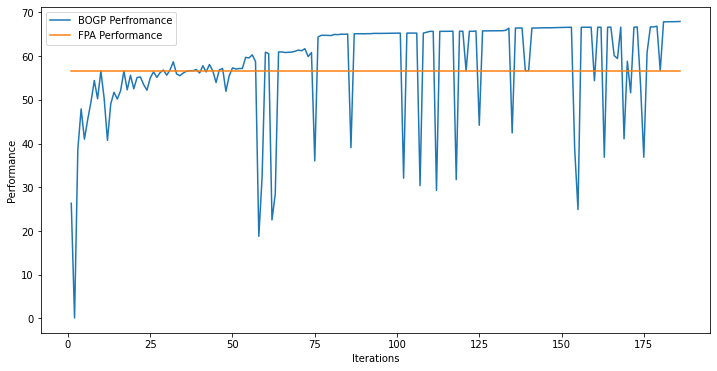

x_next is [ 27.38506244  29.99797867  29.99859488  13.64724264  29.99955399
  22.93070428  29.99928427  23.98732866  29.99957032  16.14495667
 -23.45822983  29.99716103  29.99883981  29.99999096  29.99993319
  18.14044592  28.26259373  26.09838575  20.10202012  21.65635946]
f()=67.948247, actual=67.992
185


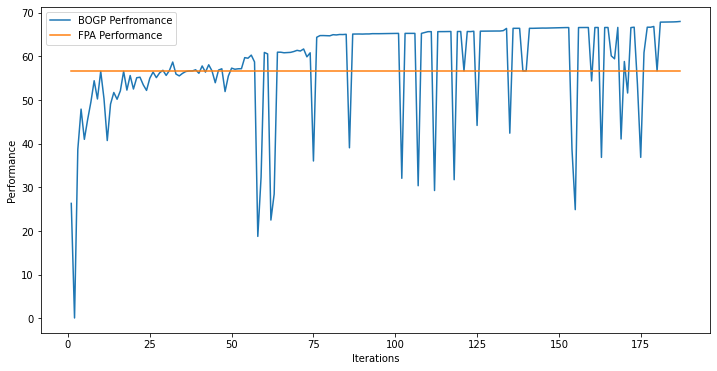

x_next is [ 27.58236174  29.99956342  29.99868872  13.859916    29.99988458
  22.42705021  29.99957984  23.88985726  29.99978063  15.60033334
 -22.70055858  29.99998453  29.99987815  29.99968617  29.99987597
  17.39017591  28.33840747  25.49319358  20.06498956  21.66548486]
f()=68.027037, actual=68.042
186


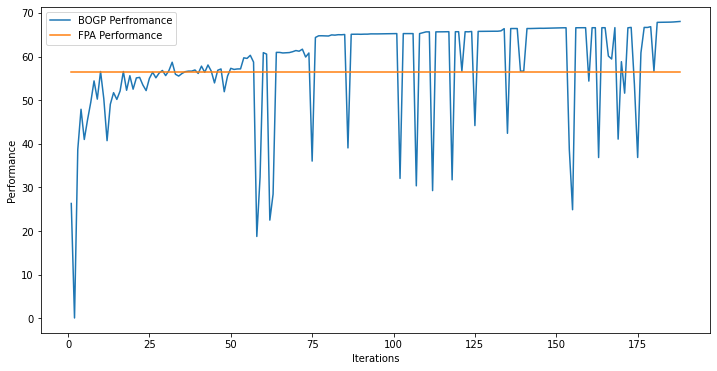

x_next is [ 27.60013157  30.          30.          13.84627935  30.
  22.22792376  30.          23.81079917  30.          15.51696965
 -22.459286    29.99683551  29.99999956  30.          30.
  17.11456504  28.39314554  25.34885913  20.05775595  21.63360055]
f()=68.045281, actual=68.036
187


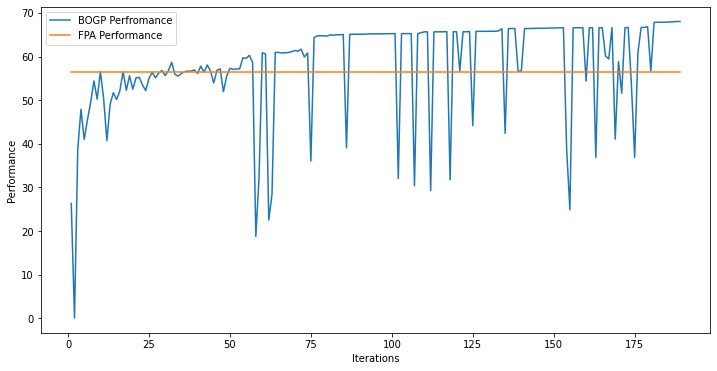

x_next is [ 27.57064286  29.99928611  29.99985689  14.01656924  29.99970289
  22.51093964  29.99998625  23.93521956  29.99993252  15.43280373
 -22.77399113  29.99945139  29.99982876  29.99935903  29.99927961
  17.44494325  28.23583433  25.40918135  20.00745408  21.69074014]
f()=68.044927, actual=68.067
188


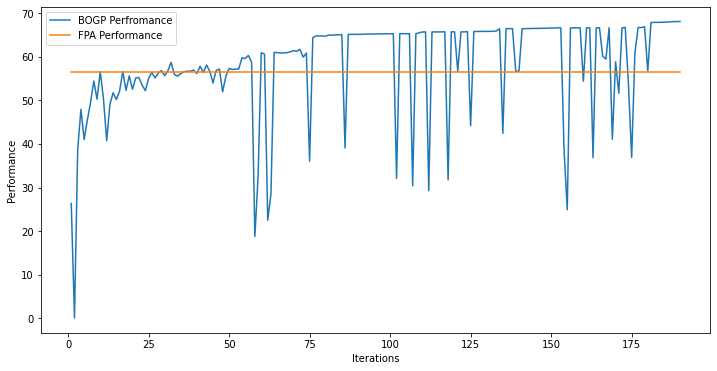

x_next is [ 27.22891468  29.99974662  29.99862223  14.3914384   29.99953946
  22.36535097  29.99749565  23.99418919  29.99889756  14.64400403
 -22.88937102  29.99980646  29.99925921  29.99852652  29.99918751
  17.54159527  27.61071566  24.71991463  19.53473467  21.41677638]
f()=68.119715, actual=68.142
189


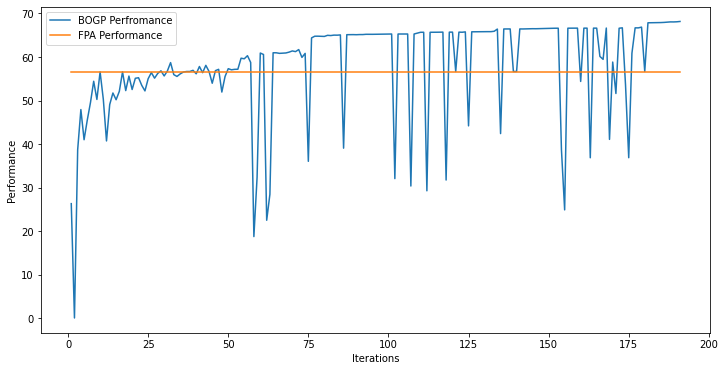

x_next is [  9.3095767  -10.32950615   8.80071229   8.52999038 -26.95646442
  12.20074029 -20.37273077  -1.92730537  19.80507526  12.33338383
 -28.41584753  23.70858686   6.40843183 -30.44835799  -9.47677155
  -5.74387275  29.26422393  -0.20429874 -18.60173497 -22.49218019]
f()=58.294615, actual=27.764
190


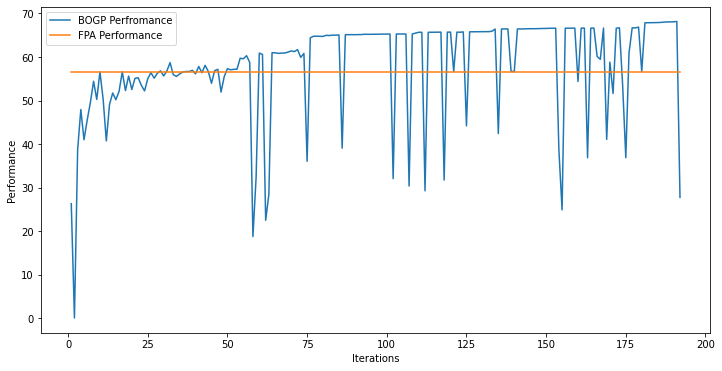

x_next is [ 27.18308809  29.99821453  29.9999408   14.37916677  29.99744559
  22.15983165  29.99999988  23.97439537  29.99901902  14.52600226
 -22.89098946  29.99870697  29.99999986  29.99716087  29.9999999
  17.64805739  27.41541342  24.36420055  19.37376747  21.27606008]
f()=68.147276, actual=68.148
191


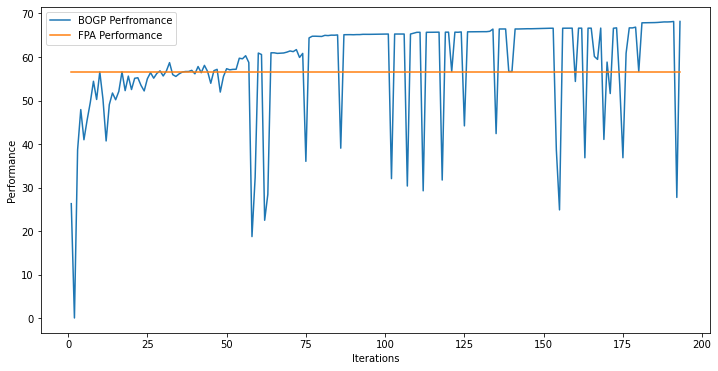

x_next is [ 19.27344231  29.99677384  29.99870294  12.28536919  29.99852298
  17.64692713  29.98173177  27.67299228  29.99474512  13.410745
 -20.99944536  29.97866198  29.99991691  29.97829106  29.99085515
  13.34775457  29.99760281  22.77439308  19.96249071  20.41400562]
f()=69.035440, actual=65.471
192


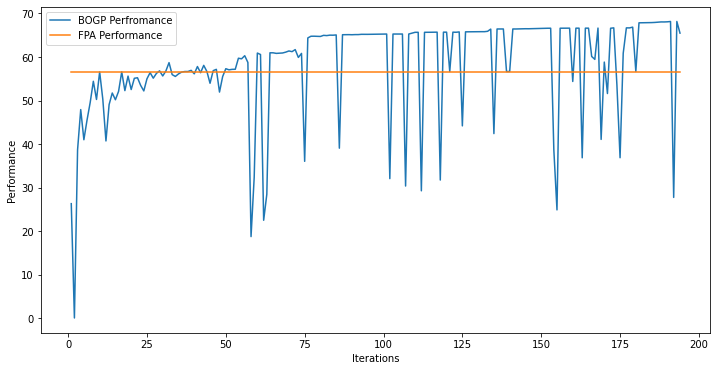

x_next is [ 27.74712976  29.99708677  29.99861213  14.48315317  29.99576866
  22.20160223  29.99931101  23.44594412  29.99777353  14.61902983
 -22.98020306  29.99727061  29.99636829  29.99968704  29.99984398
  17.62083919  27.21638371  24.61145756  19.17751733  21.14437538]
f()=68.167039, actual=68.068
193


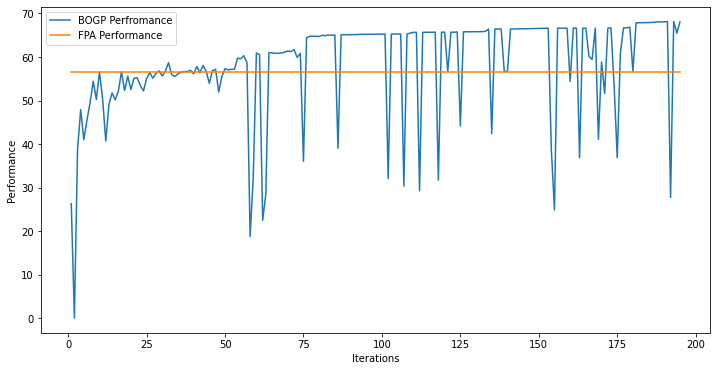

x_next is [ 26.78789683  30.          30.          14.23857393  30.
  22.2895802   30.          24.4217846   30.          14.64539112
 -22.80254981  30.          30.          30.          30.
  17.88309575  27.60165849  24.0271558   19.74597906  21.66000859]
f()=68.179039, actual=68.191
194


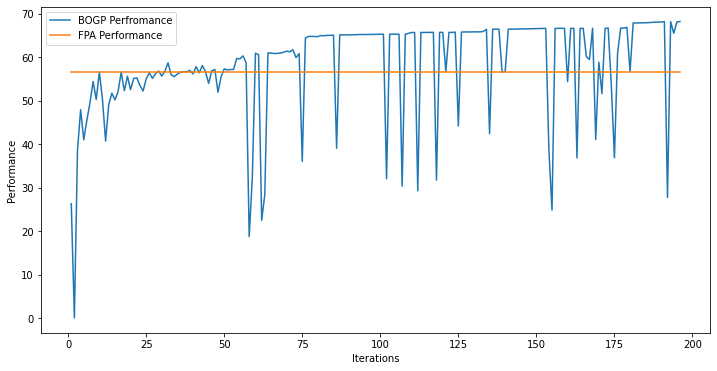

x_next is [ 26.72967552  29.99999983  29.99999989  14.16023081  29.99999994
  22.33988316  29.99999998  24.3652123   29.99999996  14.6981682
 -22.75220542  29.99999994  29.99999999  29.99999996  29.99999998
  17.98839694  27.57589106  23.88370159  19.81181195  21.86405673]
f()=68.194261, actual=68.201
195


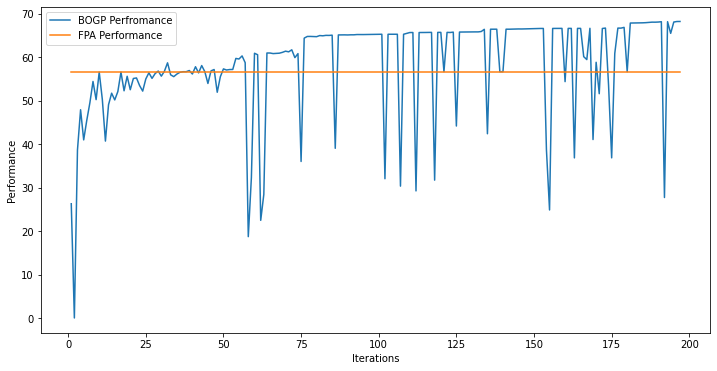

x_next is [ 26.628325    30.          30.          14.08633562  30.
  22.3404078   29.99999999  24.12529143  30.          14.7248831
 -22.71747119  29.99997552  30.          29.99999108  30.
  18.0105055   27.48620669  23.81509336  19.84939457  22.15152144]
f()=68.206158, actual=68.209
196


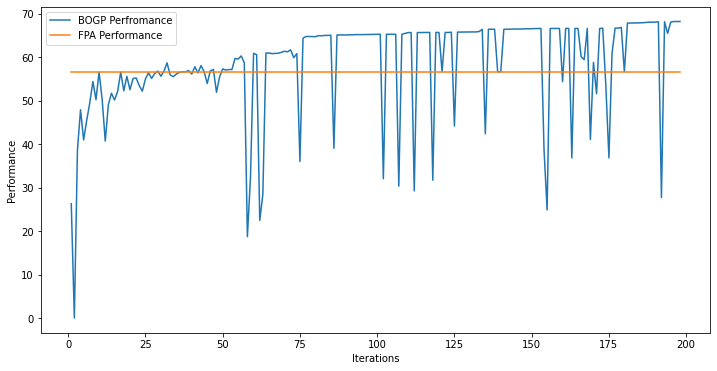

x_next is [ 26.49162129  29.99999998  30.          14.07014027  29.99999999
  22.3454907   29.99999997  24.0231257   30.          14.77755958
 -22.75949649  29.99997464  30.          29.99999998  30.
  17.91815541  27.37355365  23.86356133  19.84467272  22.19471938]
f()=68.211272, actual=68.204
197


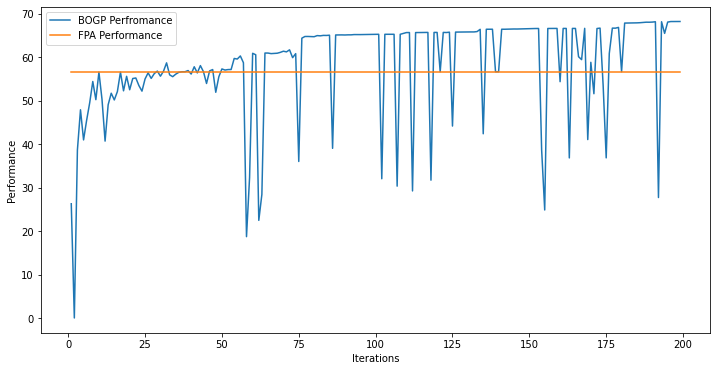

x_next is [ 26.73129398  30.          30.          14.06696031  29.99999999
  22.16876293  30.          24.01080023  30.          14.42475188
 -22.67362864  29.99999997  30.          30.          30.
  18.17822156  27.71545272  23.82523696  19.84425317  22.31773065]
f()=68.217471, actual=68.240
198


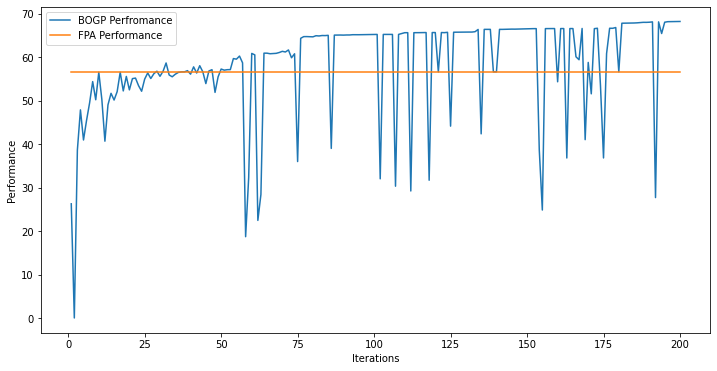

x_next is [ 26.61379967  30.          30.          13.8708398   30.
  21.81629245  30.          23.82899873  30.          13.82769689
 -22.77229544  30.          30.          30.          30.
  18.41297881  28.07850679  23.97735326  19.90172161  22.3565333 ]
f()=68.265103, actual=68.276
199


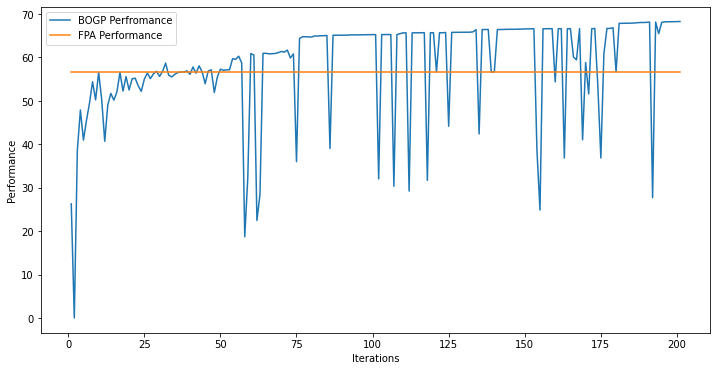

In [16]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

X = 0 * np.ones([1,var], dtype = "float")
y = np.array([[objective_FPA(X[0].reshape((int)(var/number_of_cells), number_of_cells))]])

tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
y_FPA = np.array([[tr_FPA]])

kernels =  ConstantKernel(constant_value=200, constant_value_bounds = (1e-20, 1e20)) * Matern(length_scale=1, length_scale_bounds=(1e-20,1e20), nu=1.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-20, 1e20)) 
model = GaussianProcessRegressor(kernel = kernels, n_restarts_optimizer=30)

model.fit(X, y)

for i in range(200):
  x_next = opt_acquisition(X, y, model, X.shape[0]+1)

  np.save("/content/drive/MyDrive/trainingx_BOGP_3.npy",X)
  np.save("/content/drive/MyDrive/trainingy_BOGP_3.npy",y)
  np.save("/content/drive/MyDrive/grad_trainingyFPA_BOGP_3.npy",y_FPA)
  
  tr = 0
  for l in range(1):
    tr = tr + objective_FPA(x_next.reshape((int)(var/number_of_cells), number_of_cells))
  tr = tr/1.0  
  actual = tr

  tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
  
  est, _ = surrogate(model, [x_next])
  print("x_next is", x_next)
  print('f()=%3f, actual=%.3f' % (est, actual))
  
  X = vstack((X, [x_next]))
  y = vstack((y, [[actual]]))
  y_FPA = vstack((y_FPA, [[tr_FPA]]))
  
  model.fit(X, y)
  
  print(i)
  pyplot.figure(figsize = (12, 6))

  pyplot.xlabel("Iterations")
  pyplot.ylabel("Performance")
  pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
  pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
  pyplot.legend(["BOGP Perfromance","FPA Performance"])
  pyplot.show()


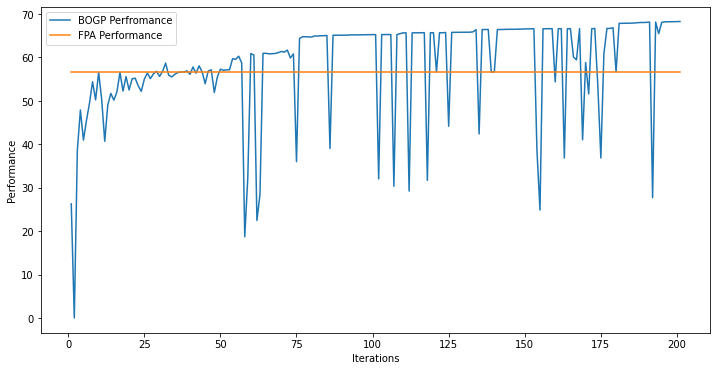

P_max = 30.000, Optimal_SE = 68.276
P_max = 30.000, Optimal_SE_FPA = 56.571


In [17]:
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

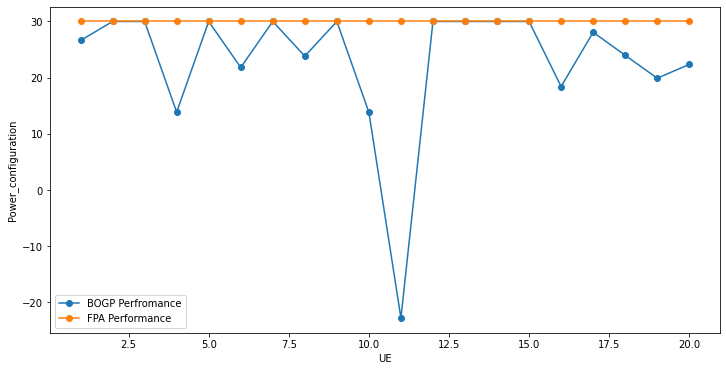

Power_configuration_BOGP is [ 26.61379967  30.          30.          13.8708398   30.
  21.81629245  30.          23.82899873  30.          13.82769689
 -22.77229544  30.          30.          30.          30.
  18.41297881  28.07850679  23.97735326  19.90172161  22.3565333 ]


In [18]:
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:], '-o')
pyplot.plot(np.arange(1,21),X_FPA[:], '-o')
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show()
print("Power_configuration_BOGP is", X[ix])

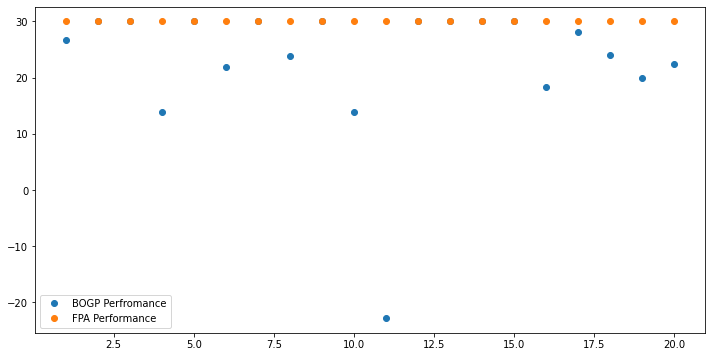

Power_configuration_BOGP is [ 26.61379967  30.          30.          13.8708398   30.
  21.81629245  30.          23.82899873  30.          13.82769689
 -22.77229544  30.          30.          30.          30.
  18.41297881  28.07850679  23.97735326  19.90172161  22.3565333 ]


In [19]:
import matplotlib.pyplot as plt
X_FPA=np.linspace(P_max,P_max,20)
plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(1,21),X[ix][:], 'o')
plt.plot(np.arange(1,21),X_FPA[:], 'o')
plt.legend(["BOGP Perfromance","FPA Performance"])
plt.show()
print("Power_configuration_BOGP is", X[ix])